# HR Analytics - Predicting Employee Attrition
## About the dataset
The dataset is about employee attrition. It includes 1470 rows and 35 columns. The target variable is `Attrition` which is a binary variable. The dataset includes both numerical and categorical variables. The dataset is imbalanced with 1233 employees who stayed and 237 employees who left the company. The dataset includes the following columns:

- `Age`: Numerical variable
- `Attrition`: Binary variable
- `BusinessTravel`: Categorical variable
- `DailyRate`: Numerical variable
- `Department`: Categorical variable
- `DistanceFromHome`: Numerical variable
- `Education`: Categorical variable
- `EducationField`: Categorical variable
- `EmployeeCount`: Numerical variable
- `EmployeeNumber`: Numerical variable
- `EnvironmentSatisfaction`: Categorical variable
- `Gender`: Categorical variable
- `HourlyRate`: Numerical variable
- `JobInvolvement`: Categorical variable
- `JobLevel`: Categorical variable
- `JobRole`: Categorical variable
- `JobSatisfaction`: Categorical variable
- `MaritalStatus`: Categorical variable
- `MonthlyIncome`: Numerical variable
- `MonthlyRate`: Numerical variable
- `NumCompaniesWorked`: Numerical variable
- `Over18`: Categorical variable
- `OverTime`: Categorical variable
- `PercentSalaryHike`: Numerical variable
- `PerformanceRating`: Categorical variable
- `RelationshipSatisfaction`: Categorical variable
- `StandardHours`: Numerical variable
- `StockOptionLevel`: Categorical variable
- `TotalWorkingYears`: Numerical variable
- `TrainingTimesLastYear`: Numerical variable

## Objective
The objective of this notebook is to predict employee attrition using machine learning models. The notebook includes the following steps:
1. Data Preprocessing
2. Exploratory Data Analysis
3. Feature Engineering
4. Model Development
5. Model Evaluation
6. Conclusion

## Importing the required libraries

In [1]:
# Let's start by importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing
The first step is to import the required libraries and load the dataset.

In [2]:
# Load the data
url = 'data/HR-Employee-Attrition.csv'
data = pd.read_csv(url)

## Exploratory Data Analysis
The second step is to perform exploratory data analysis. The following steps are performed:
- Descriptive statistics
- Univariate analysis
- Bivariate analysis
- Multivariate analysis

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Check the data types
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
# Check for missing values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# Check for duplicates
data.duplicated().sum()

0

In [7]:
data.shape

(1470, 35)

In [8]:
# Let's see statistics of the data
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
# Let's see the columns
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
# Let's rename the columns
def rename_columns(data):
    data.rename(columns={'Age':'age', 'Attrition': 'attrition', 'BusinessTravel': 'business_travel', 'DailyRate': 'daily_rate', 'Department': 'department', 'DistanceFromHome': 'distance_from_home', 'Education': 'education', 'EducationField': 'education_field', 'EmployeeCount': 'employee_count', 'EmployeeNumber': 'employee_number', 'EnvironmentSatisfaction': 'environment_satisfaction', 'Gender': 'gender', 'HourlyRate': 'hourly_rate', 'JobInvolvement': 'job_involvement', 'JobLevel': 'job_level', 'JobRole': 'job_role', 'JobSatisfaction': 'job_satisfaction', 'MaritalStatus': 'marital_status', 'MonthlyIncome': 'monthly_income', 'MonthlyRate': 'monthly_rate', 'NumCompaniesWorked': 'num_companies_worked', 'Over18': 'over_18', 'OverTime': 'over_time', 'PercentSalaryHike': 'percent_salary_hike', 'PerformanceRating': 'performance_rating', 'RelationshipSatisfaction': 'relationship_satisfaction', 'StandardHours': 'standard_hours', 'StockOptionLevel': 'stock_option_level', 'TotalWorkingYears': 'total_working_years', 'TrainingTimesLastYear': 'training_times_last_year', 'WorkLifeBalance': 'work_life_balance', 'YearsAtCompany': 'years_at_company', 'YearsInCurrentRole': 'years_in_current_role', 'YearsSinceLastPromotion': 'years_since_last_promotion', 'YearsWithCurrManager': 'years_with_curr_manager'}, inplace=True)
    return data 

In [12]:
data = rename_columns(data)
data.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_count',
       'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_level', 'job_role', 'job_satisfaction',
       'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over_18', 'over_time', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')

In [13]:
# As we had seen there are no missing or duplicate values, we can proceed to the next step also we can see that the data types are correct.
# To drop duplicates and missing values we can use the following code:
data.dropna()
data.drop_duplicates()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,...,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


<Axes: >

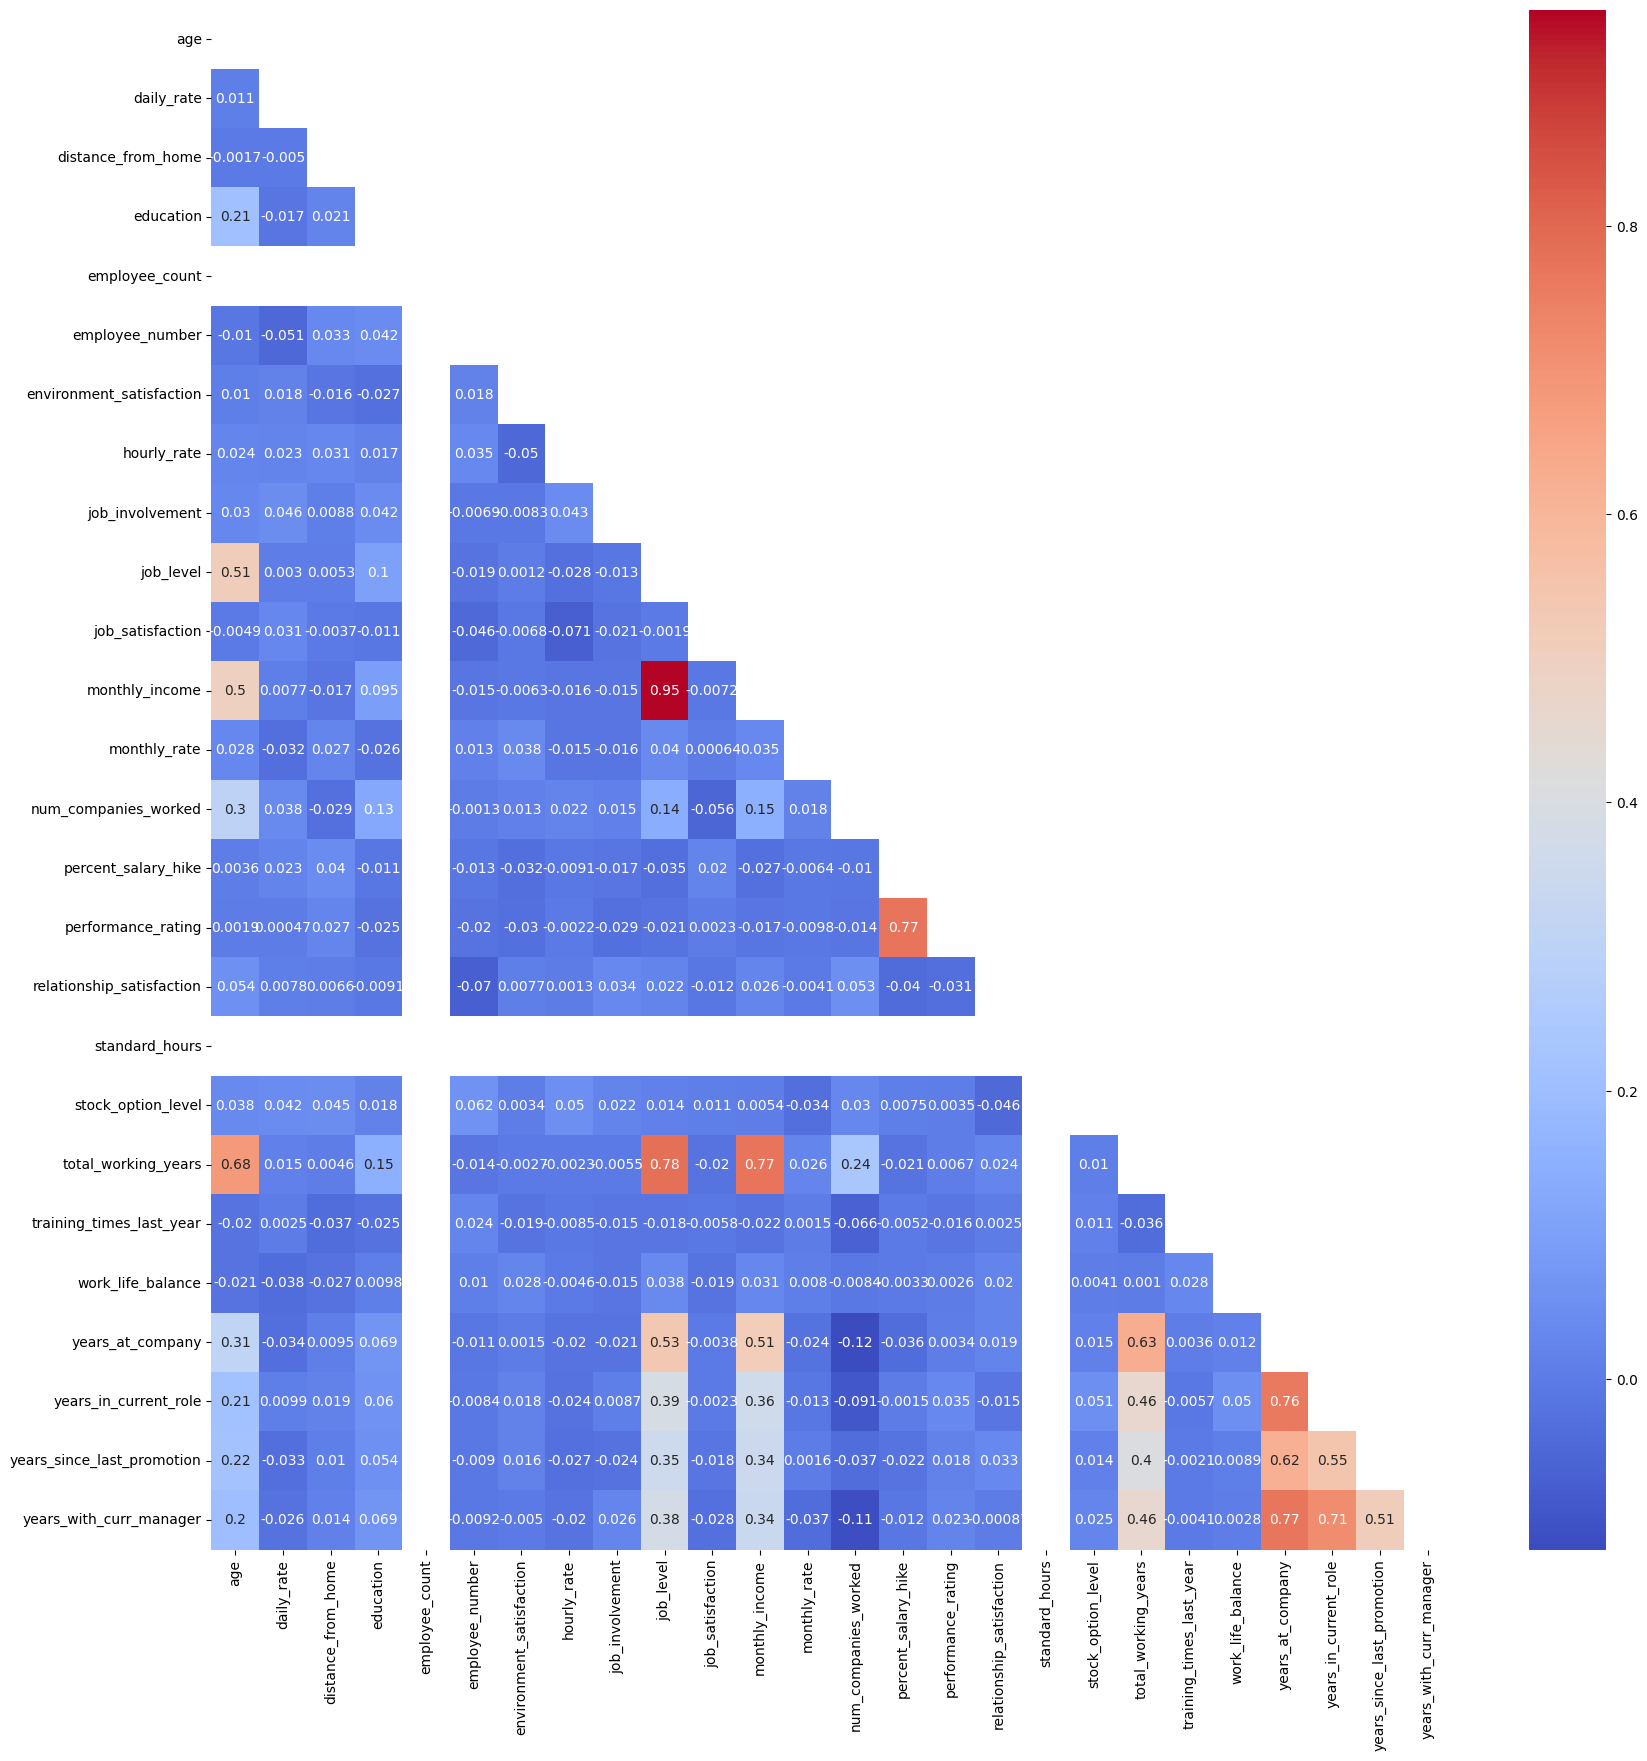

In [14]:
# Let's start Exploratory Data Analysis
# Let's see the correlation between the variables
mask = np.triu(data.corr(numeric_only=True))
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', mask=mask)

# Univariate Analysis

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'daily_rate'}>,
        <Axes: title={'center': 'distance_from_home'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'employee_count'}>],
       [<Axes: title={'center': 'employee_number'}>,
        <Axes: title={'center': 'environment_satisfaction'}>,
        <Axes: title={'center': 'hourly_rate'}>,
        <Axes: title={'center': 'job_involvement'}>,
        <Axes: title={'center': 'job_level'}>],
       [<Axes: title={'center': 'job_satisfaction'}>,
        <Axes: title={'center': 'monthly_income'}>,
        <Axes: title={'center': 'monthly_rate'}>,
        <Axes: title={'center': 'num_companies_worked'}>,
        <Axes: title={'center': 'percent_salary_hike'}>],
       [<Axes: title={'center': 'performance_rating'}>,
        <Axes: title={'center': 'relationship_satisfaction'}>,
        <Axes: title={'center': 'standard_hours'}>,
        <Axes: title={'center': 'stock_option_l

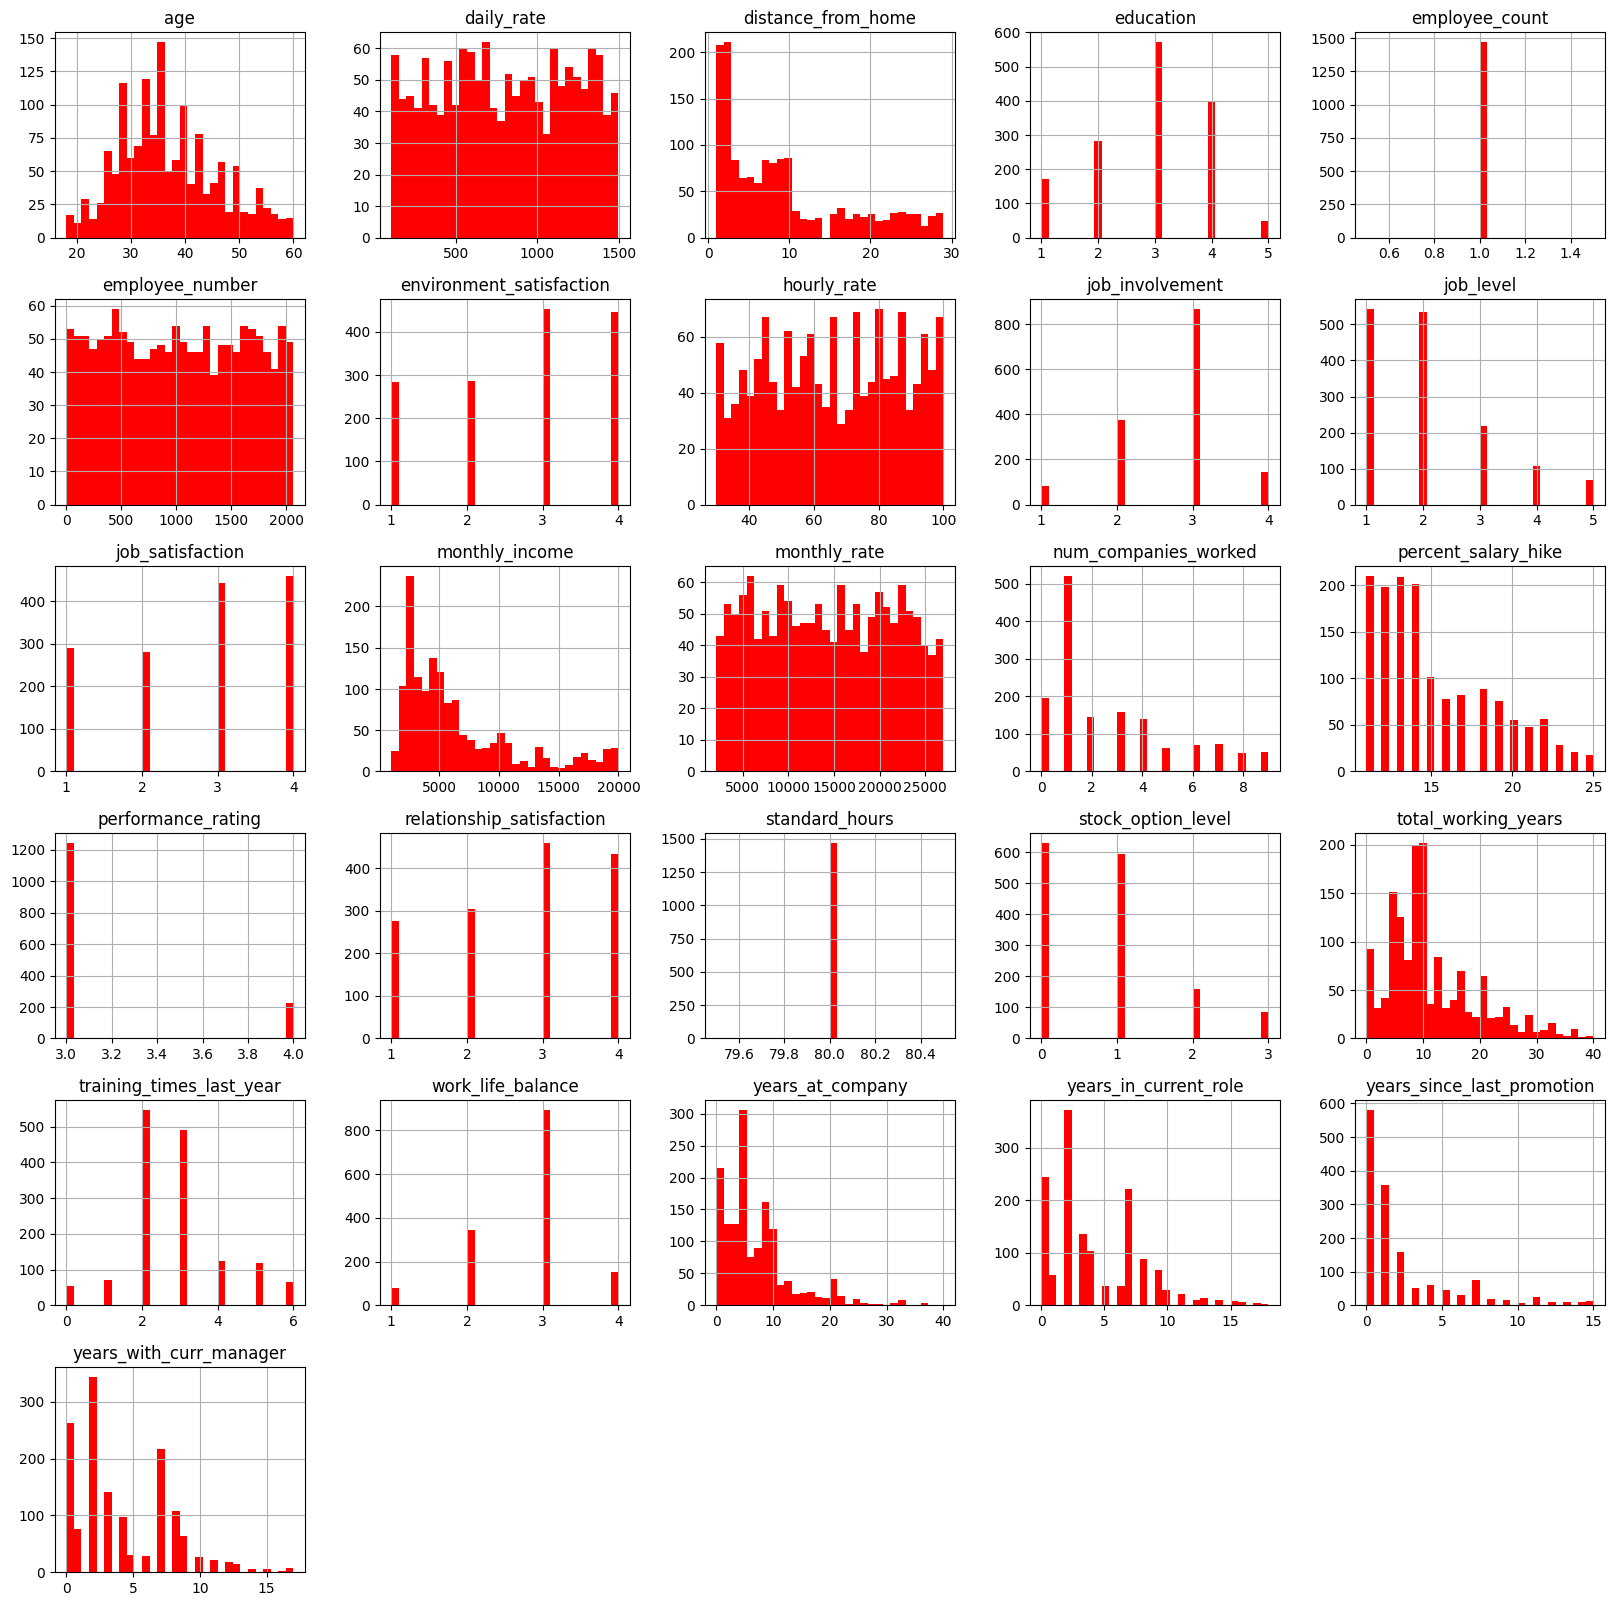

In [15]:
# Let's see the distribution of the variables
data.hist(bins=30, figsize=(20,20), color='r')

<Axes: xlabel='attrition', ylabel='count'>

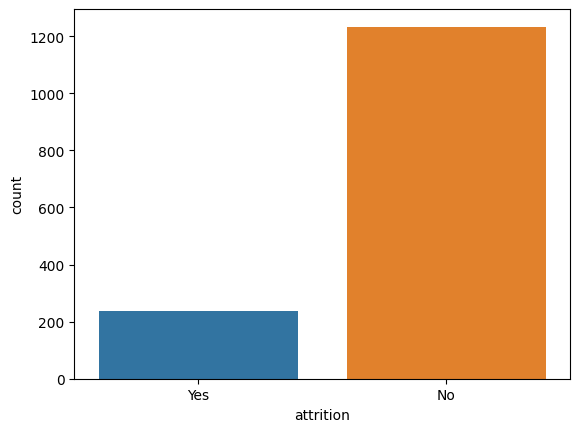

In [16]:
# Let's see the distribution of the target variable
sns.countplot(x='attrition', data=data)

#### As we can see from the above analysis, the dataset includes both numerical and categorical variables. The target variable is `Attrition` which is a binary variable. The dataset is imbalanced with 1233 employees who stayed and 237 employees who left the company.

In [25]:
# Let's first visualize the categorical variables
def bar_plot(variable):
    var = data[variable]
    varValue = var.value_counts()
    color = ['blue', 'purple', 'red', 'yellow', 'green', 'orange', 'pink', 'brown', 'violet']
    plt.figure(figsize=(22,8))
    plt.bar(varValue.index, varValue, color=color)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    print('{}: \n{}'.format(variable, varValue))

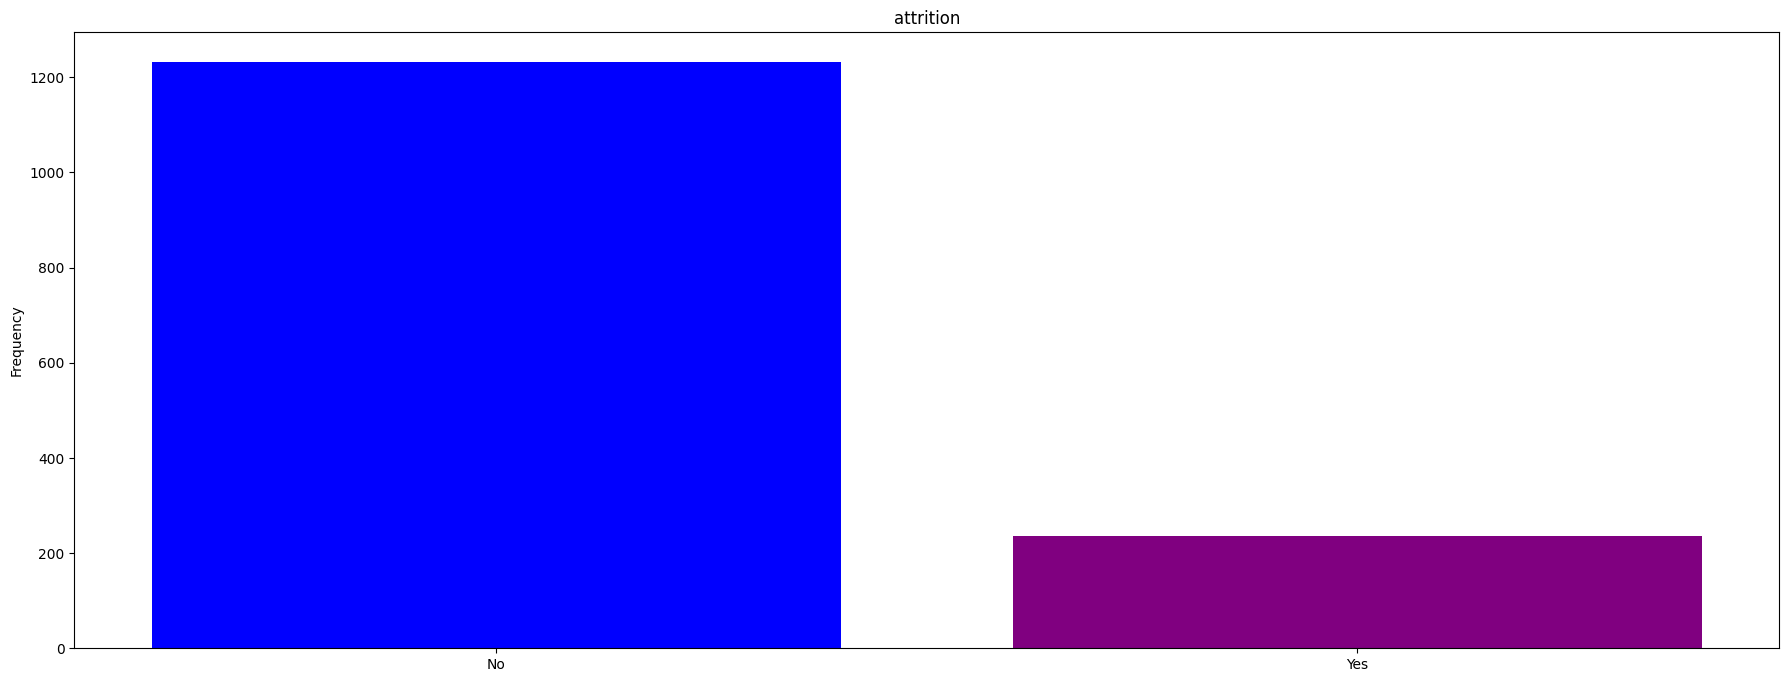

attrition: 
attrition
No     1233
Yes     237
Name: count, dtype: int64


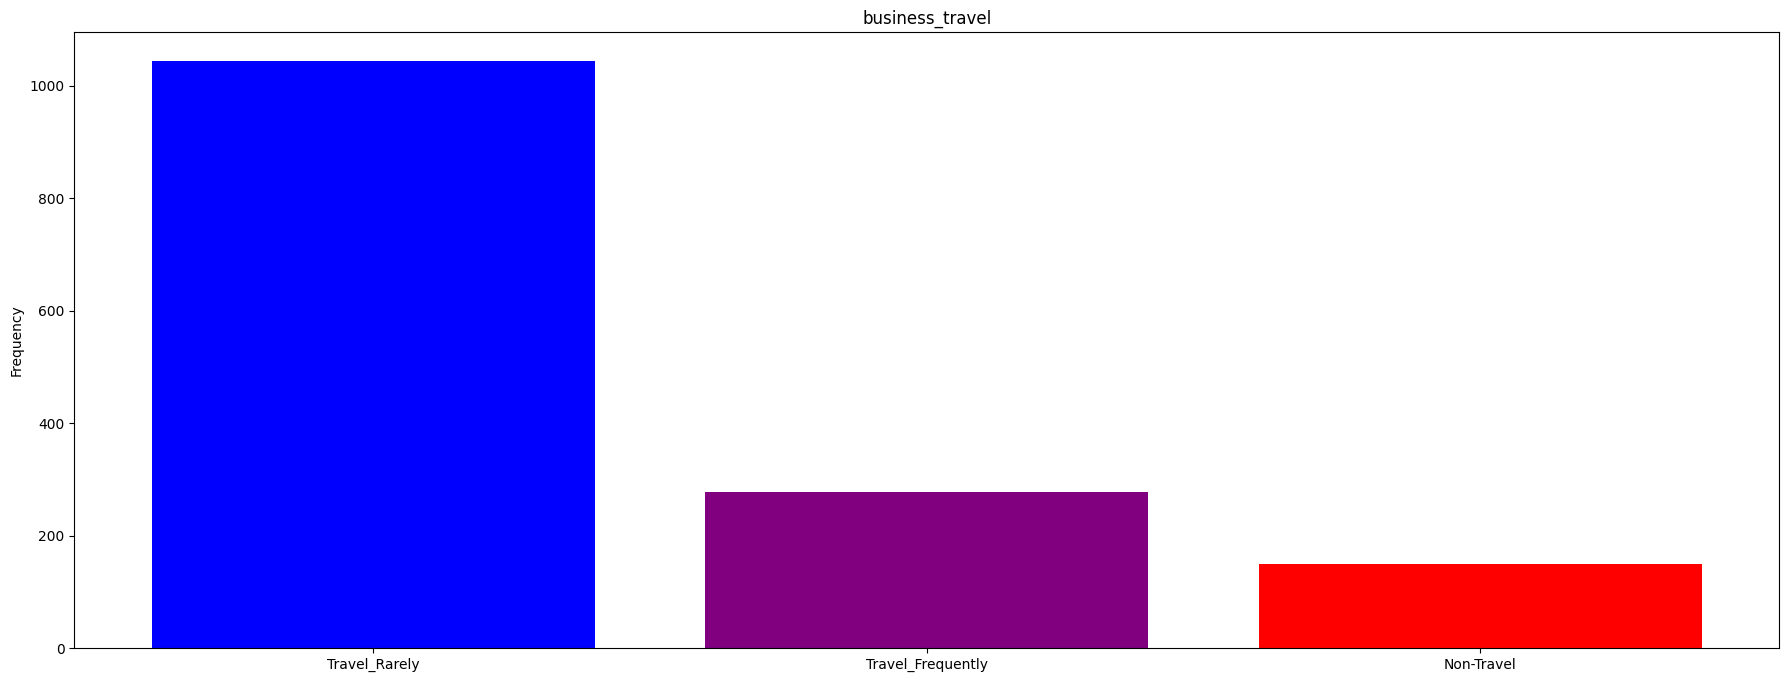

business_travel: 
business_travel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


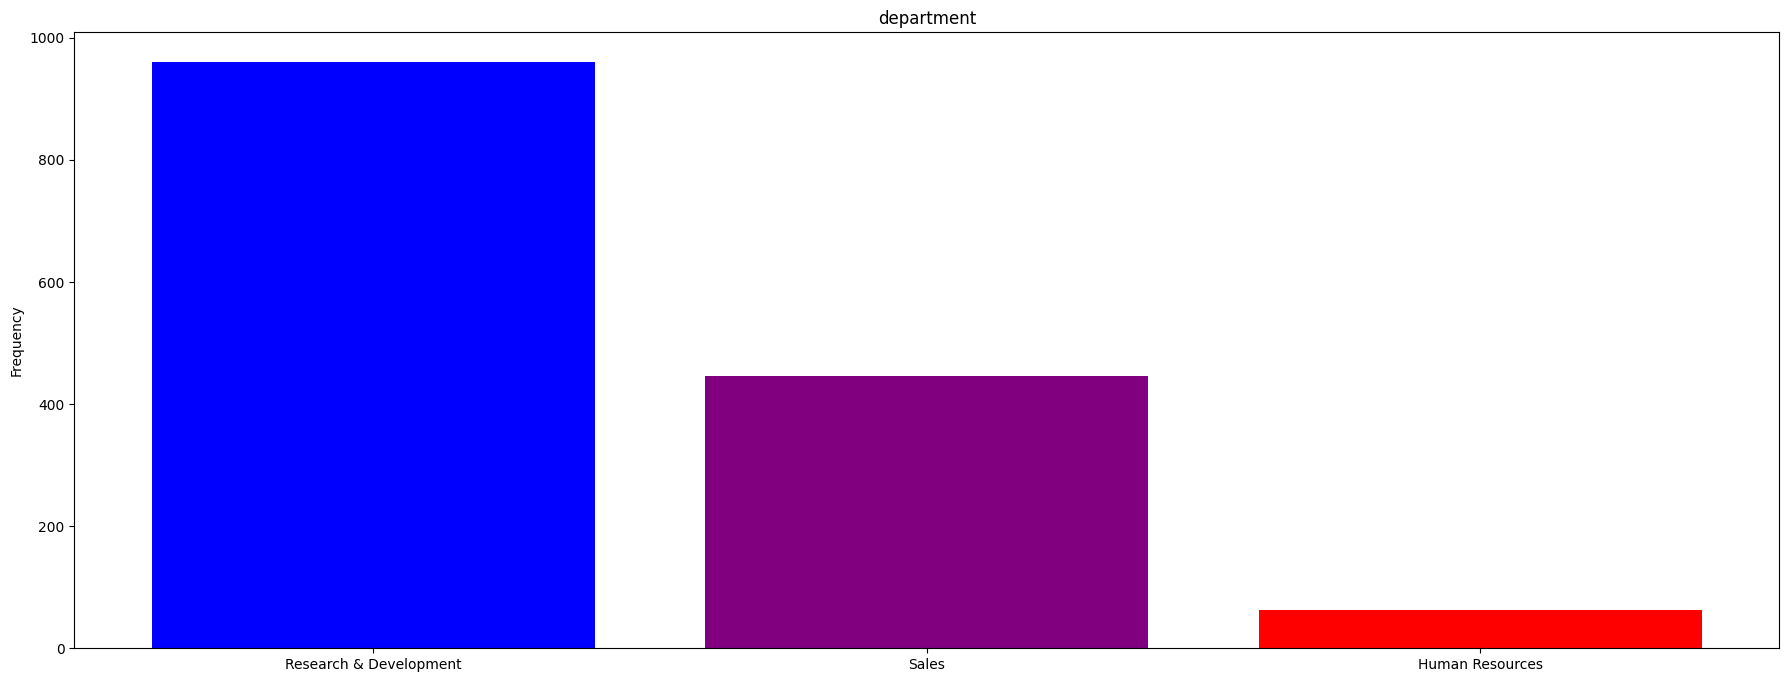

department: 
department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


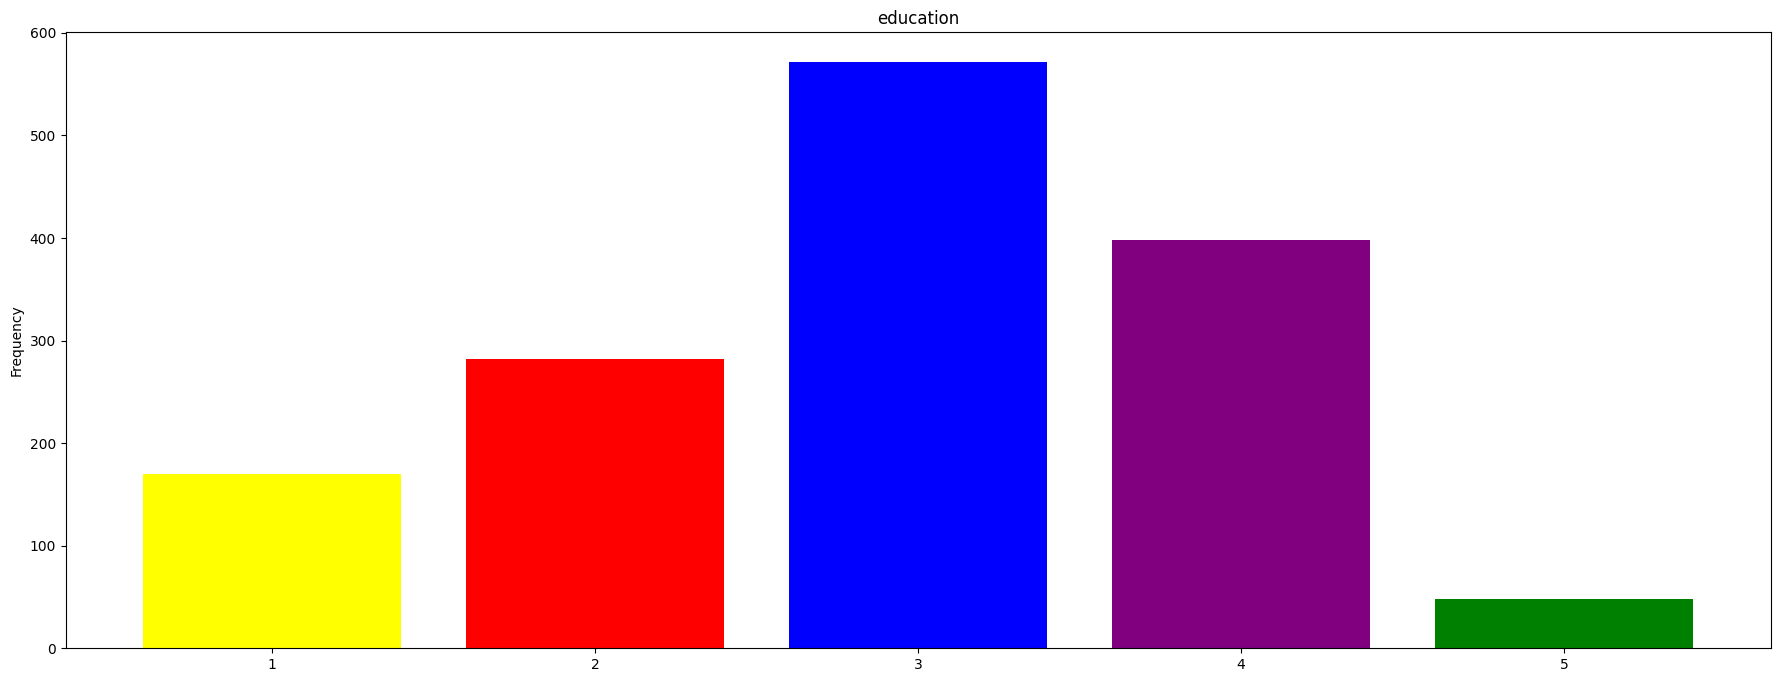

education: 
education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64


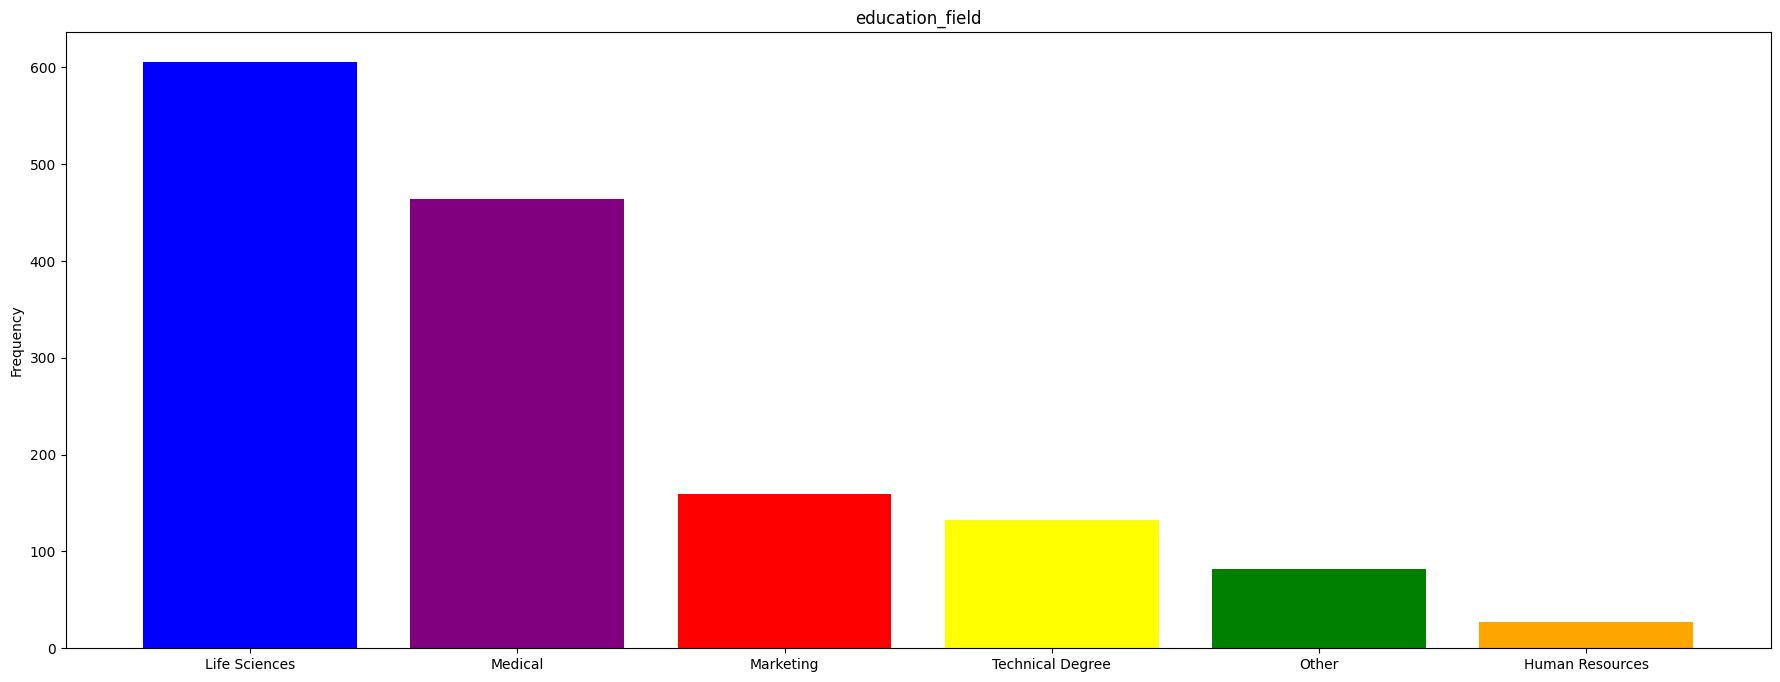

education_field: 
education_field
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


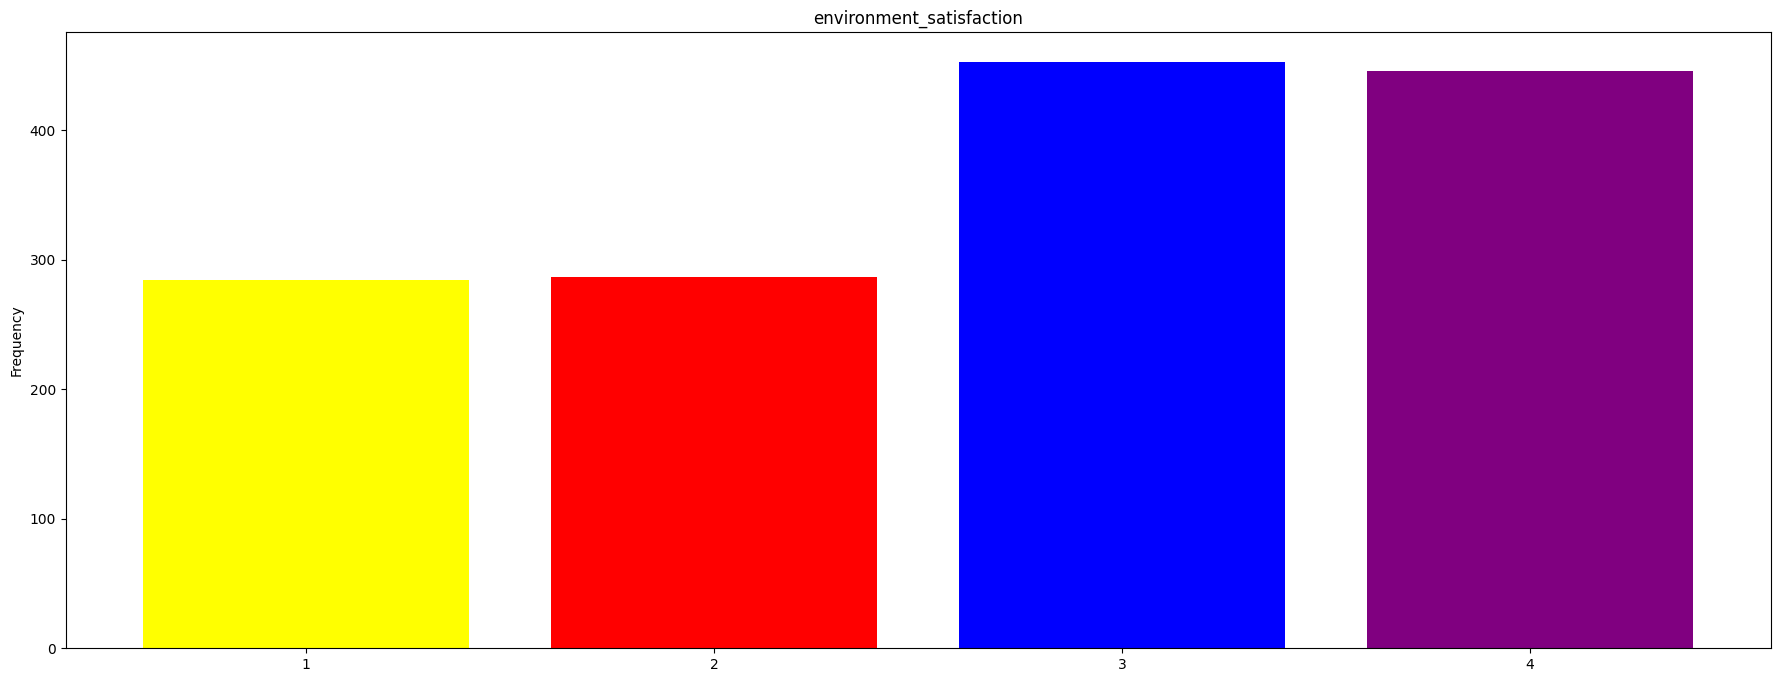

environment_satisfaction: 
environment_satisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64


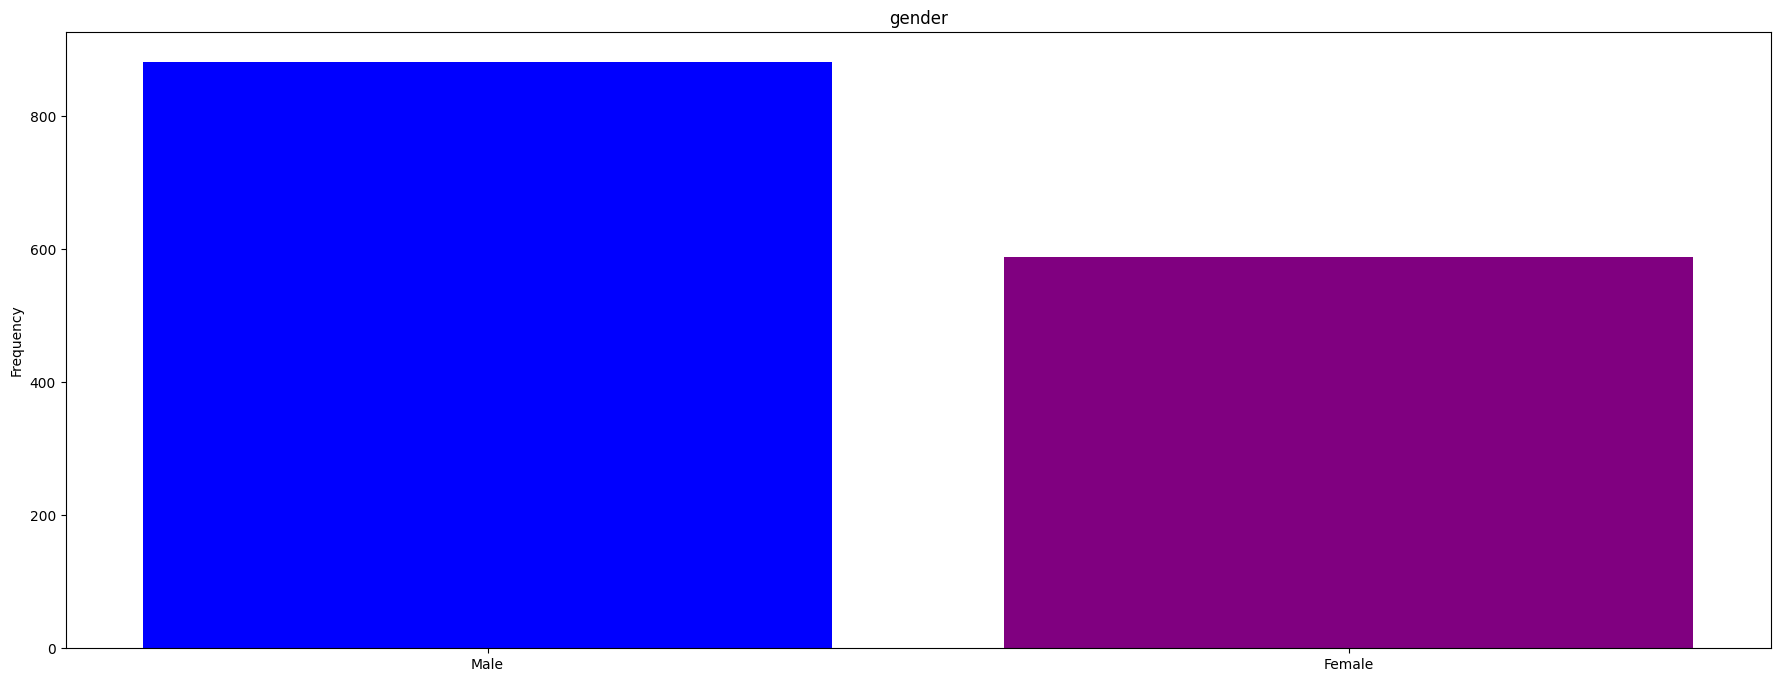

gender: 
gender
Male      882
Female    588
Name: count, dtype: int64


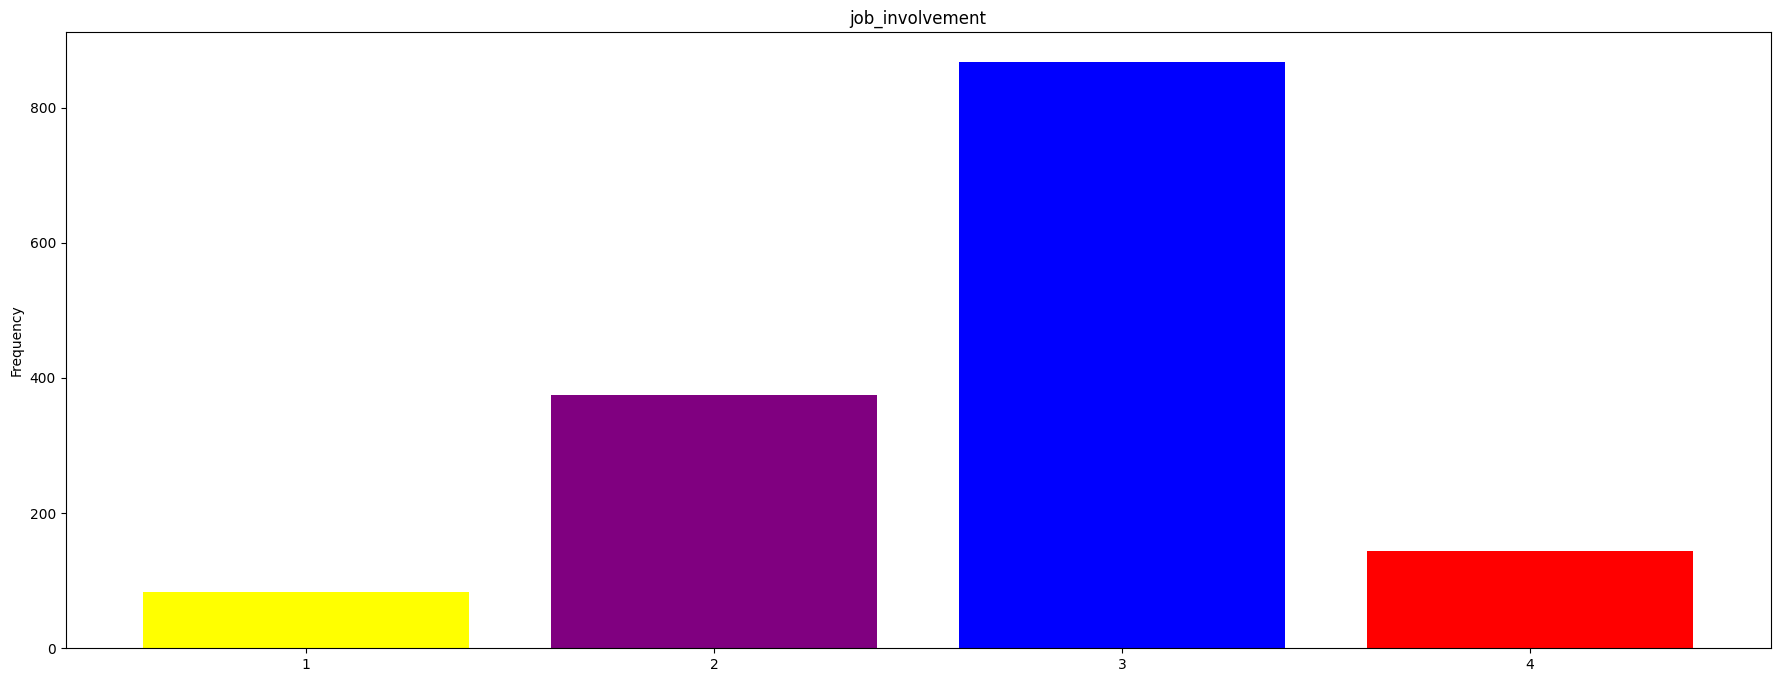

job_involvement: 
job_involvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64


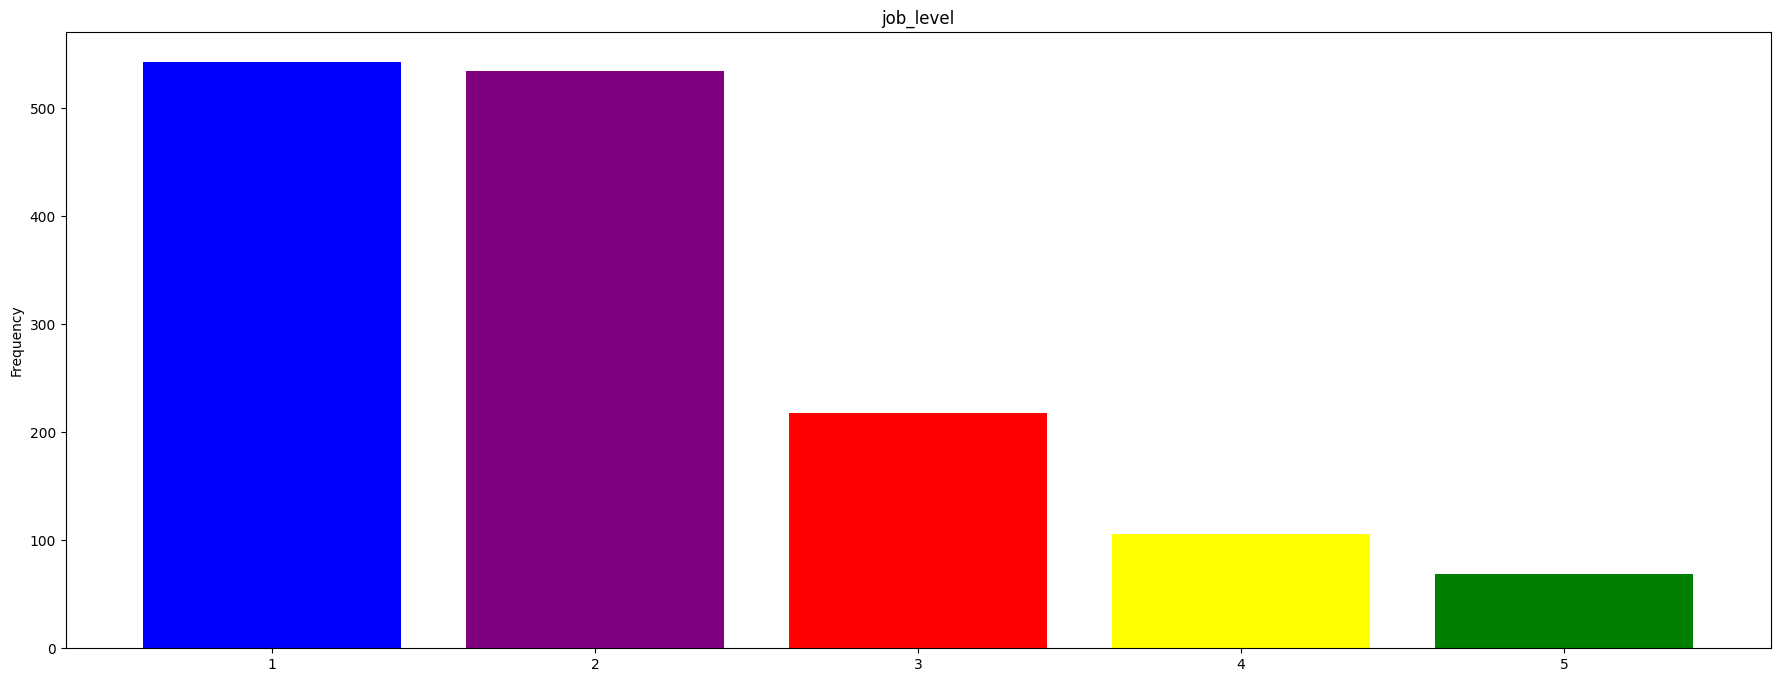

job_level: 
job_level
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64


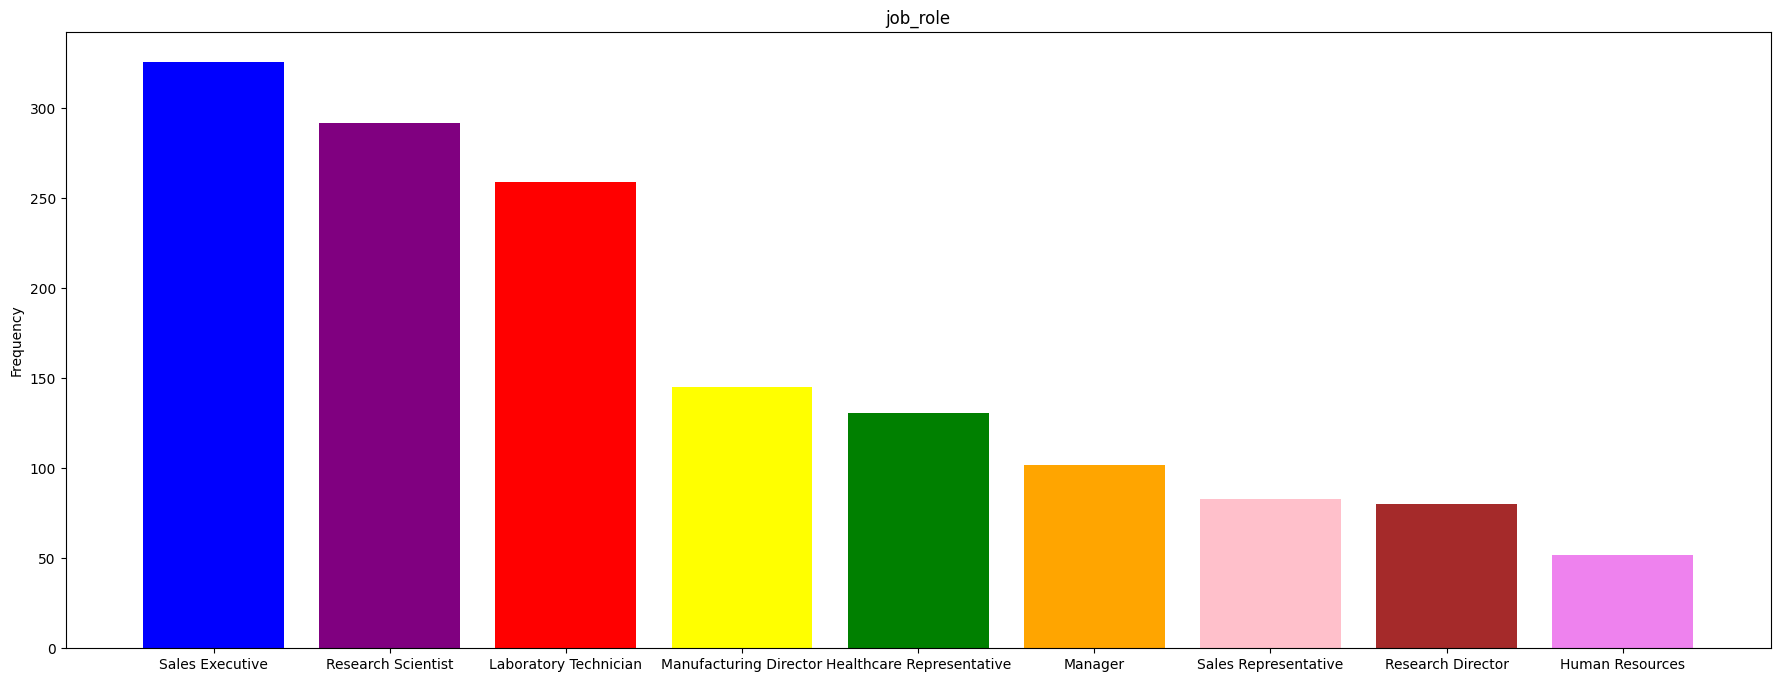

job_role: 
job_role
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


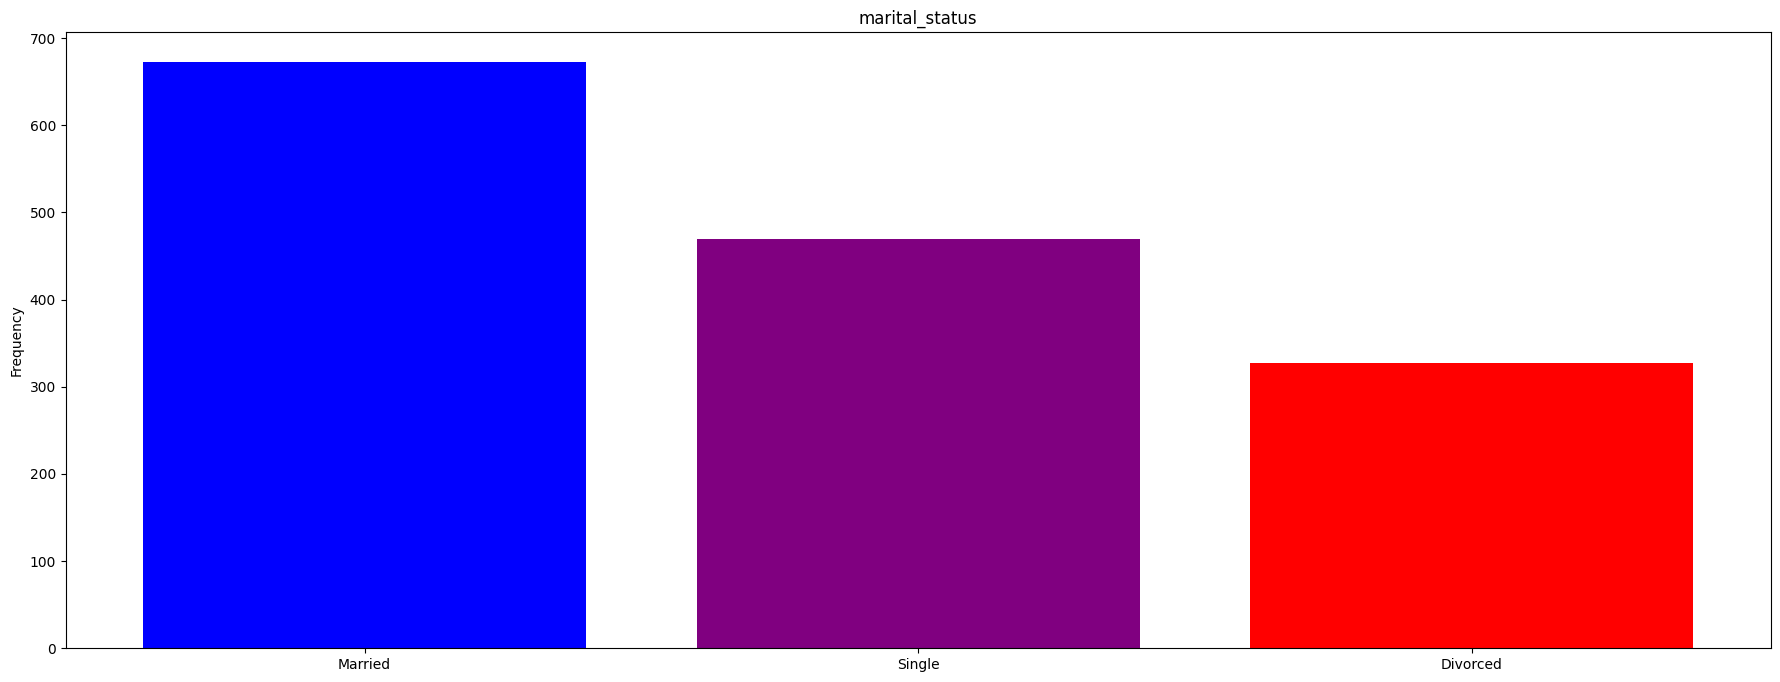

marital_status: 
marital_status
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


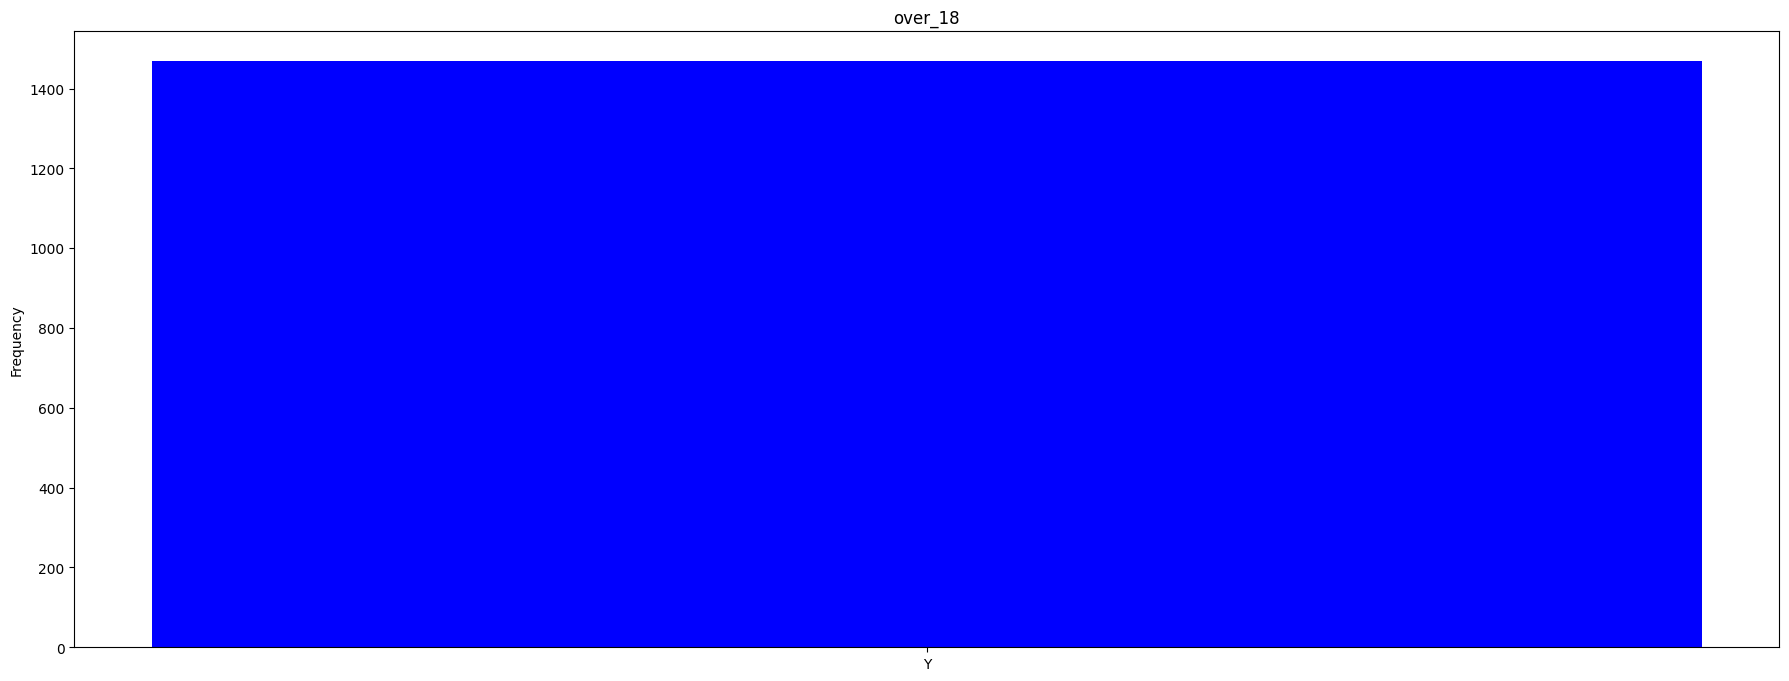

over_18: 
over_18
Y    1470
Name: count, dtype: int64


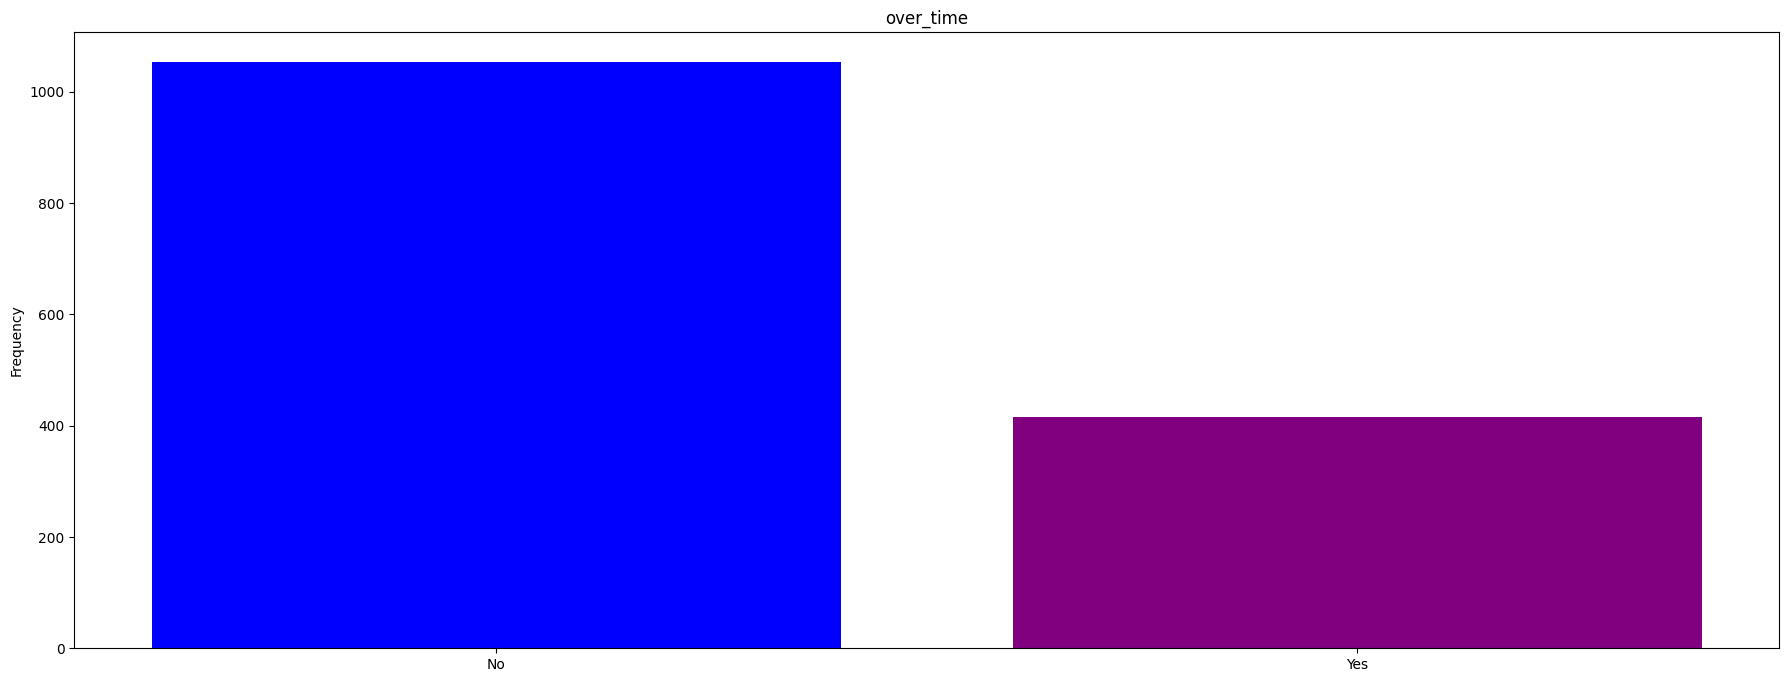

over_time: 
over_time
No     1054
Yes     416
Name: count, dtype: int64


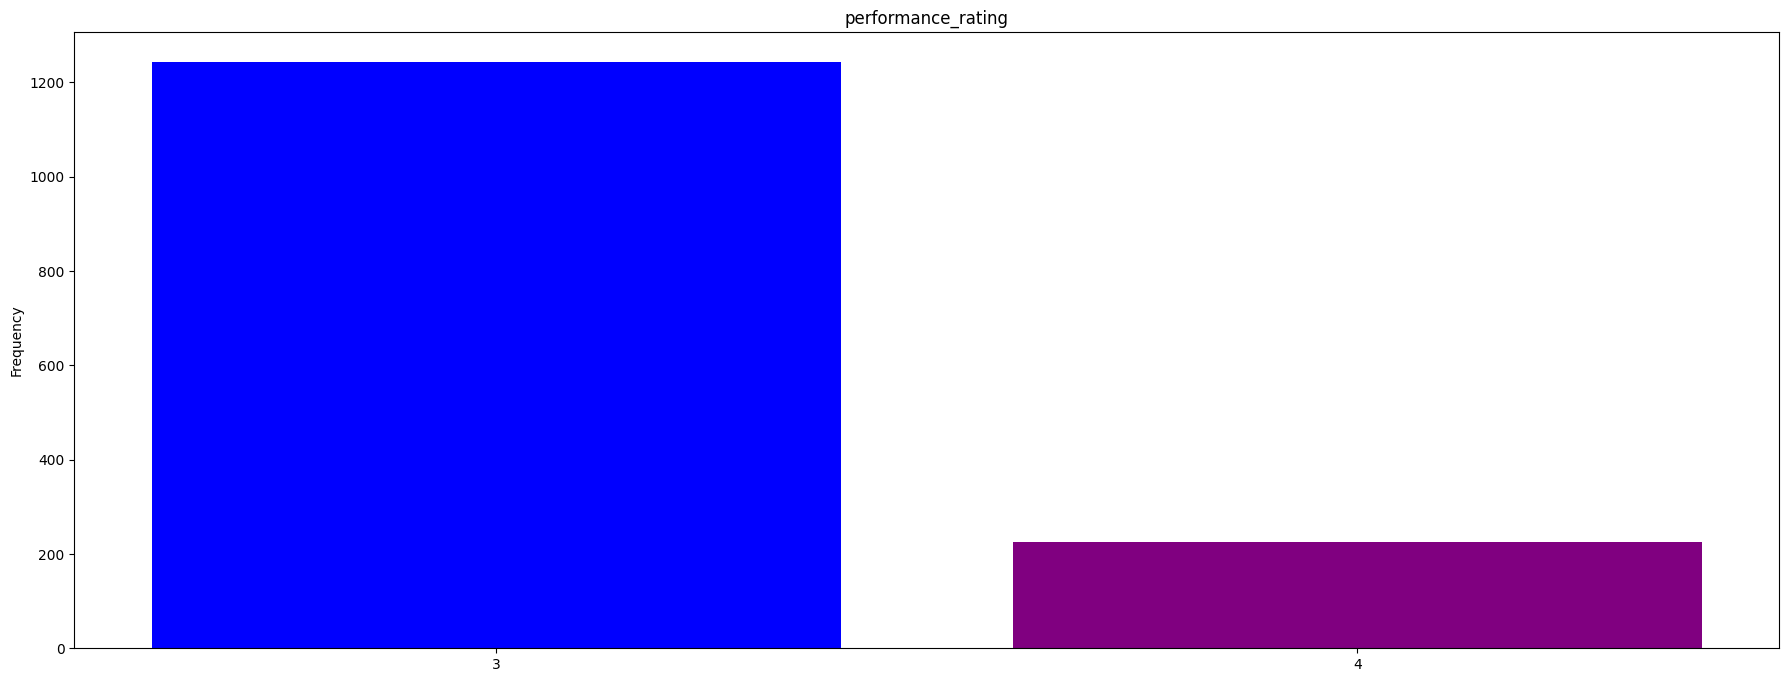

performance_rating: 
performance_rating
3    1244
4     226
Name: count, dtype: int64


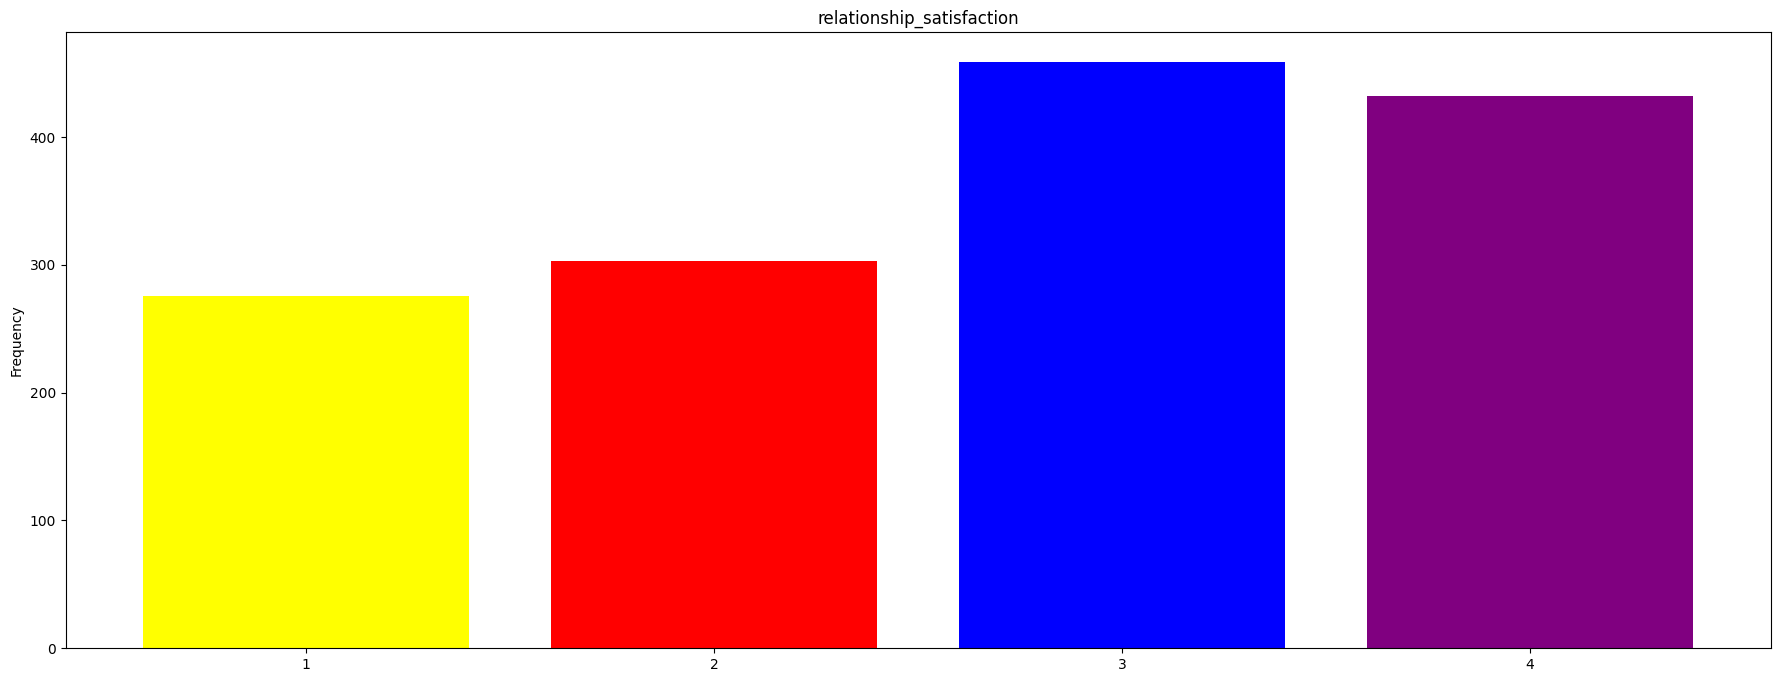

relationship_satisfaction: 
relationship_satisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64


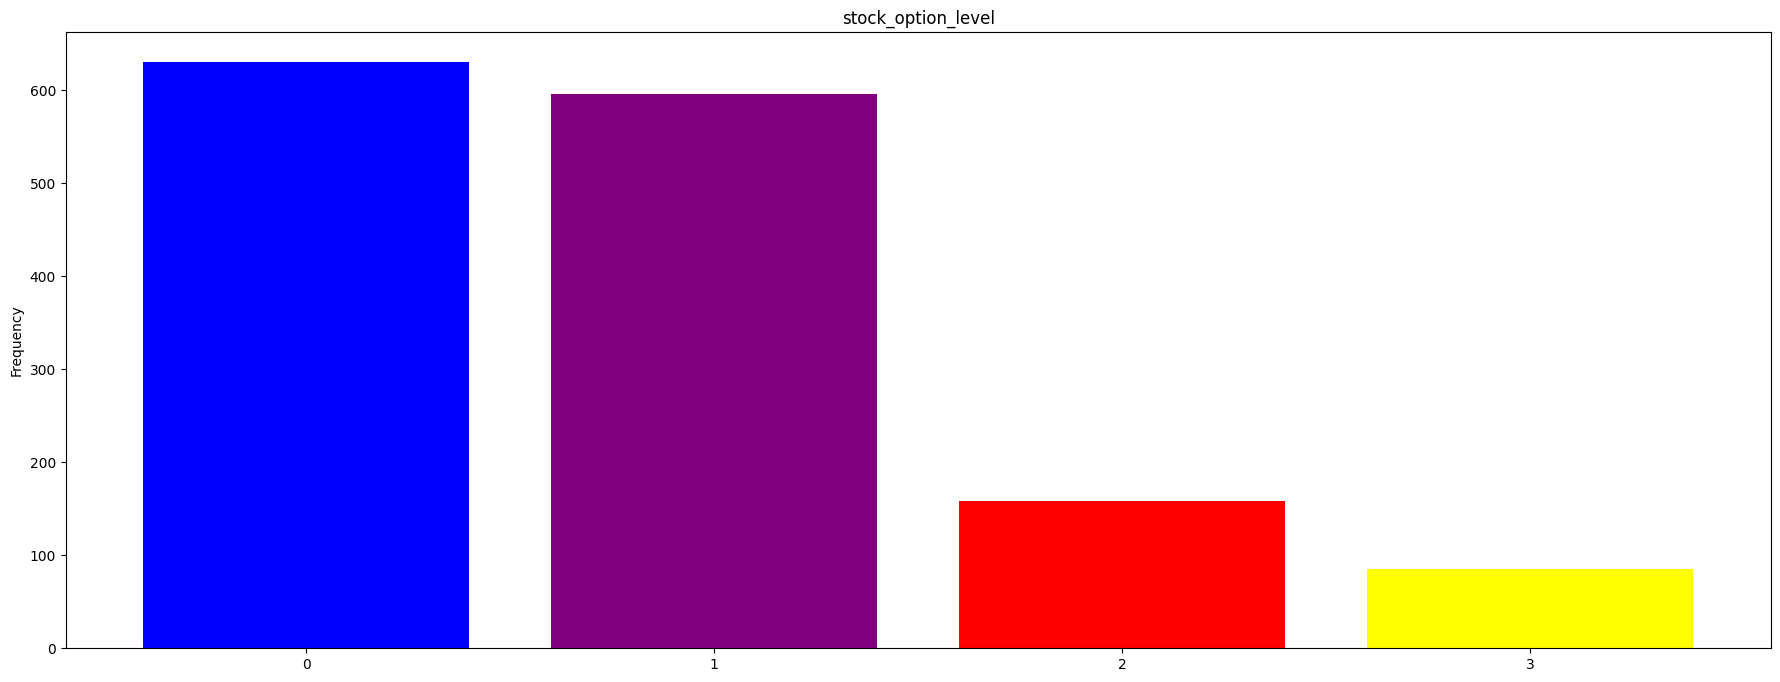

stock_option_level: 
stock_option_level
0    631
1    596
2    158
3     85
Name: count, dtype: int64


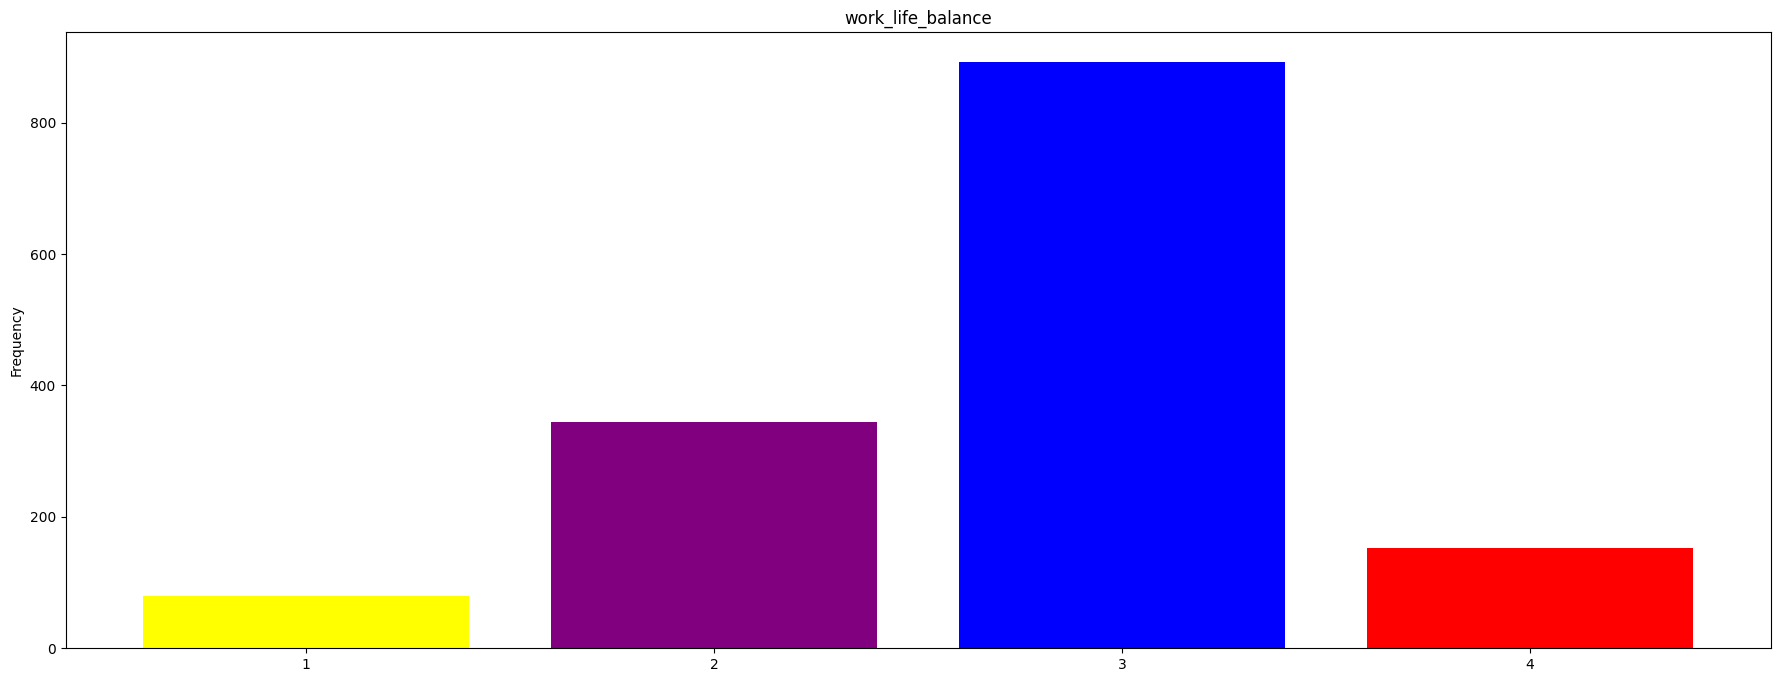

work_life_balance: 
work_life_balance
3    893
2    344
4    153
1     80
Name: count, dtype: int64


In [26]:
category1 = ['attrition', 'business_travel', 'department', 'education', 'education_field', 'environment_satisfaction', 'gender', 'job_involvement', 'job_level', 'job_role', 'marital_status', 'over_18', 'over_time', 'performance_rating', 'relationship_satisfaction', 'stock_option_level', 'work_life_balance']
for c in category1:
    bar_plot(c)

#### From the above univariate analysis, we can see that the dataset includes both numerical and categorical variables. The numerical variables are `Age`, `DailyRate`, `DistanceFromHome`, `EmployeeCount`, `EmployeeNumber`, `HourlyRate`, `MonthlyIncome`, `MonthlyRate`, `NumCompaniesWorked`, `PercentSalaryHike`, `StandardHours`, `TotalWorkingYears`, and `TrainingTimesLastYear`. The categorical variables are `BusinessTravel`, `Department`, `Education`, `EducationField`, `EnvironmentSatisfaction`, `Gender`, `JobInvolvement`, `JobLevel`, `JobRole`, `JobSatisfaction`, `MaritalStatus`, `Over18`, `OverTime`, `PerformanceRating`, `RelationshipSatisfaction`, and `StockOptionLevel`. 

#### In the above frequency distribution of categorical variables, we can see that the dataset includes both ordinal and nominal variables. The ordinal variables are `Education`, `EnvironmentSatisfaction`, `JobInvolvement`, `JobLevel`, `JobSatisfaction`, `PerformanceRating`, `RelationshipSatisfaction`, and `StockOptionLevel`. The nominal variables are `BusinessTravel`, `Department`, `EducationField`, `Gender`, `JobRole`, `MaritalStatus`, `Over18`, and `OverTime`.

In [19]:
# Let's visualize the numerical variables
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    sns.histplot(data[variable], bins=30, color='g', kde=True)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title('{} distribution with hist'.format(variable))
    plt.show()

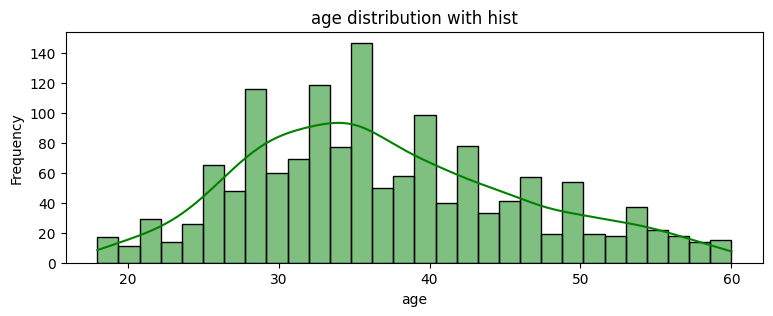

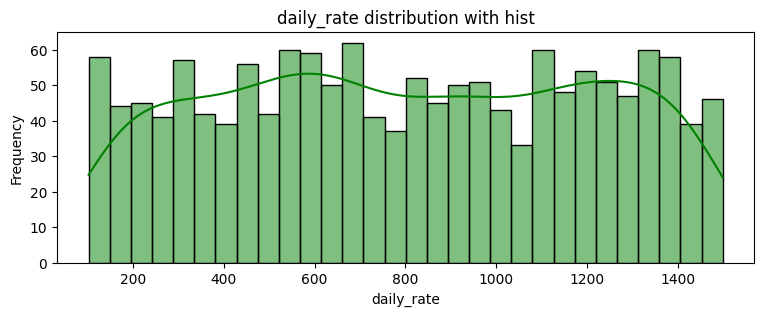

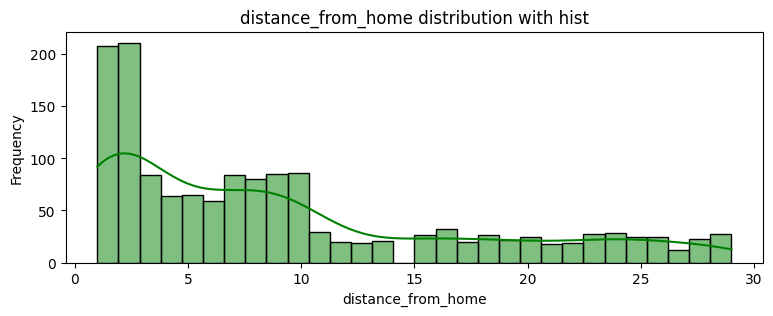

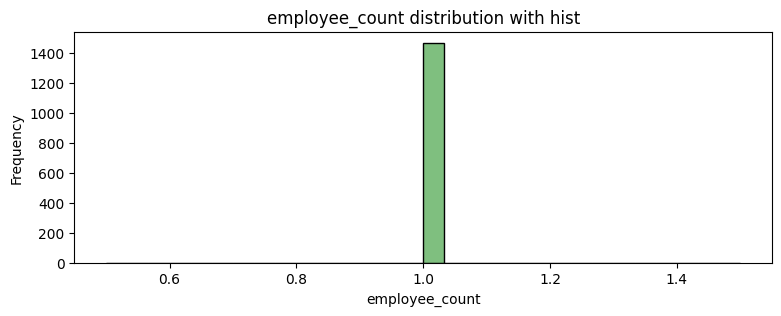

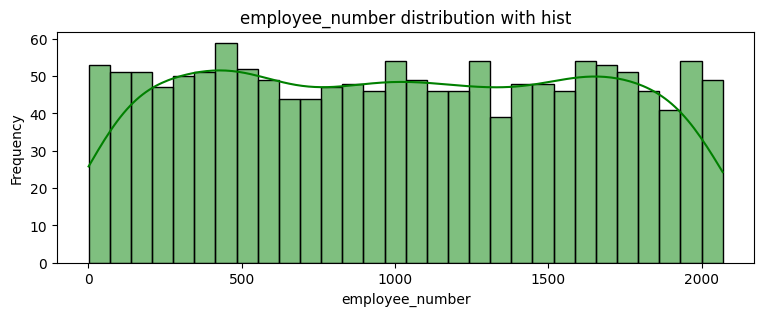

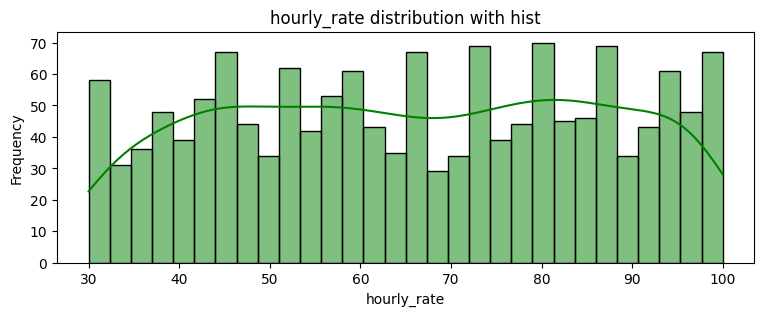

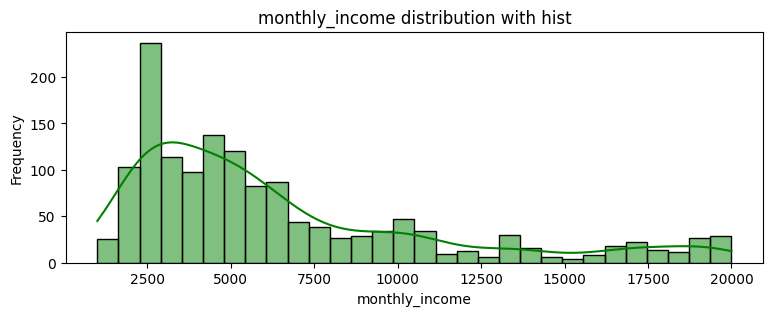

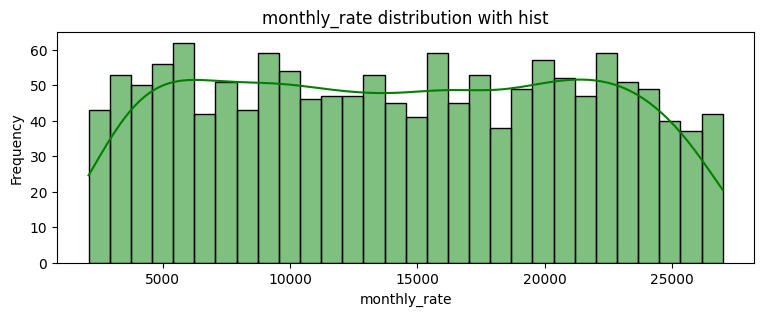

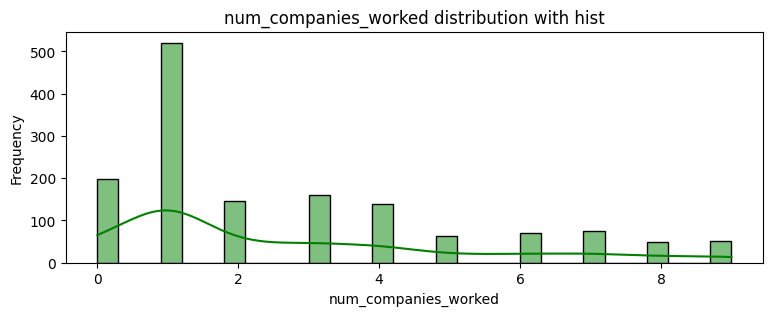

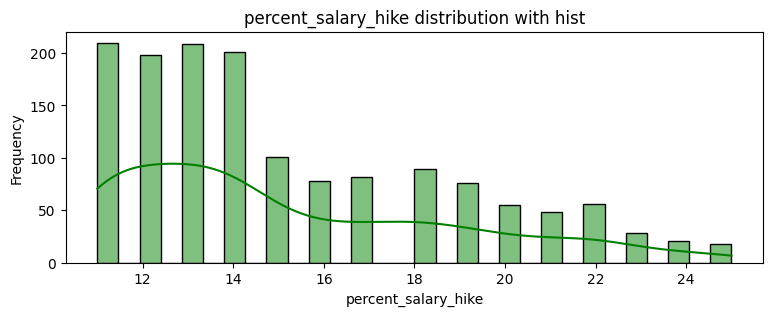

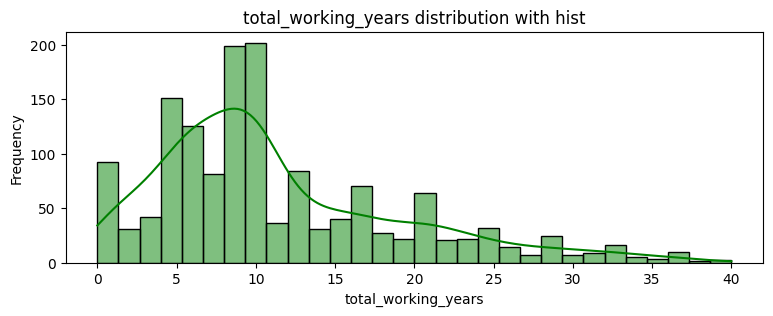

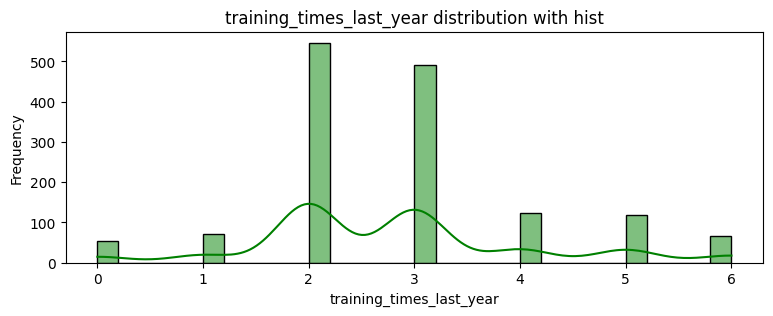

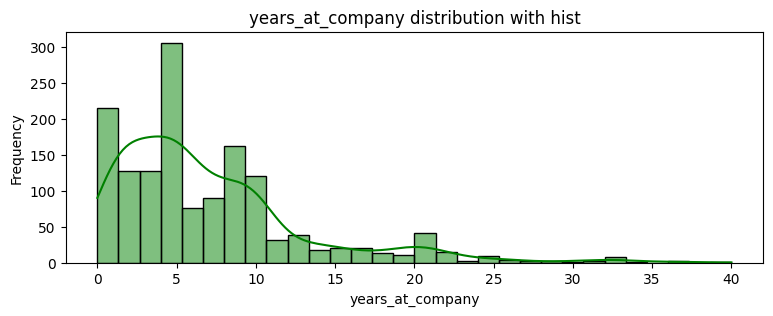

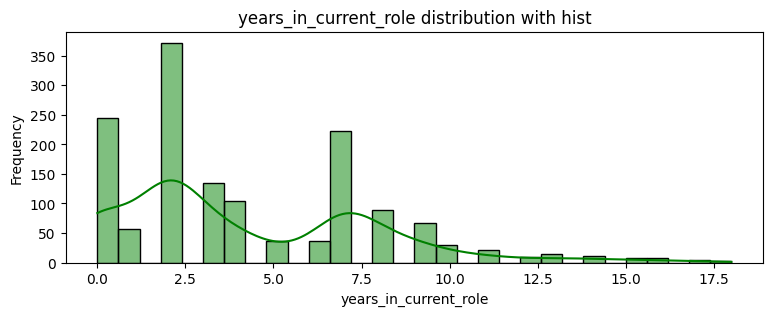

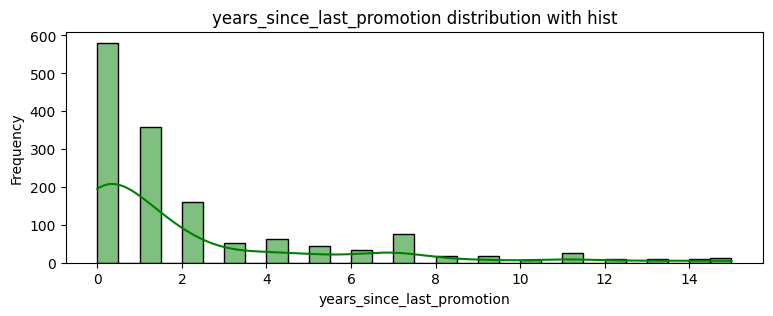

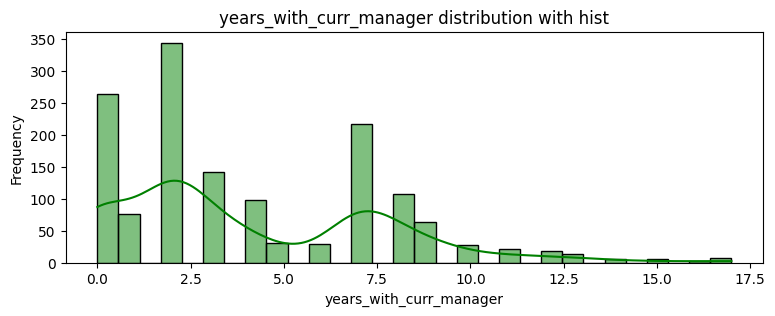

In [20]:
numericVar = ['age', 'daily_rate', 'distance_from_home', 'employee_count', 'employee_number', 'hourly_rate', 'monthly_income', 'monthly_rate', 'num_companies_worked', 'percent_salary_hike', 'total_working_years', 'training_times_last_year', 'years_at_company', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager']
for n in numericVar:
    plot_hist(n)

#### In the above numerical variable frequency distribution, we can see that the dataset includes both continuous and discrete variables. The continuous variables are `Age`, `DailyRate`, `HourlyRate`, `MonthlyIncome`, `MonthlyRate`, `PercentSalaryHike`, and `TotalWorkingYears`. The discrete variables are `DistanceFromHome`, `EmployeeCount`, `EmployeeNumber`, `NumCompaniesWorked`, `StandardHours`, and `TrainingTimesLastYear`.

# Let's try bivariate analysis

In [34]:
def bivariate_analysis(data, x, y, hue=None):
    plt.figure(figsize=(20, 6))
    sns.countplot(data=data, y=x, hue=hue, palette='viridis')
    plt.title(f'{x} vs {y}')
    plt.show()

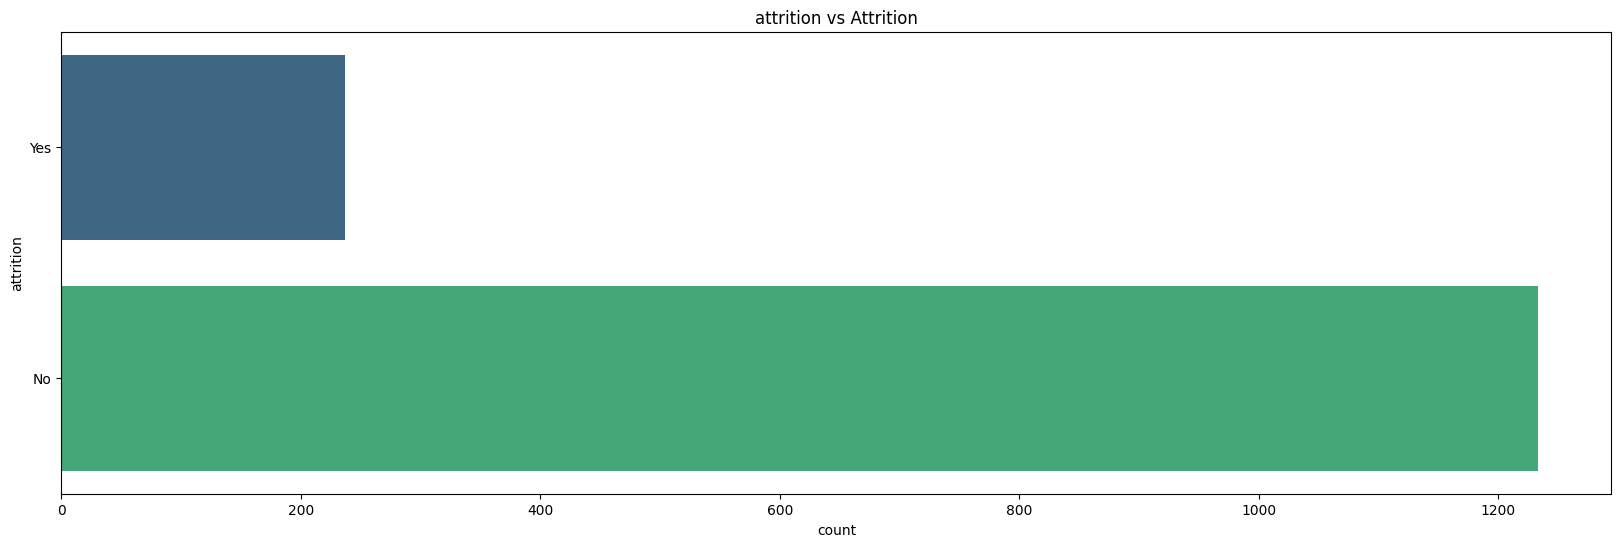

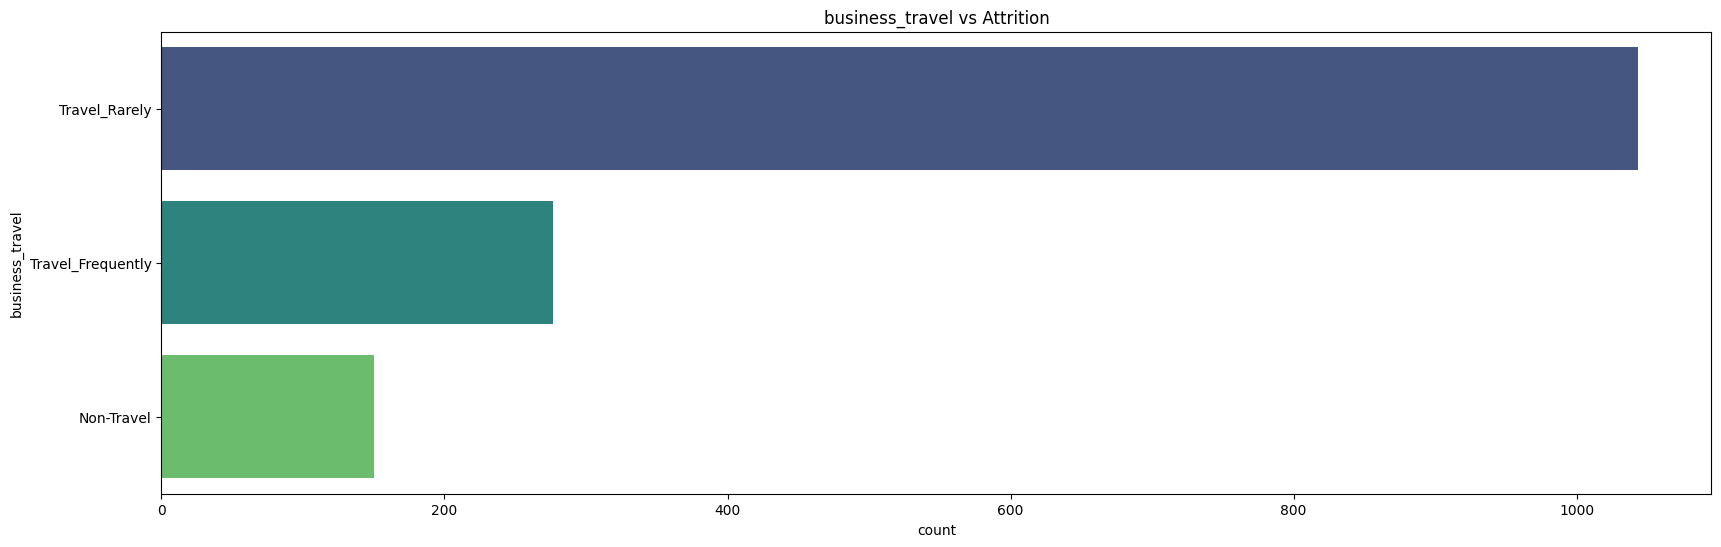

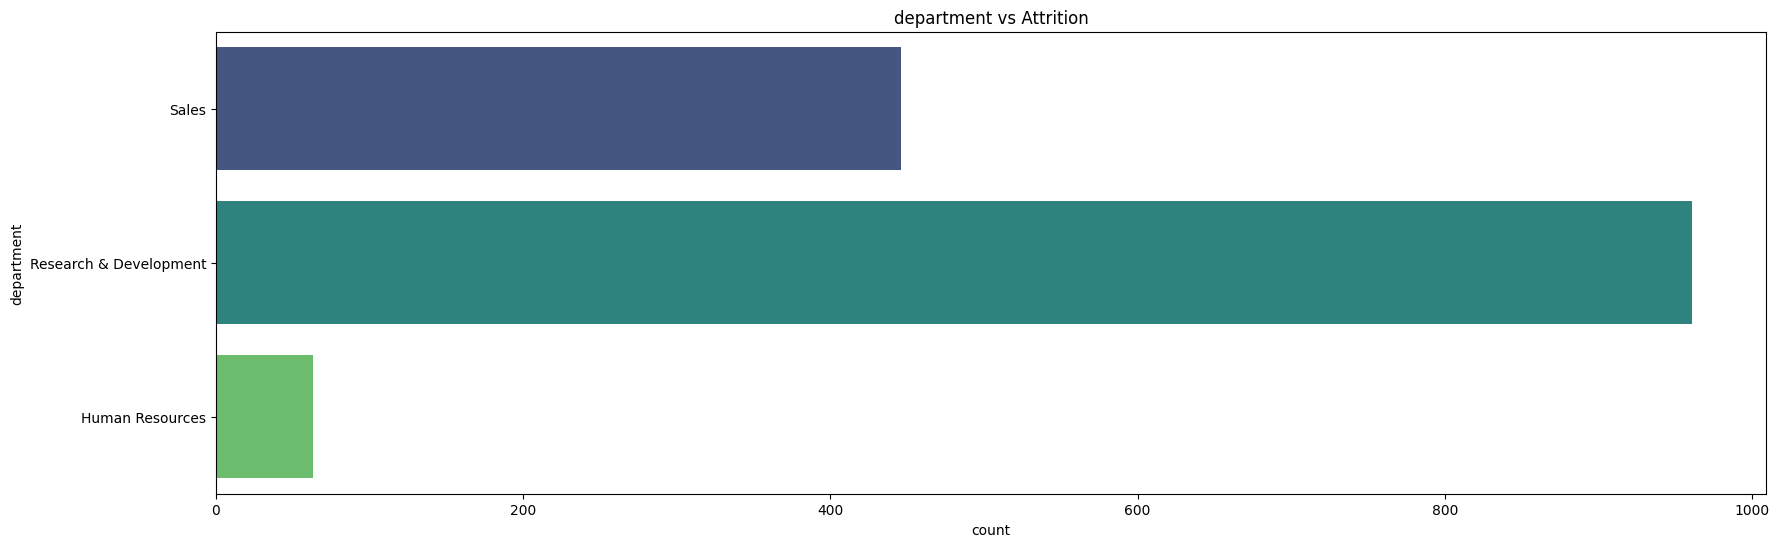

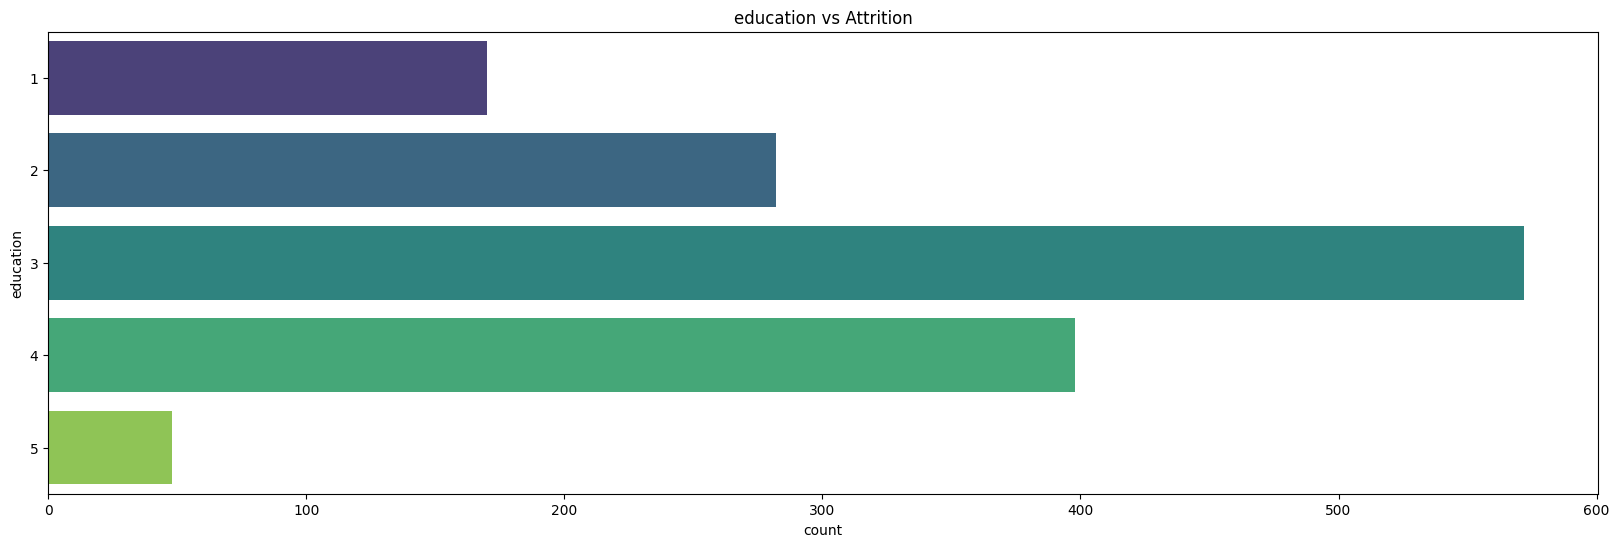

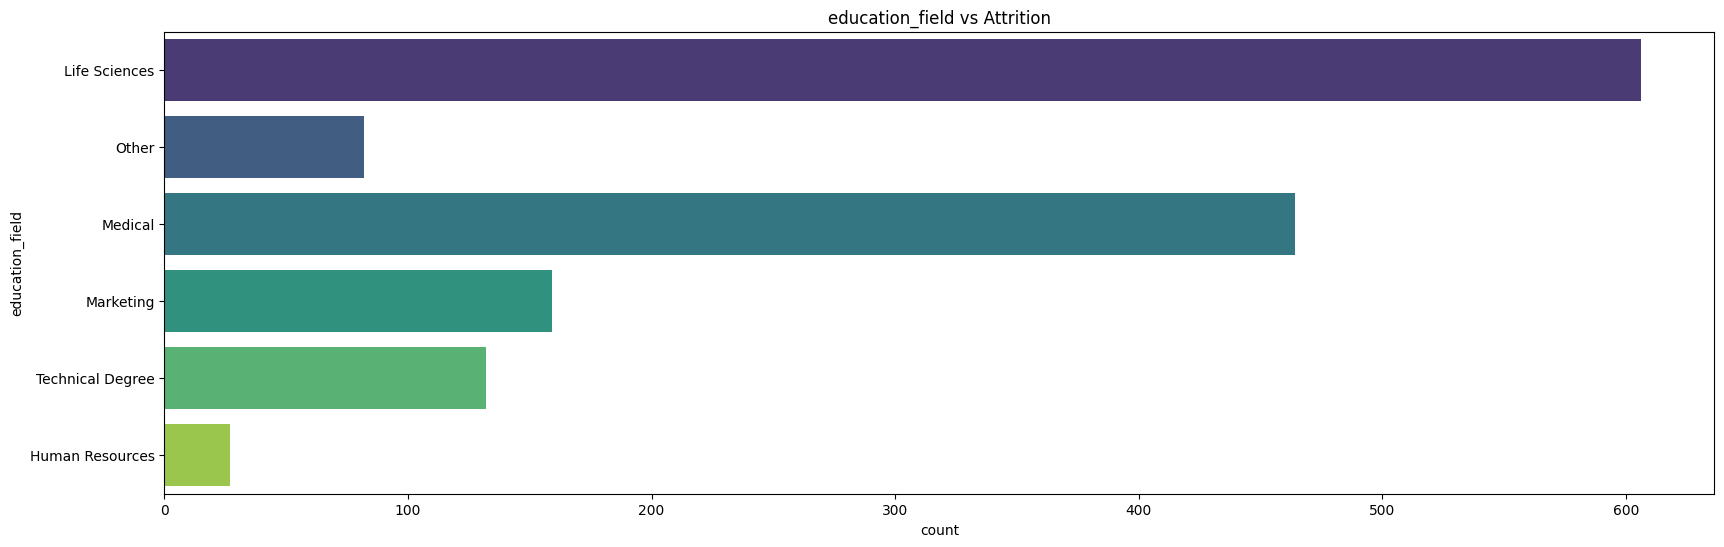

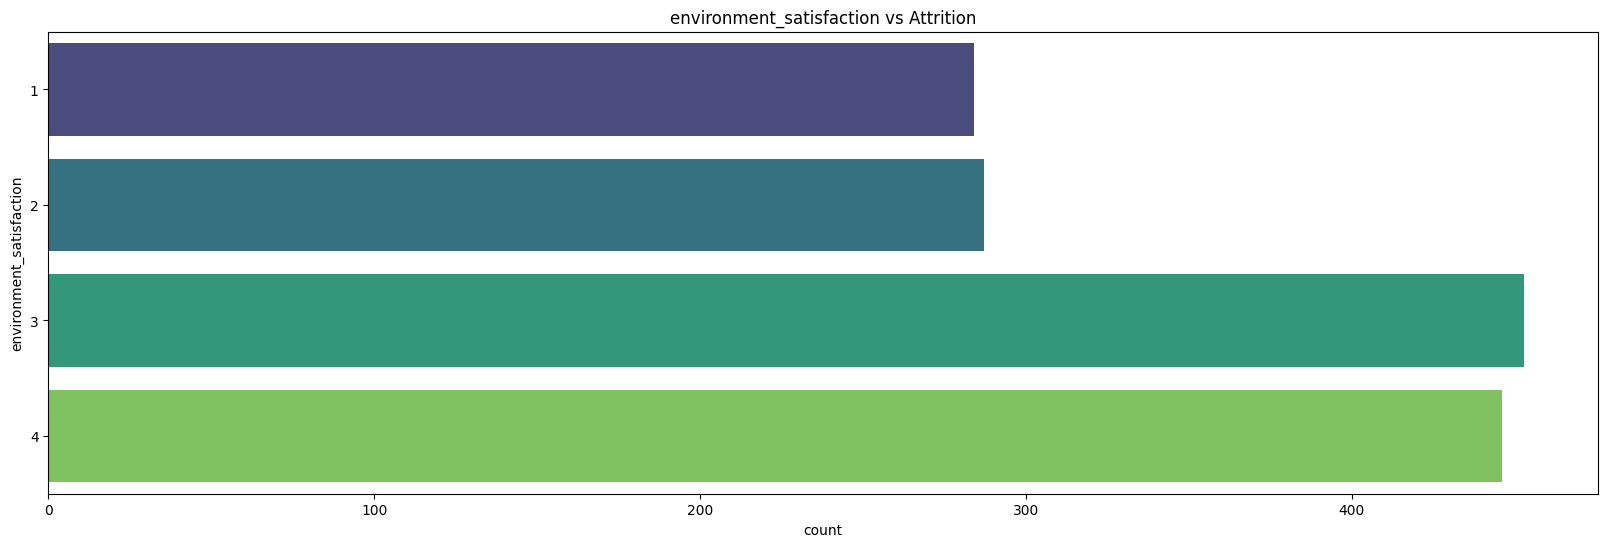

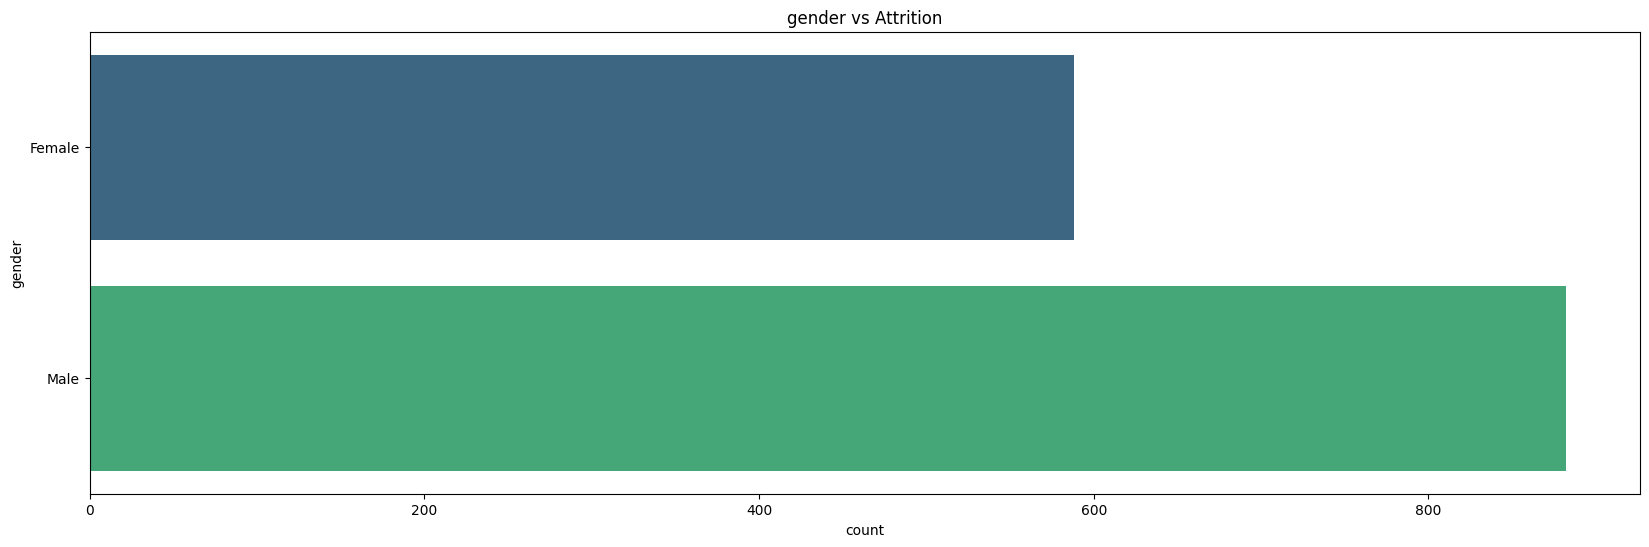

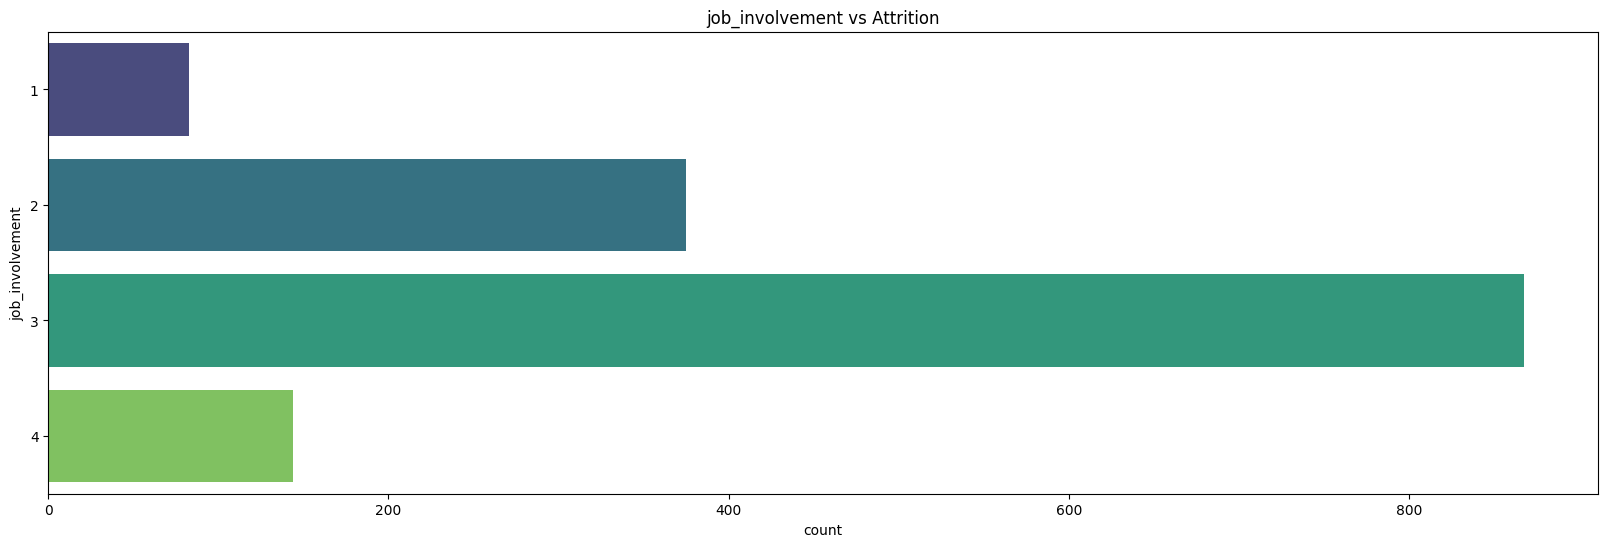

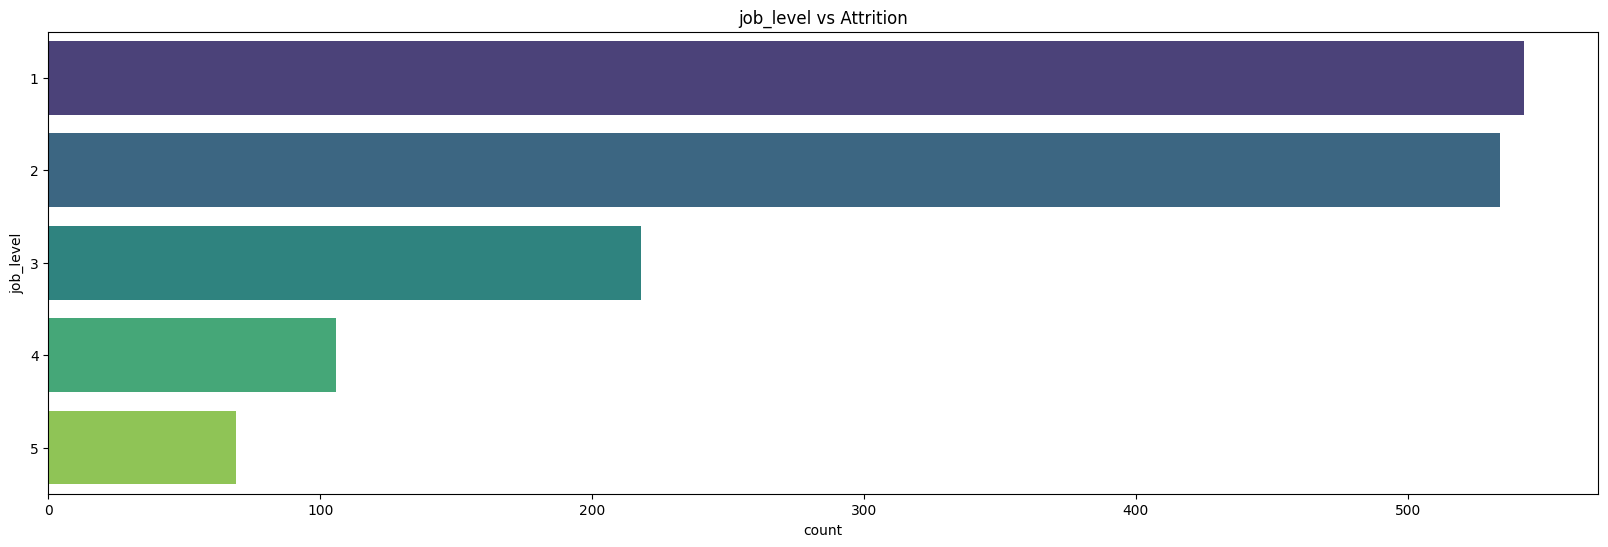

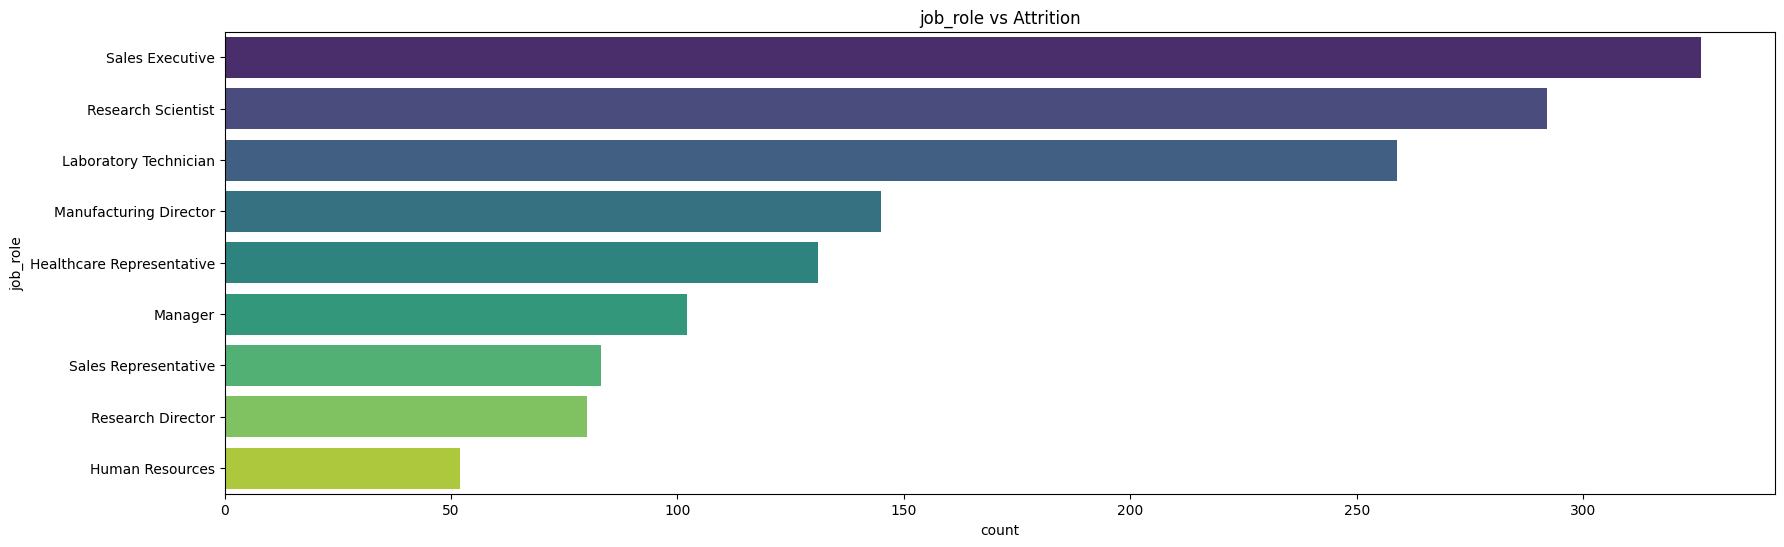

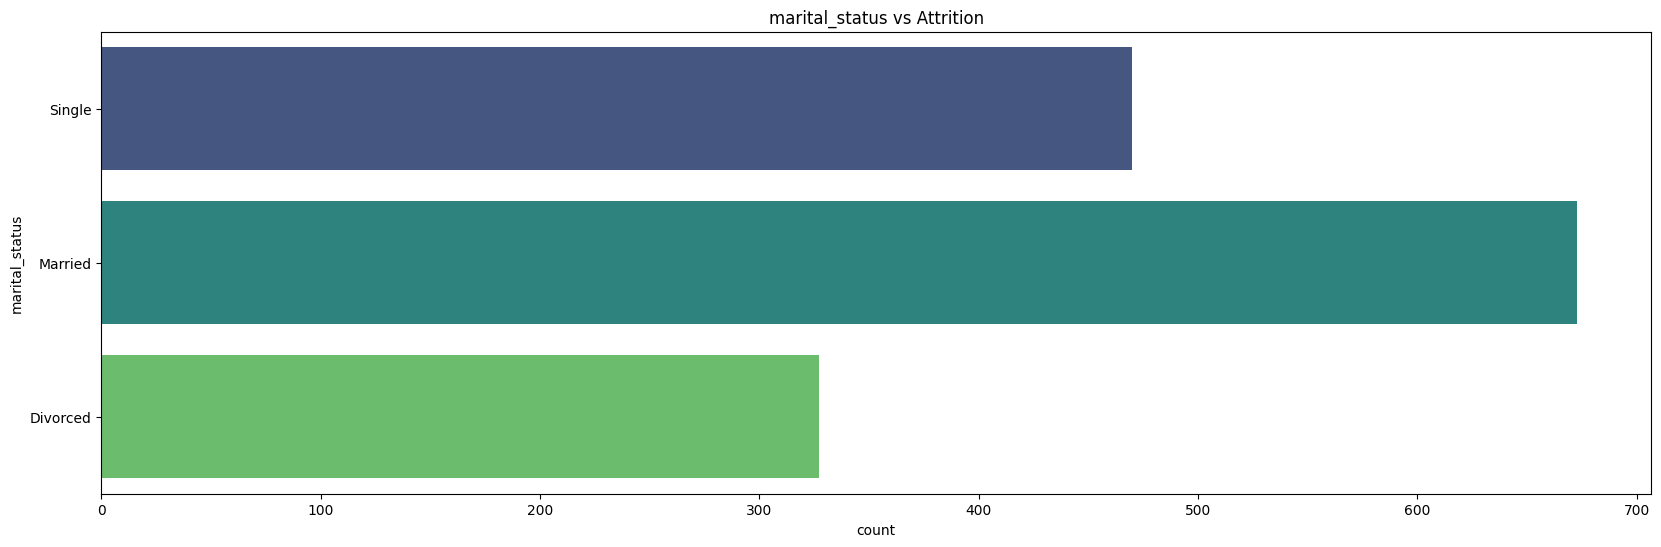

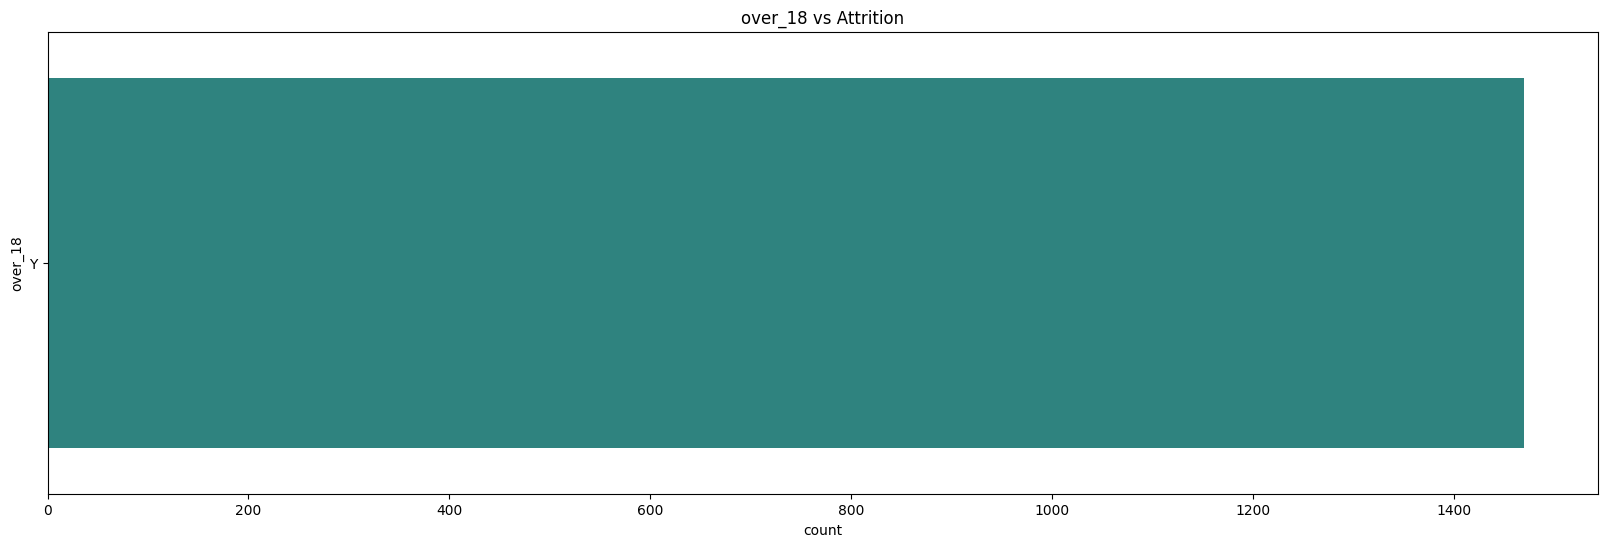

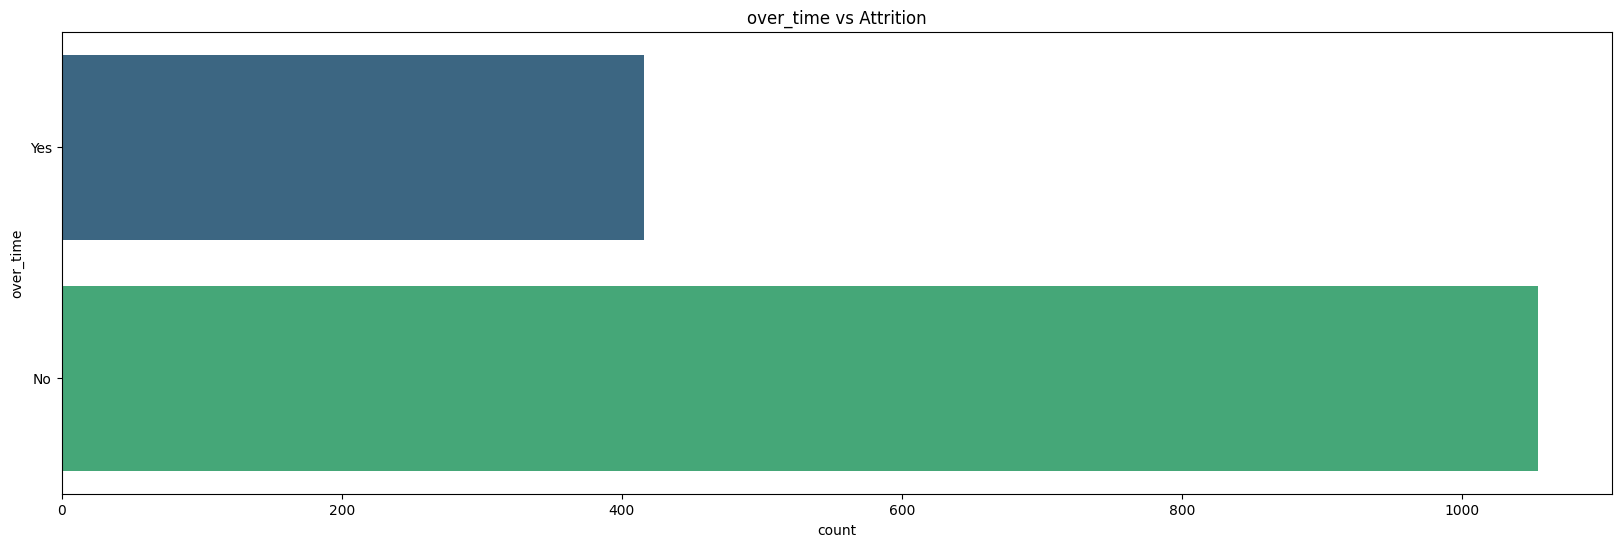

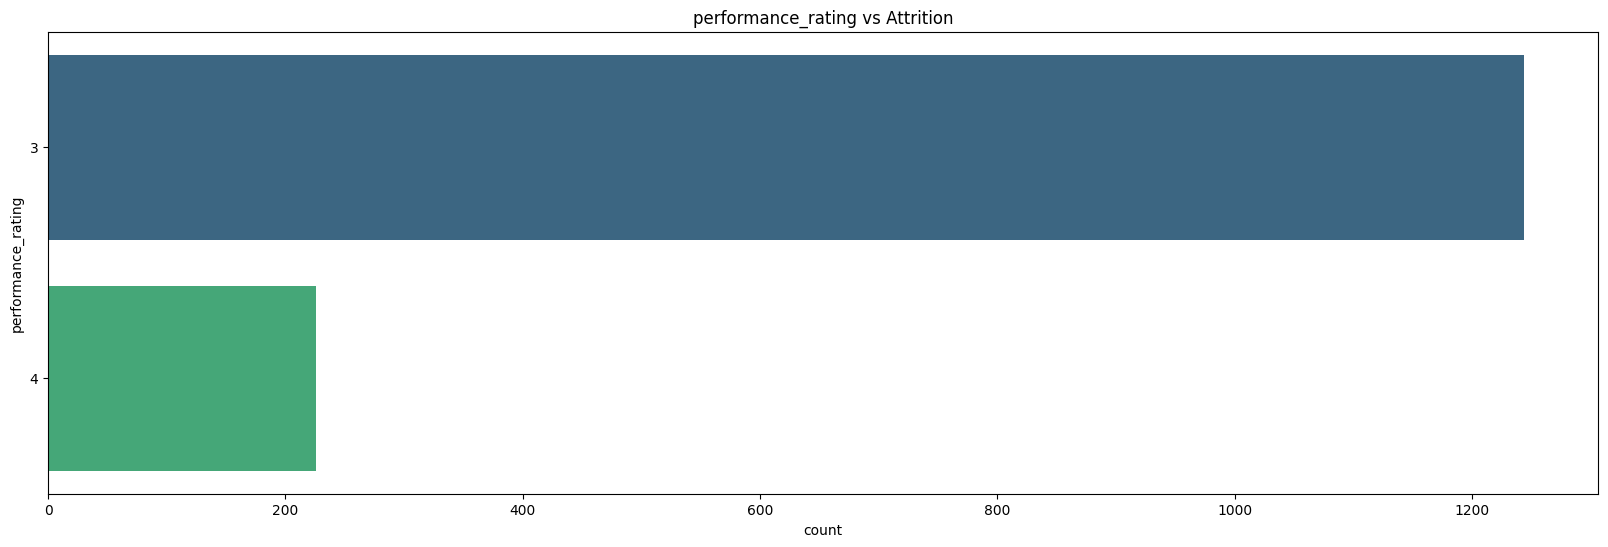

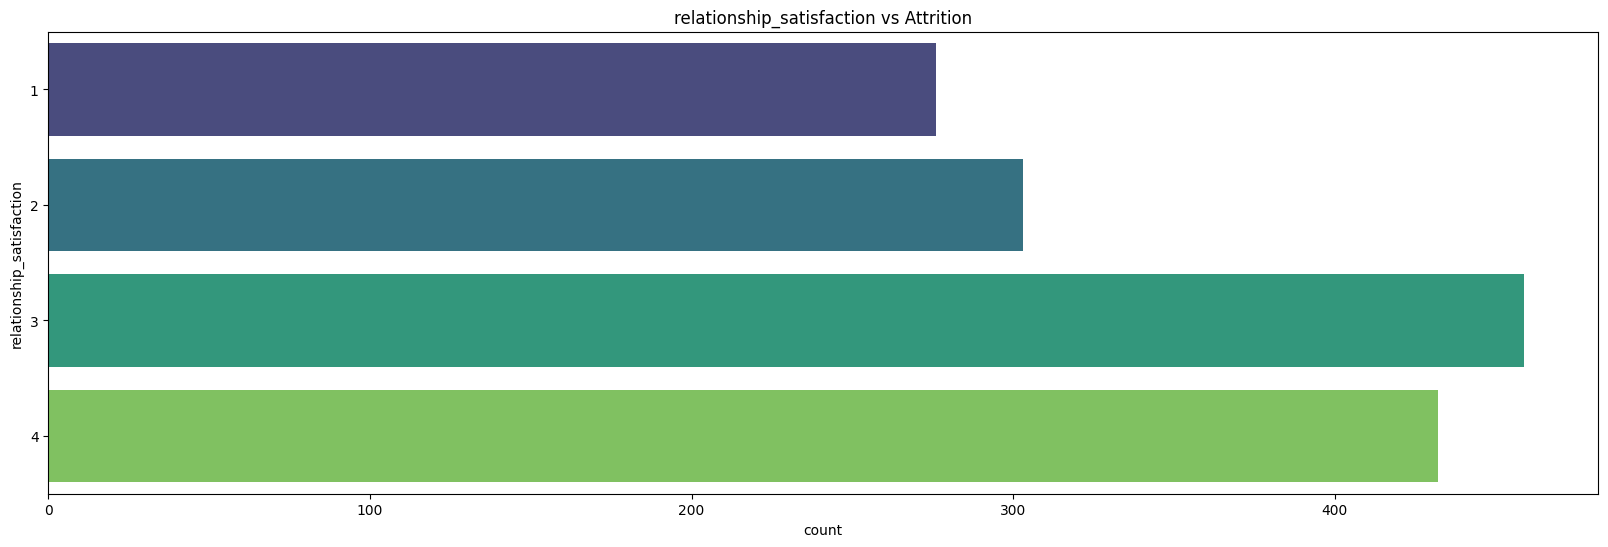

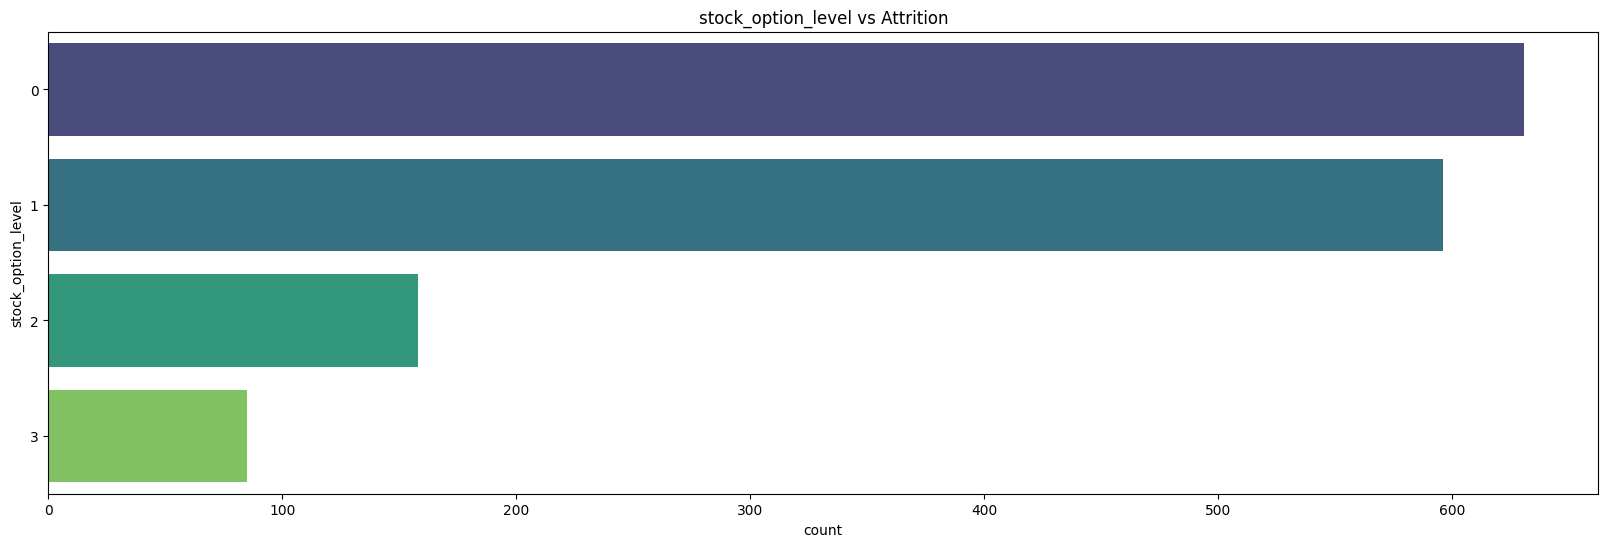

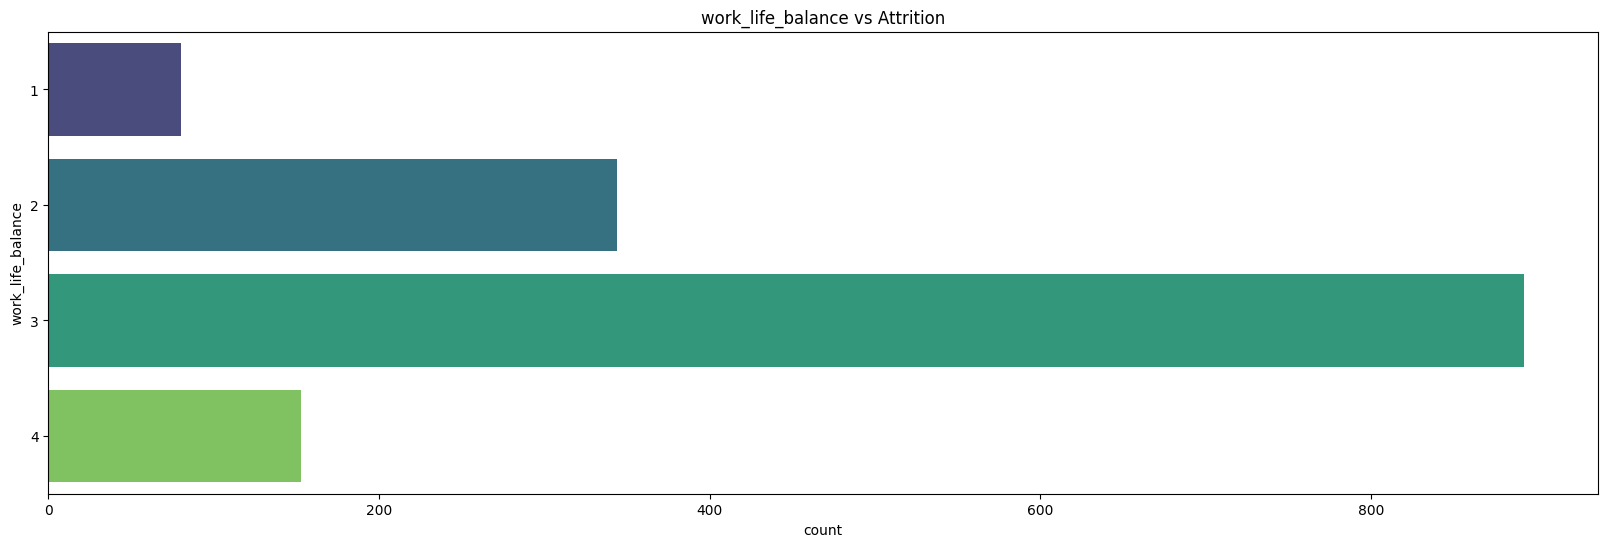

In [35]:
for c in category1:
    bivariate_analysis(data, c, 'Attrition')

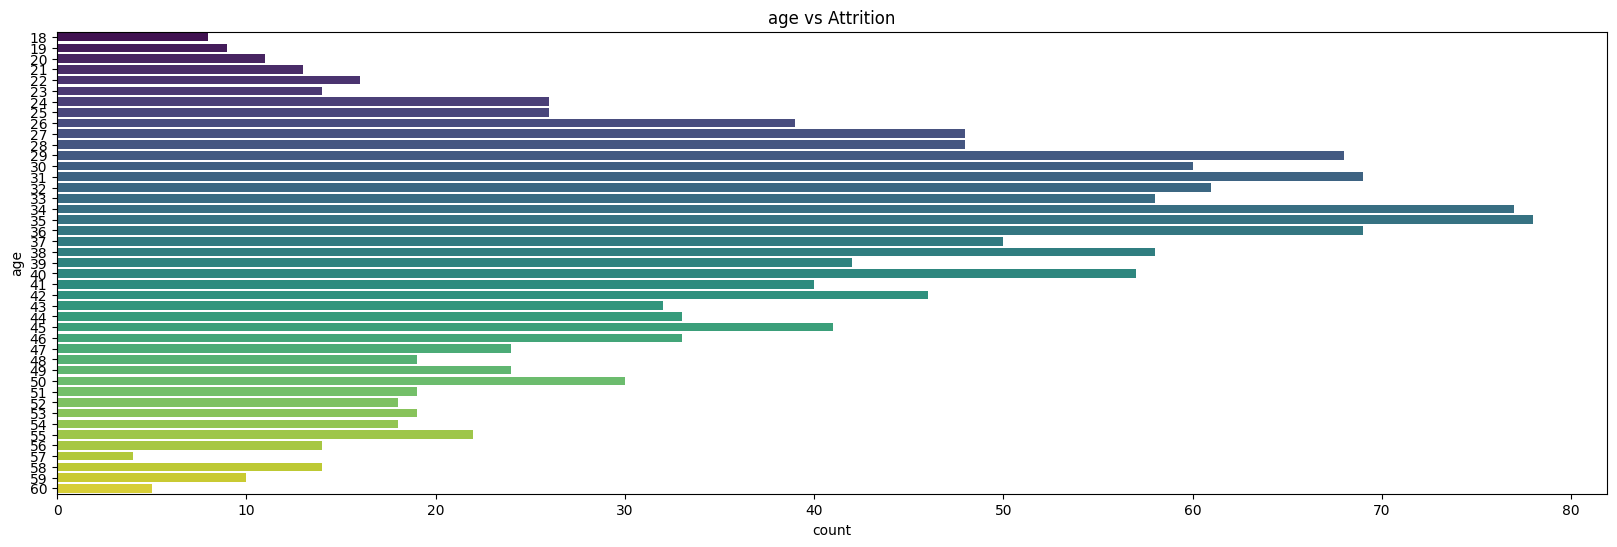

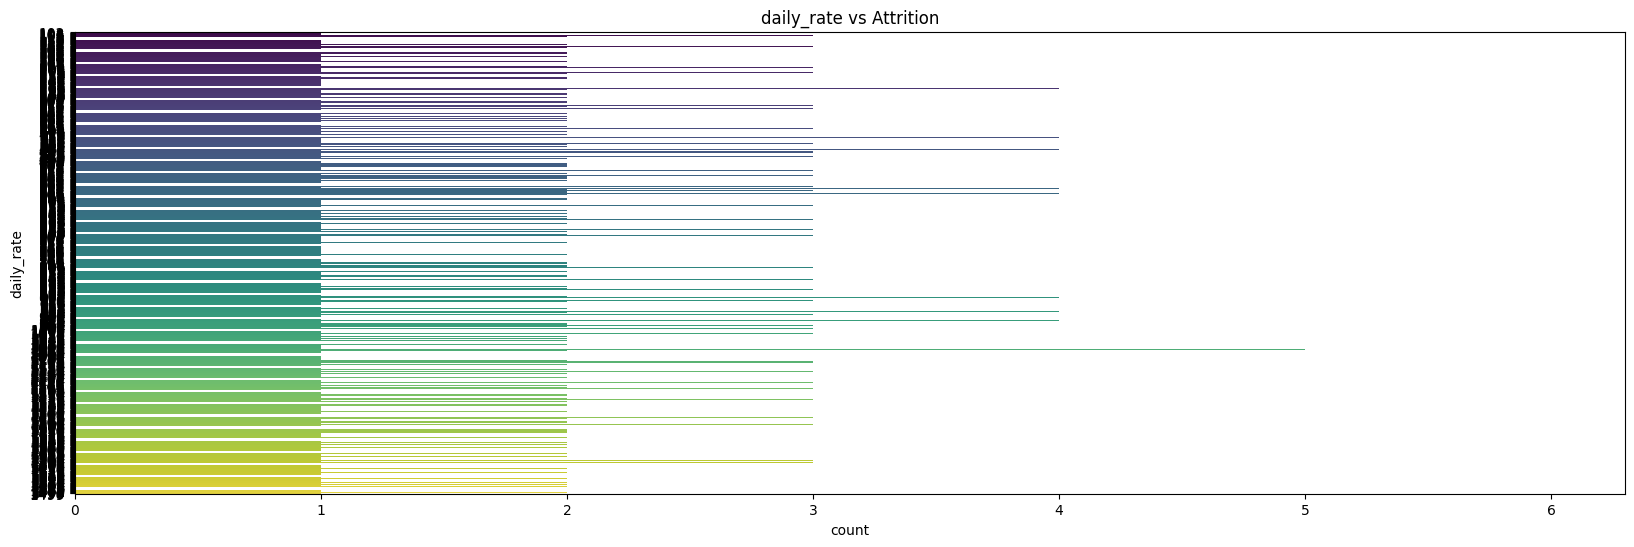

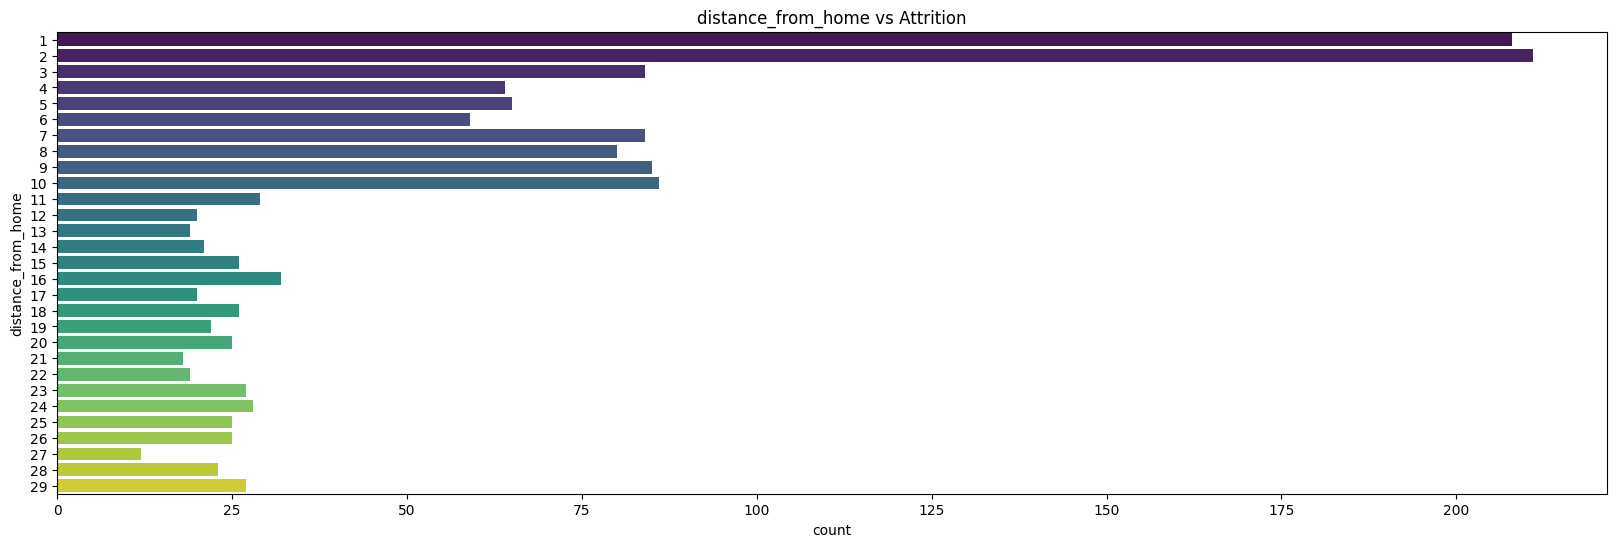

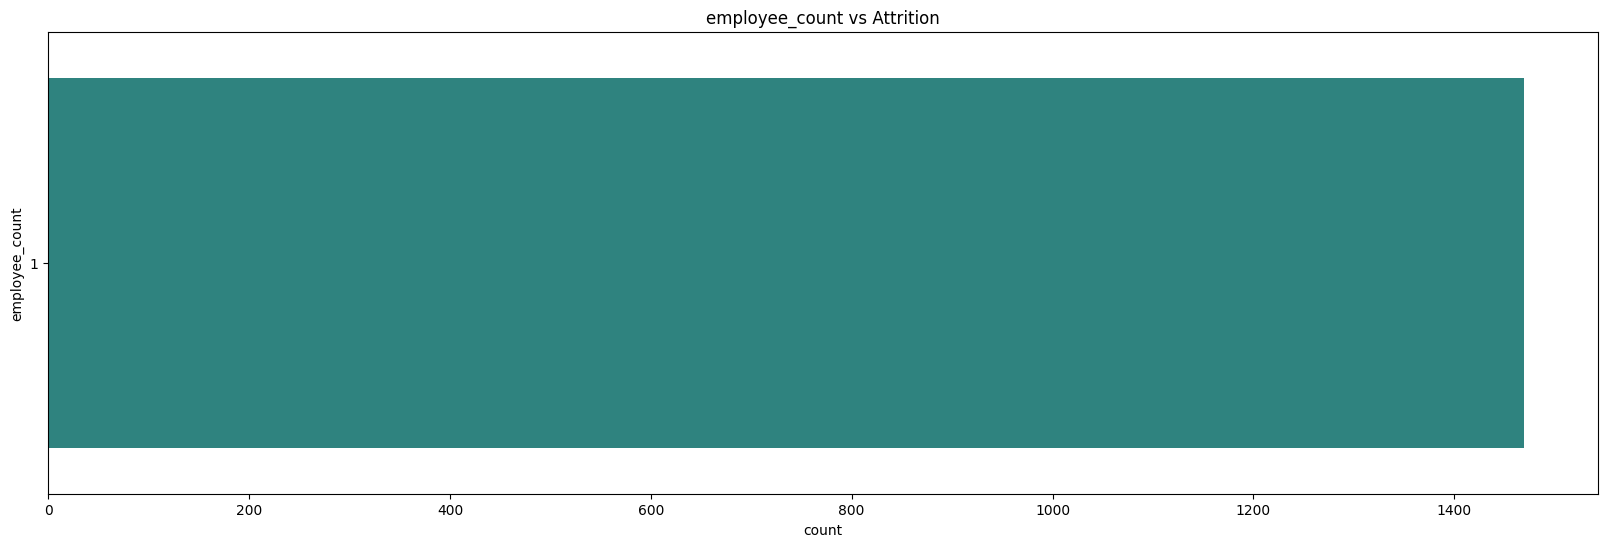

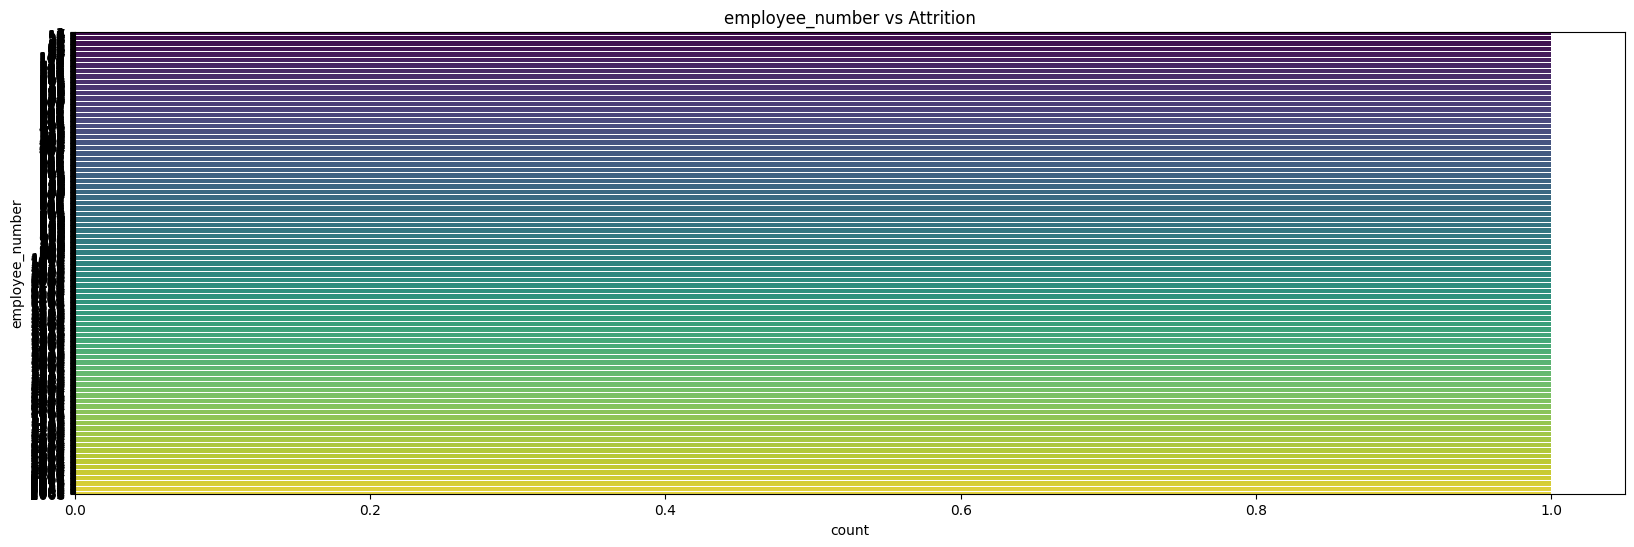

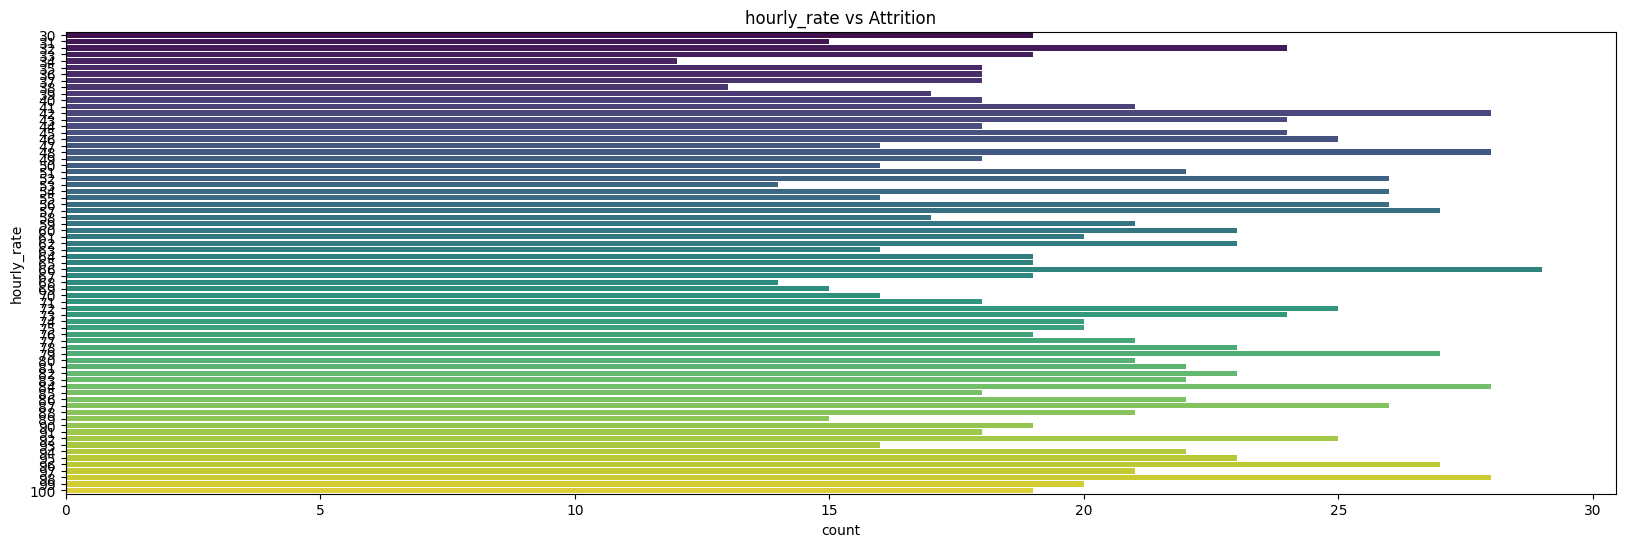

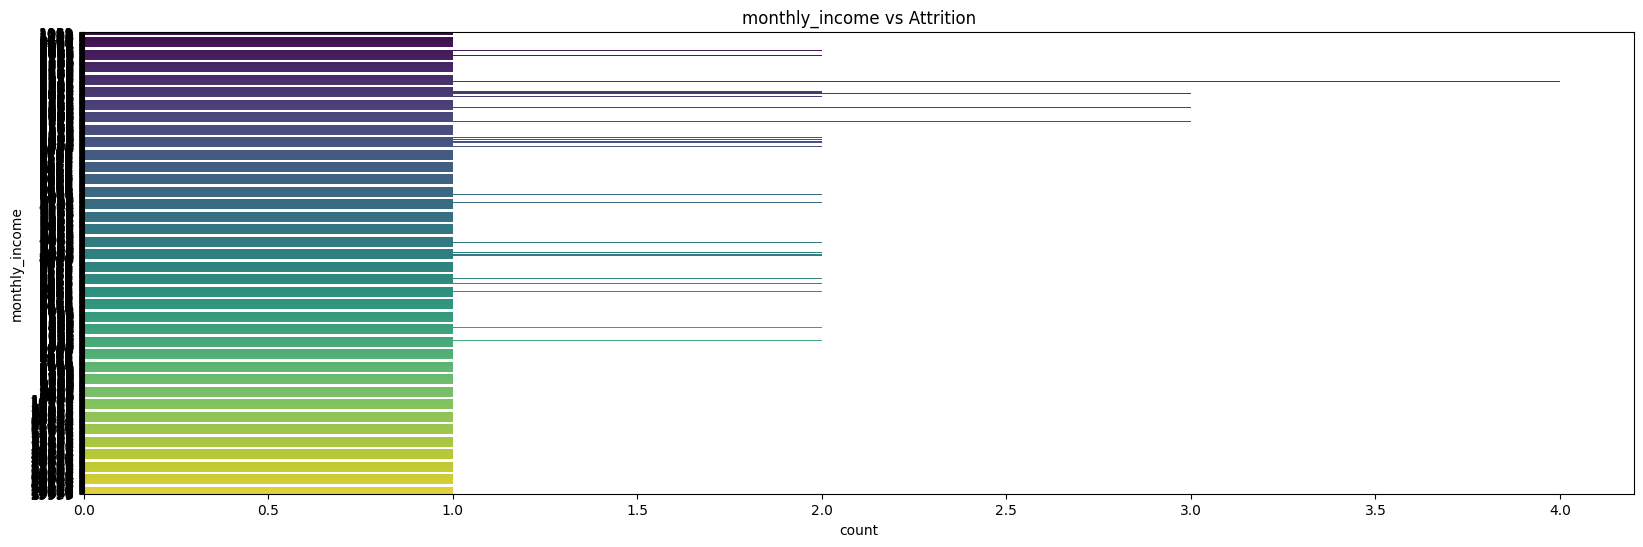

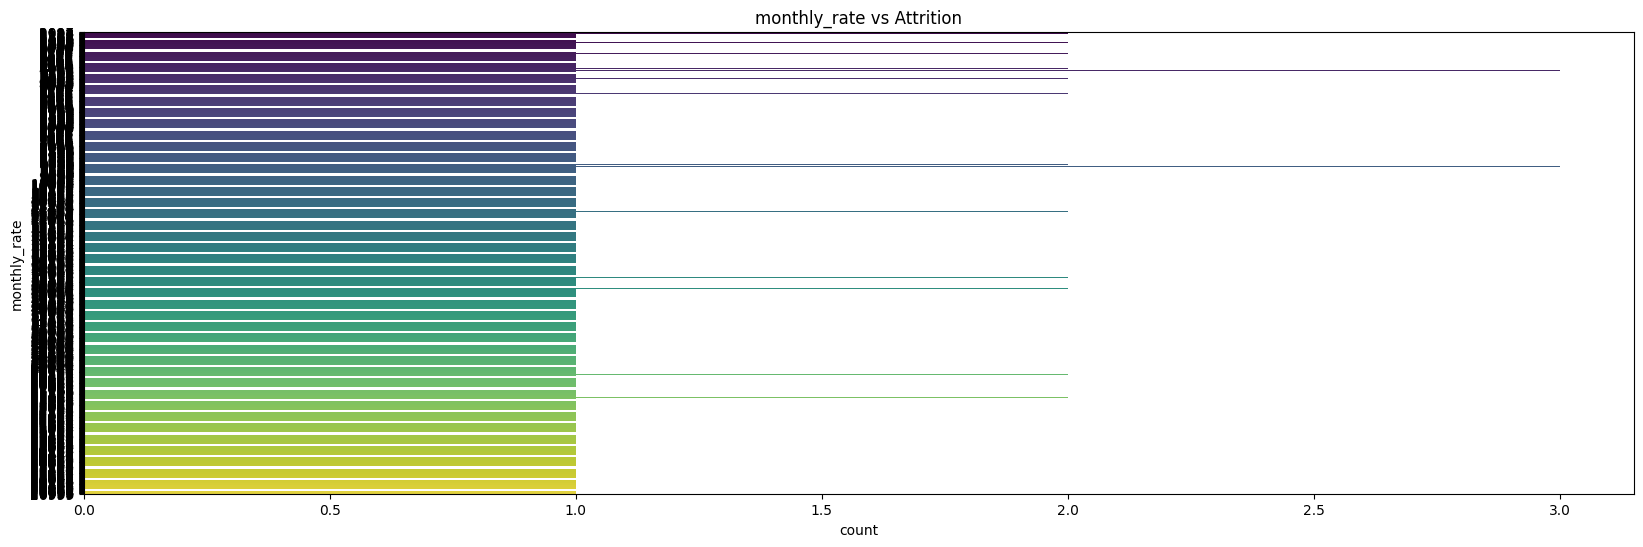

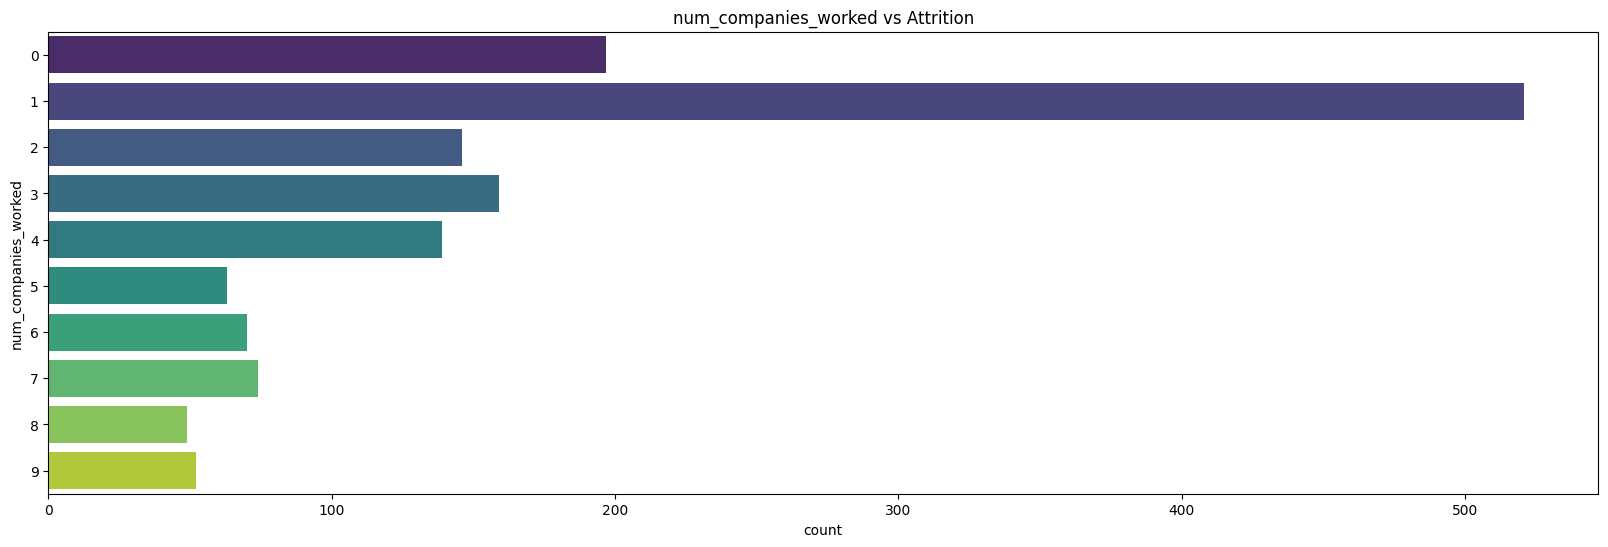

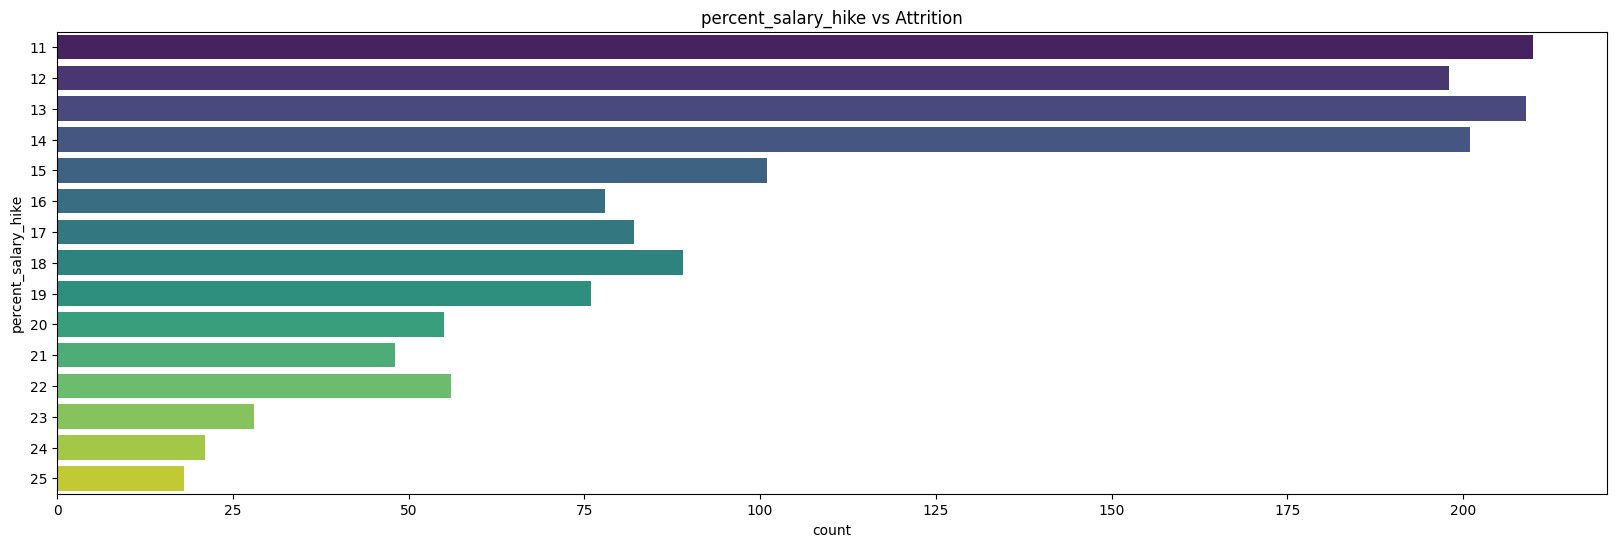

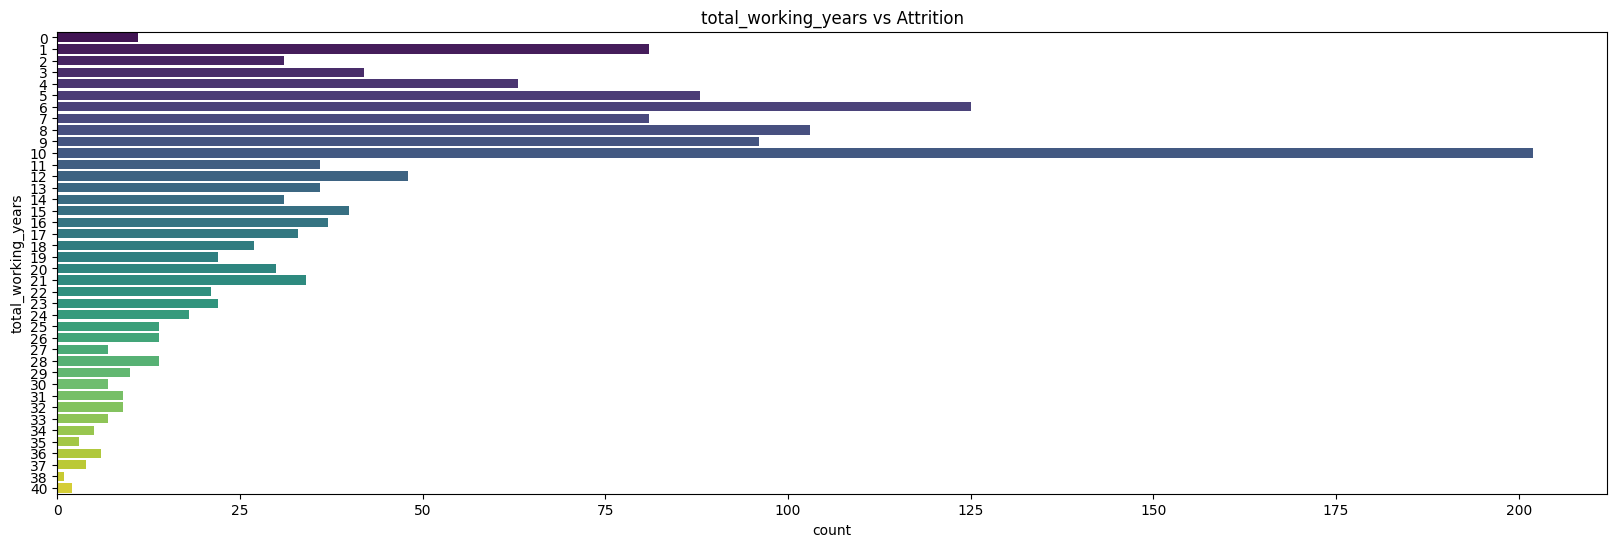

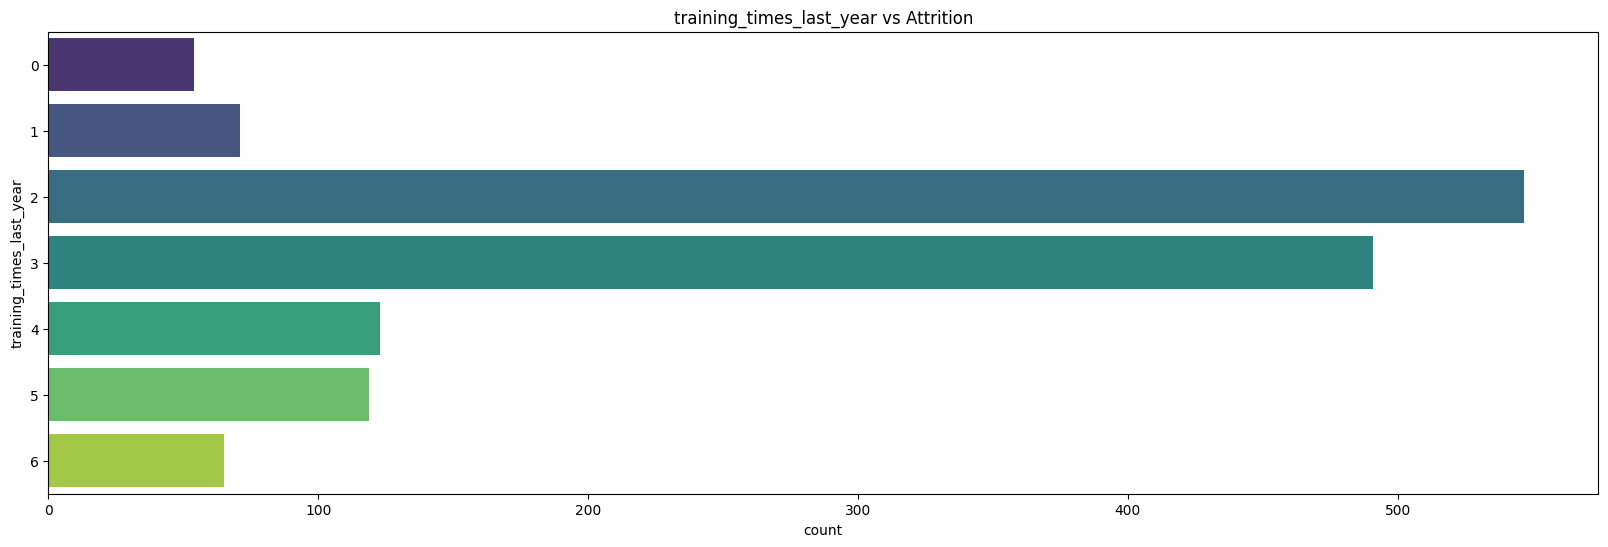

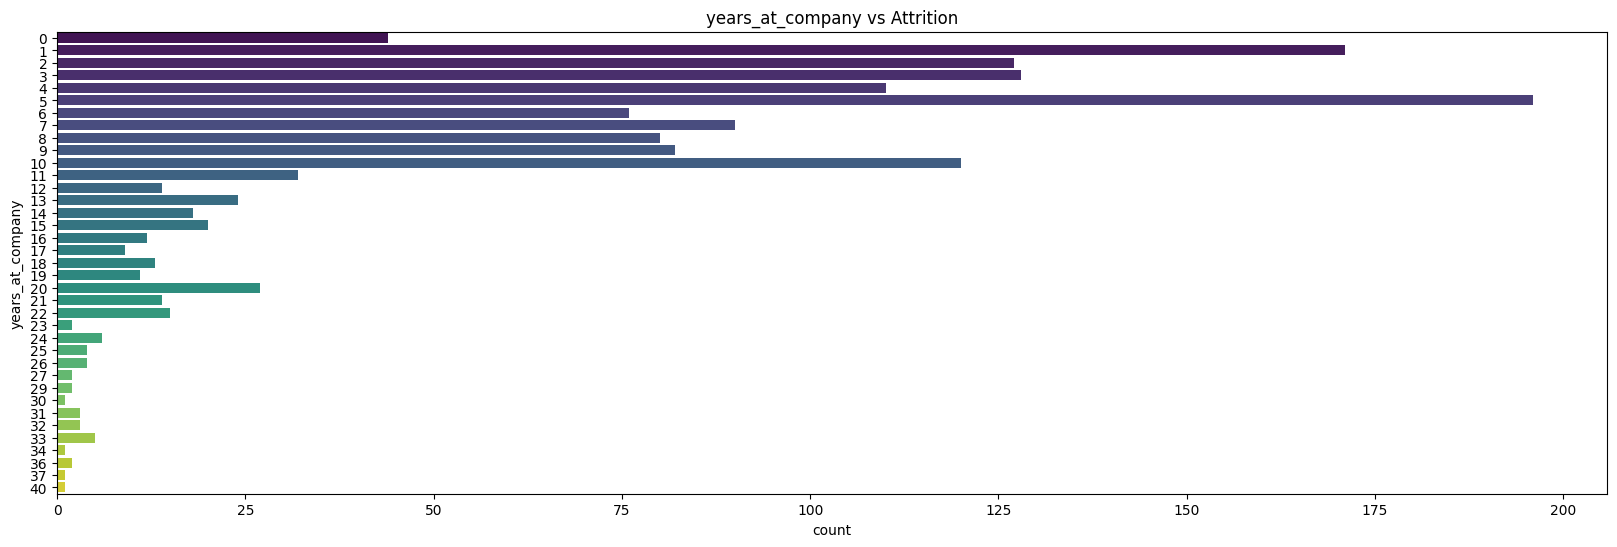

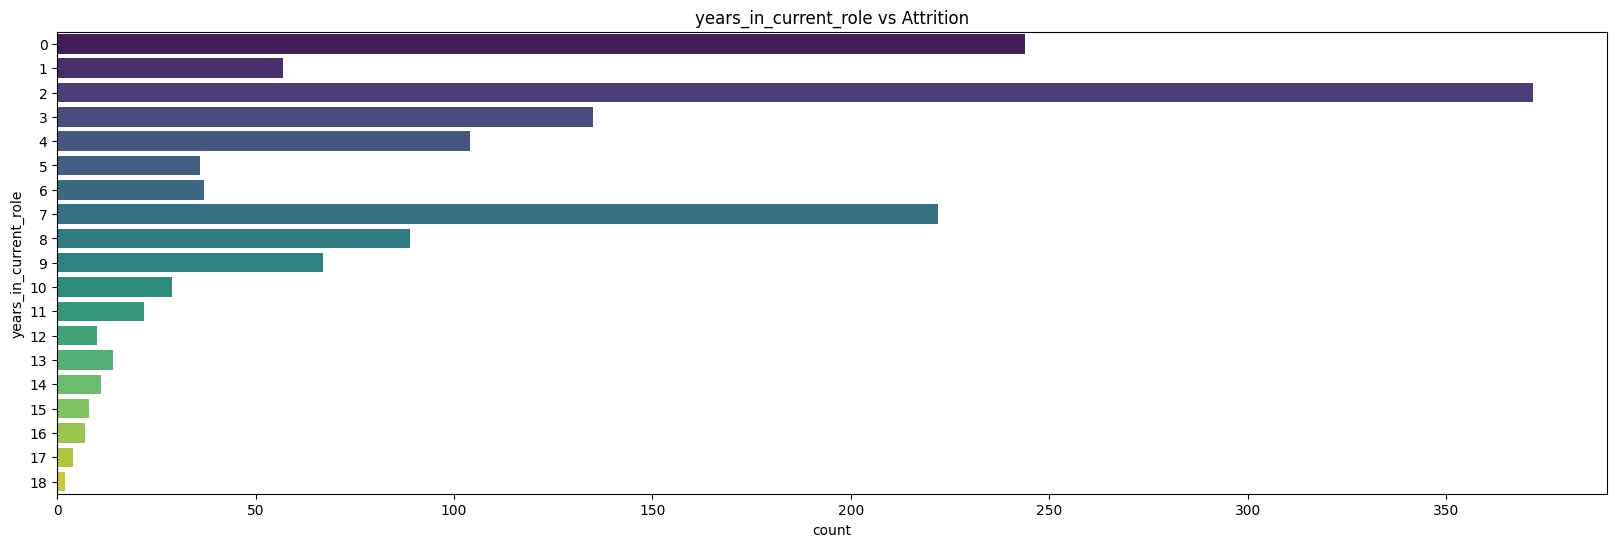

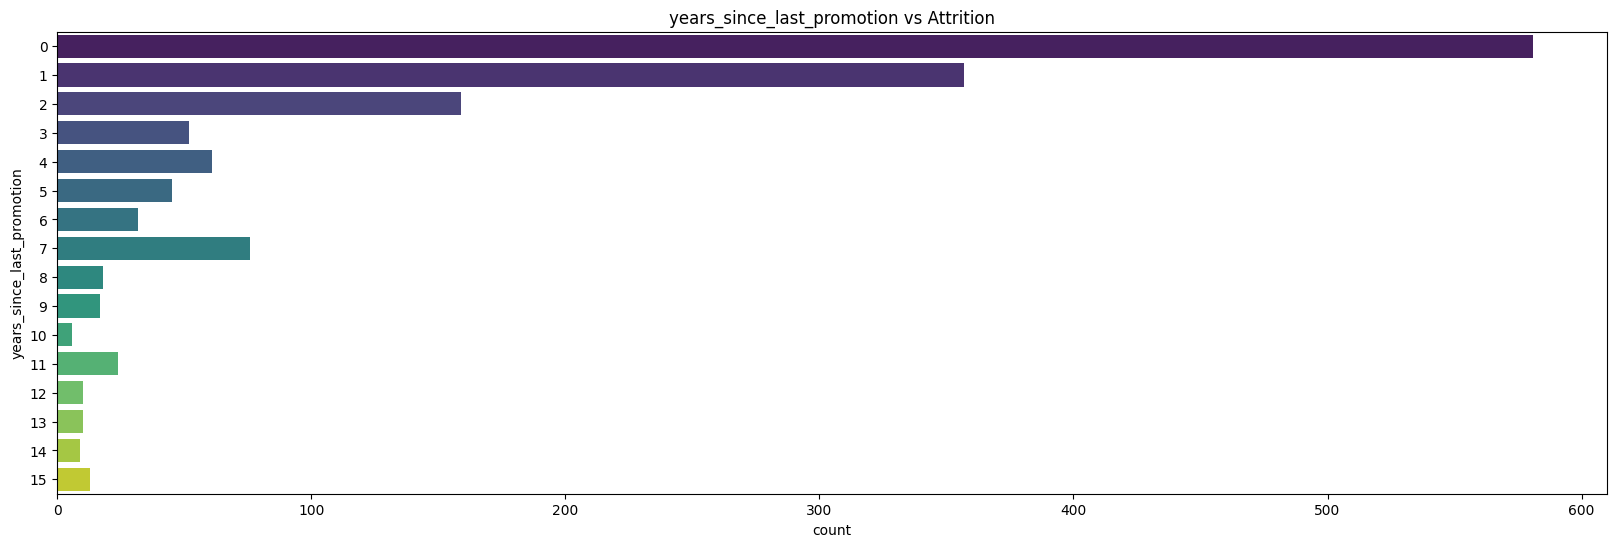

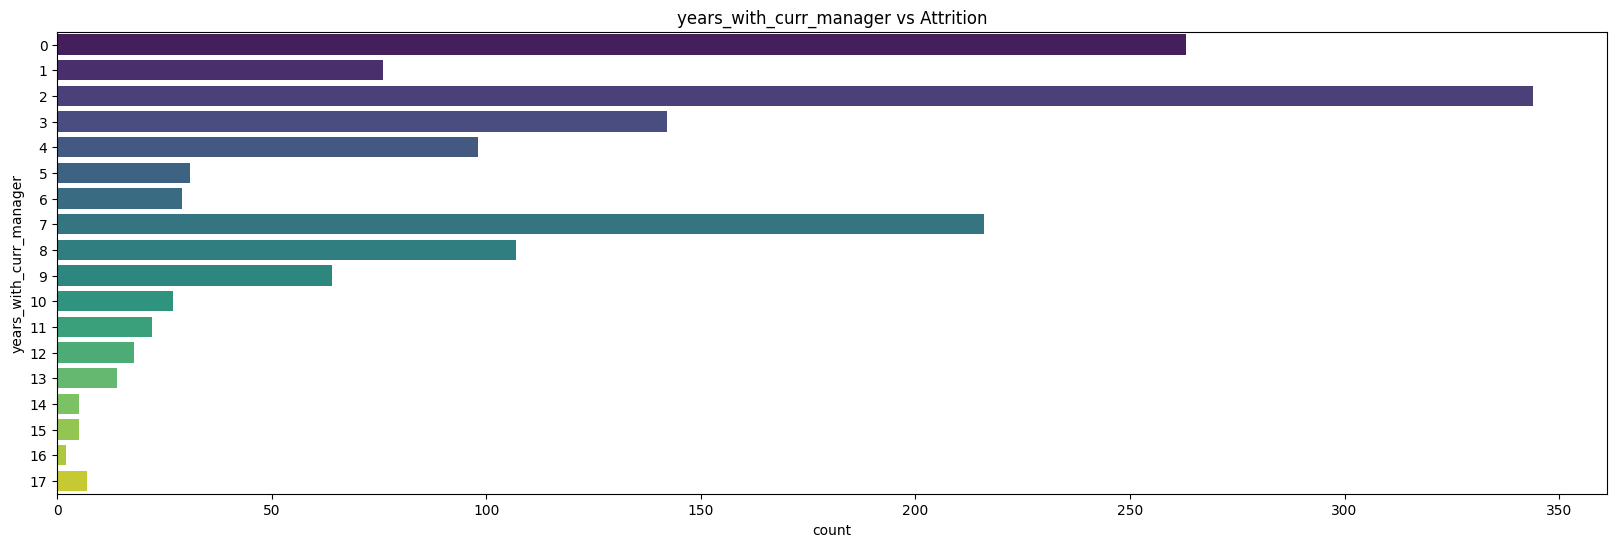

In [36]:
for c in numericVar:
    bivariate_analysis(data, c, 'Attrition')

# Multi-variate Analysis

In [39]:
def multivariate_analysis(data, x, y, hue):
    plt.figure(figsize=(30, 6))
    sns.countplot(data=data, y = x, hue=hue, palette='viridis')
    plt.title(f'{x} vs {y}')
    plt.show()

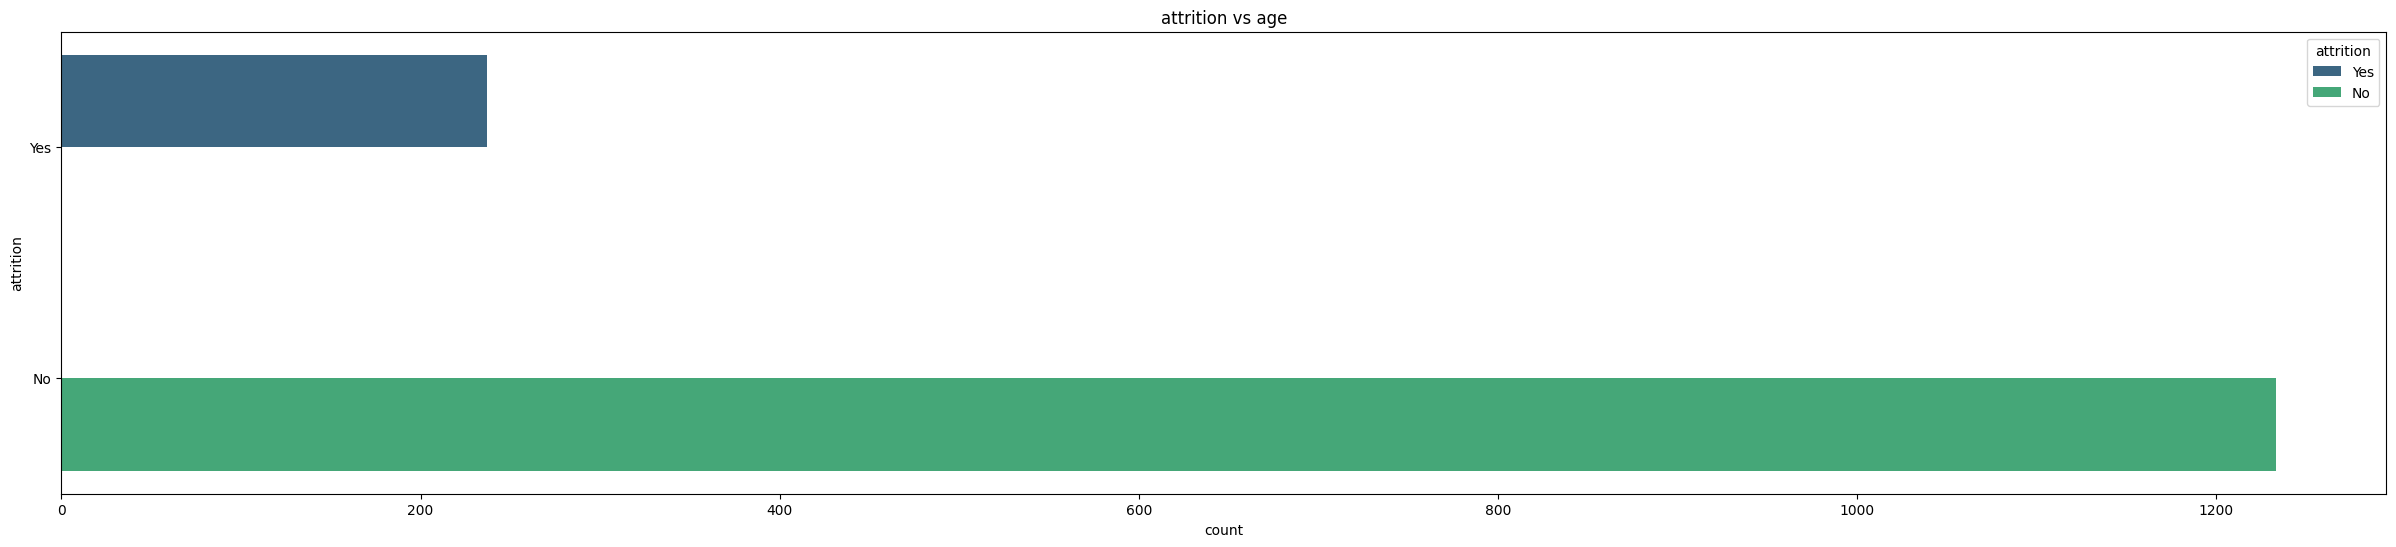

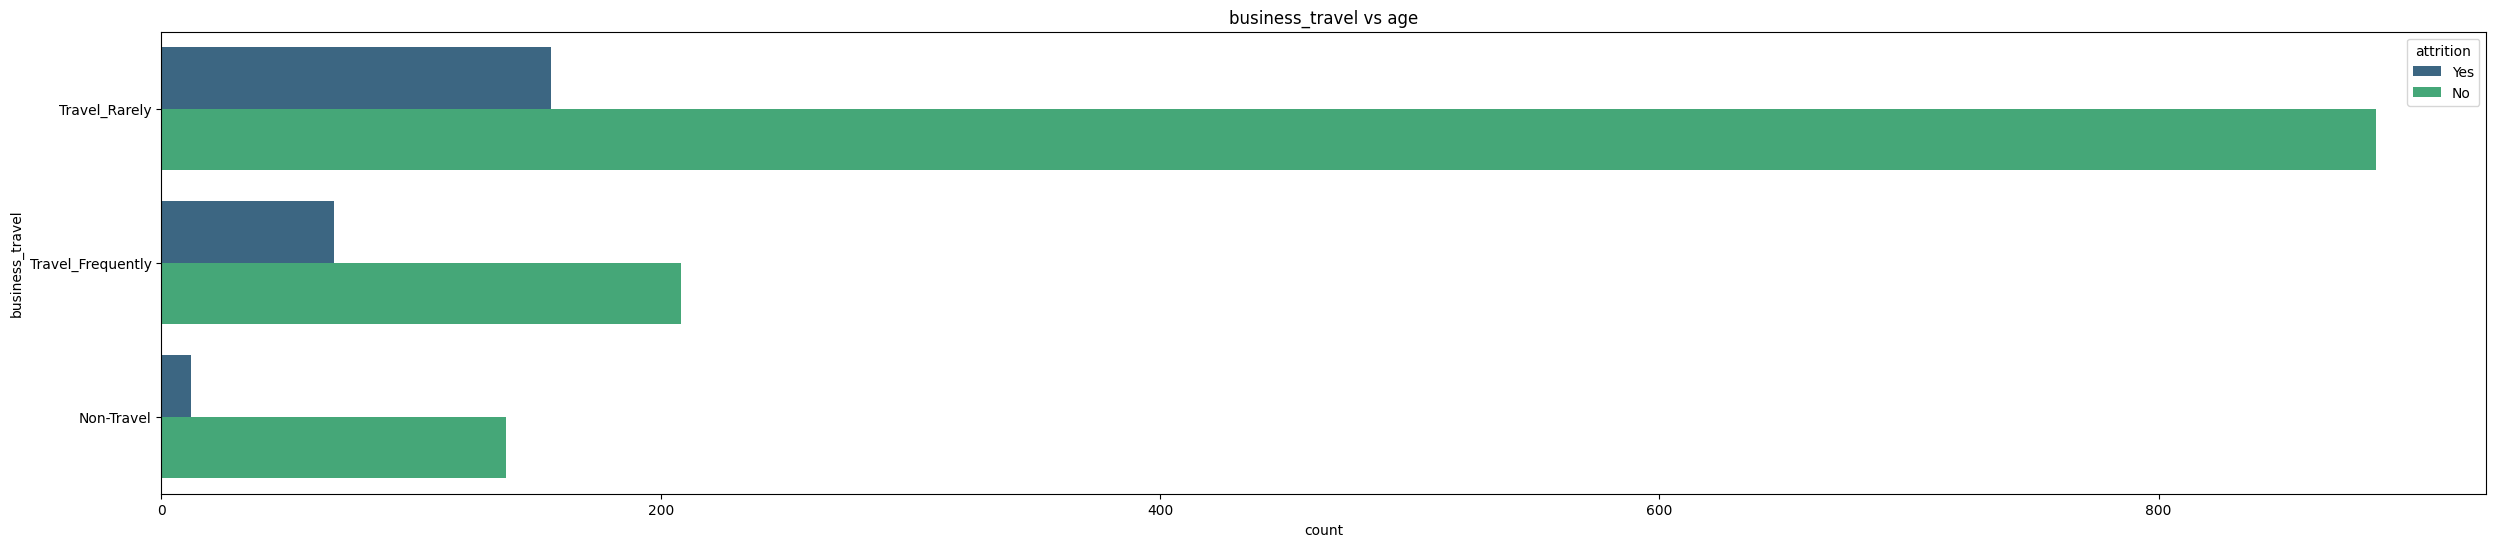

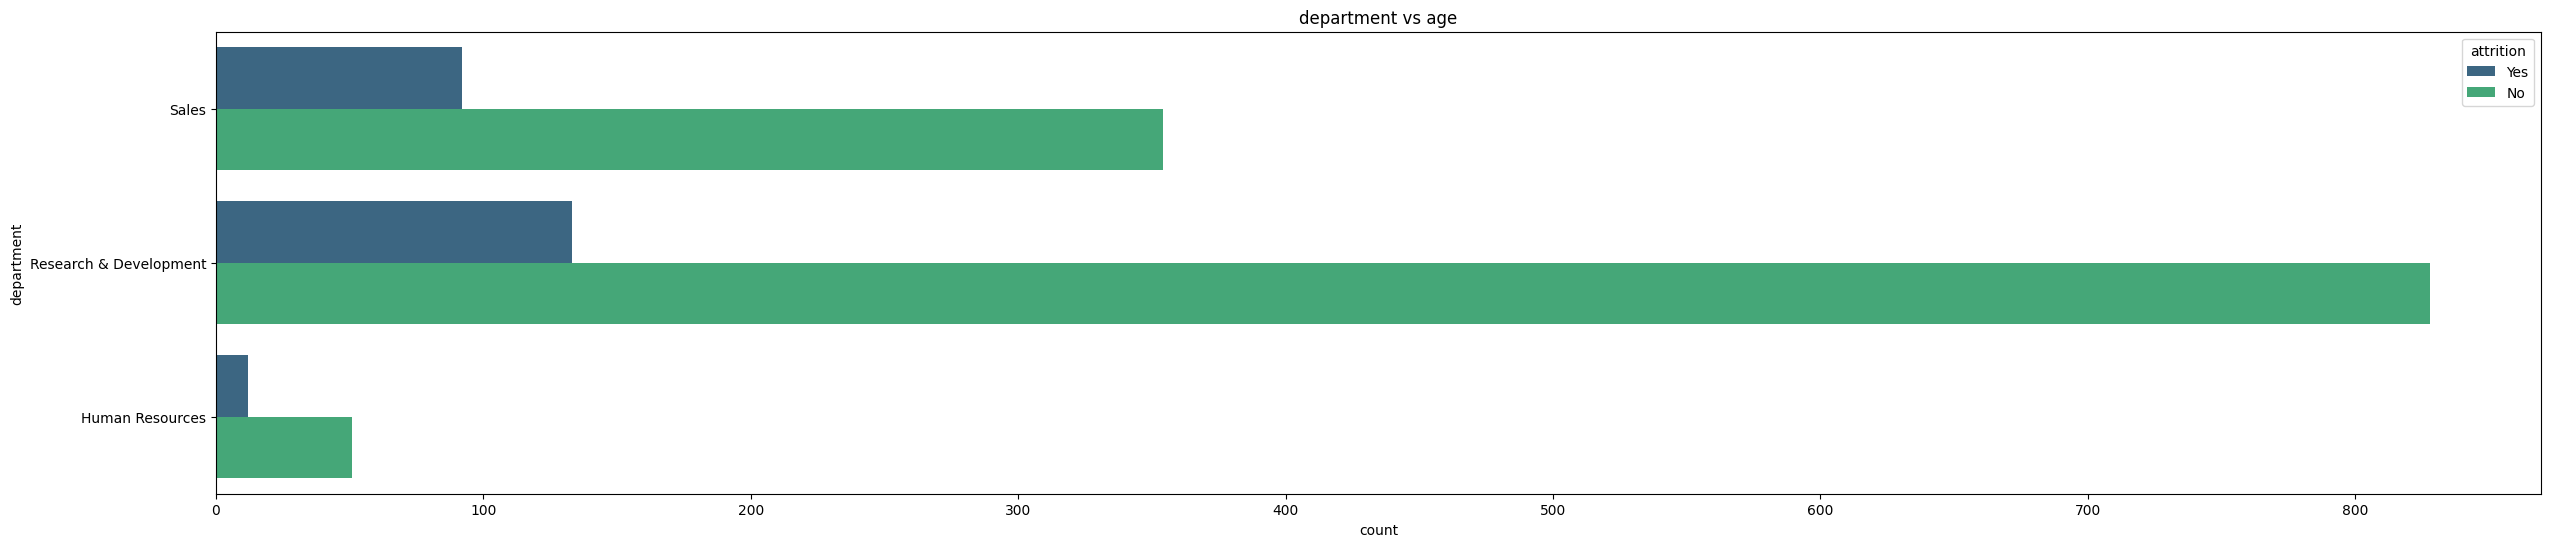

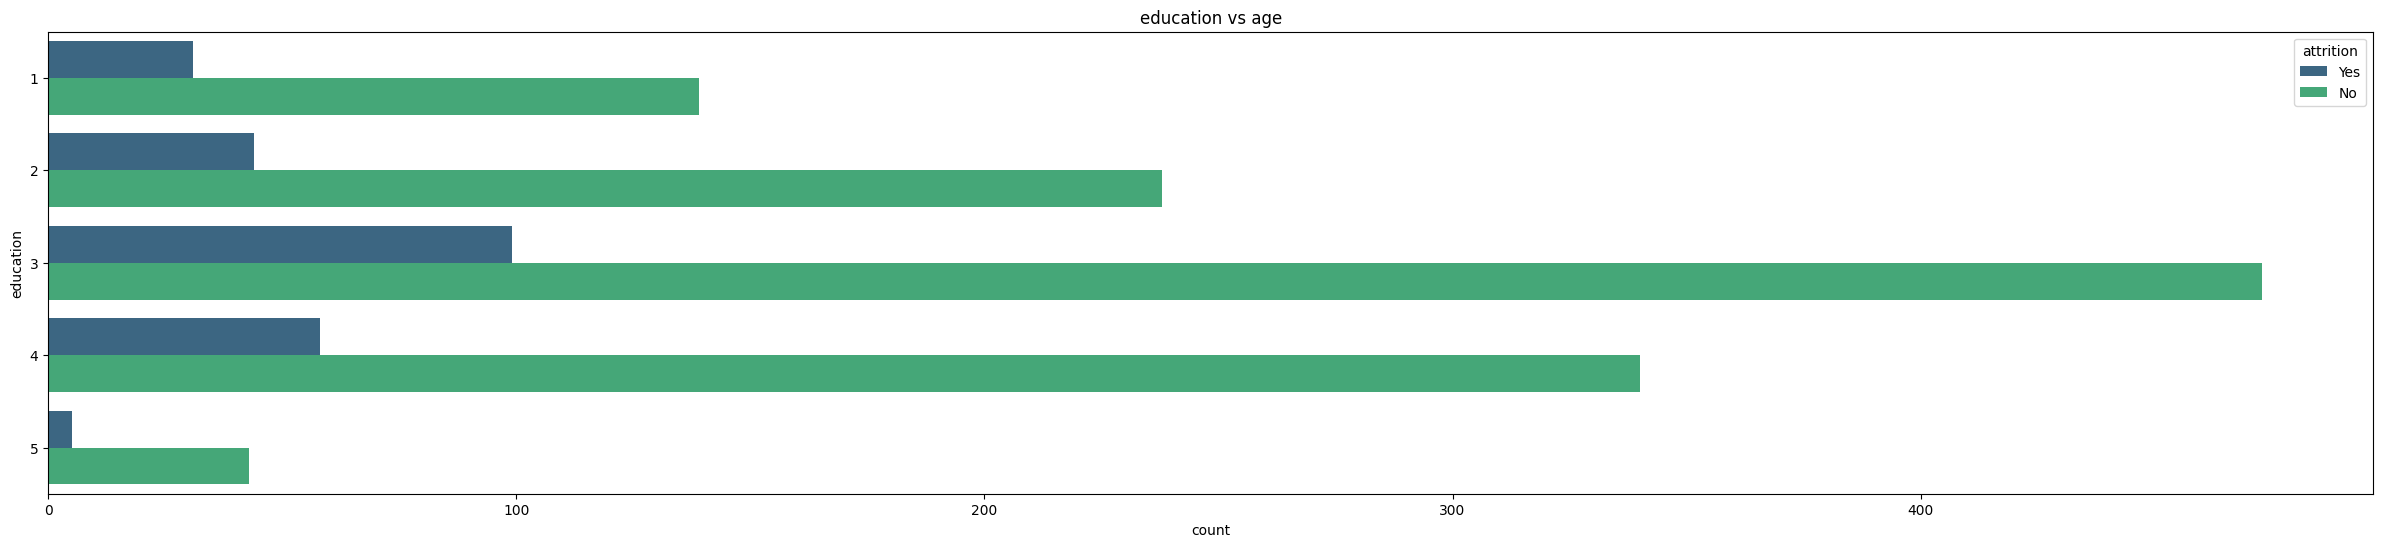

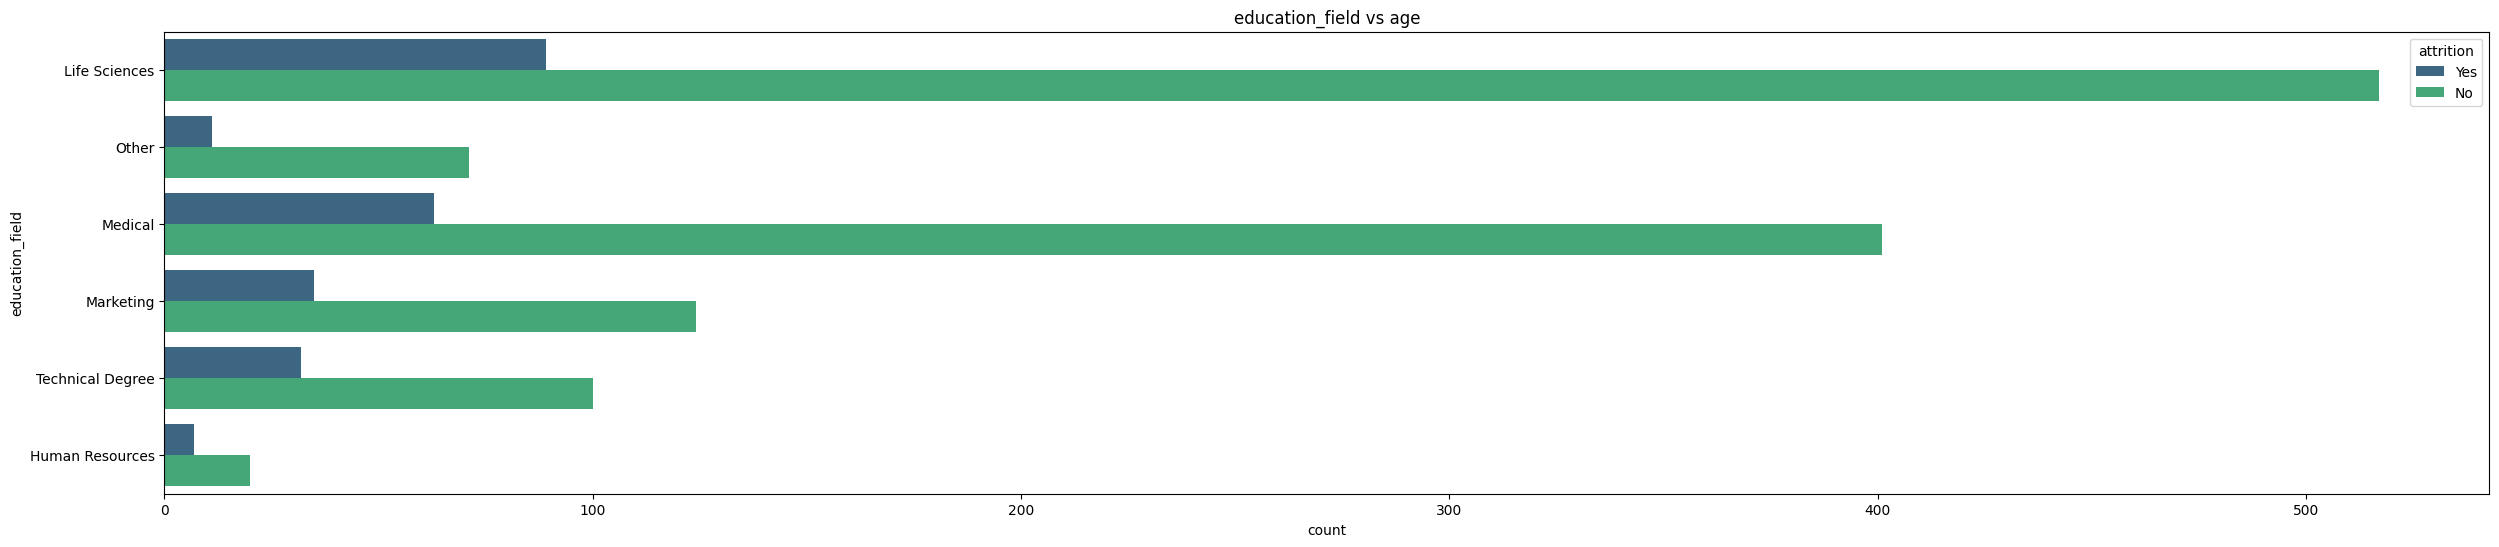

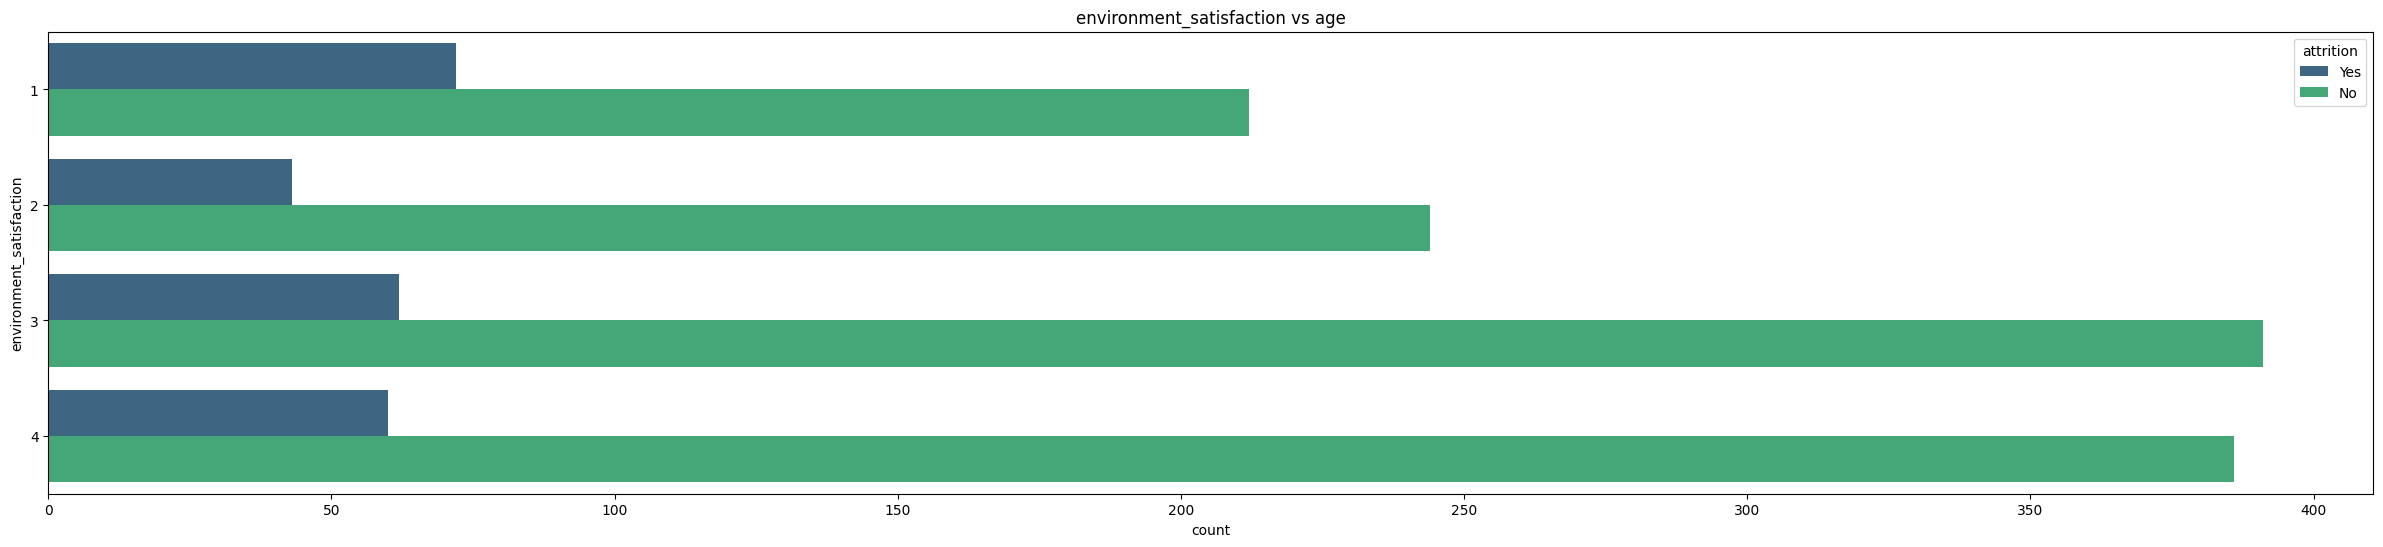

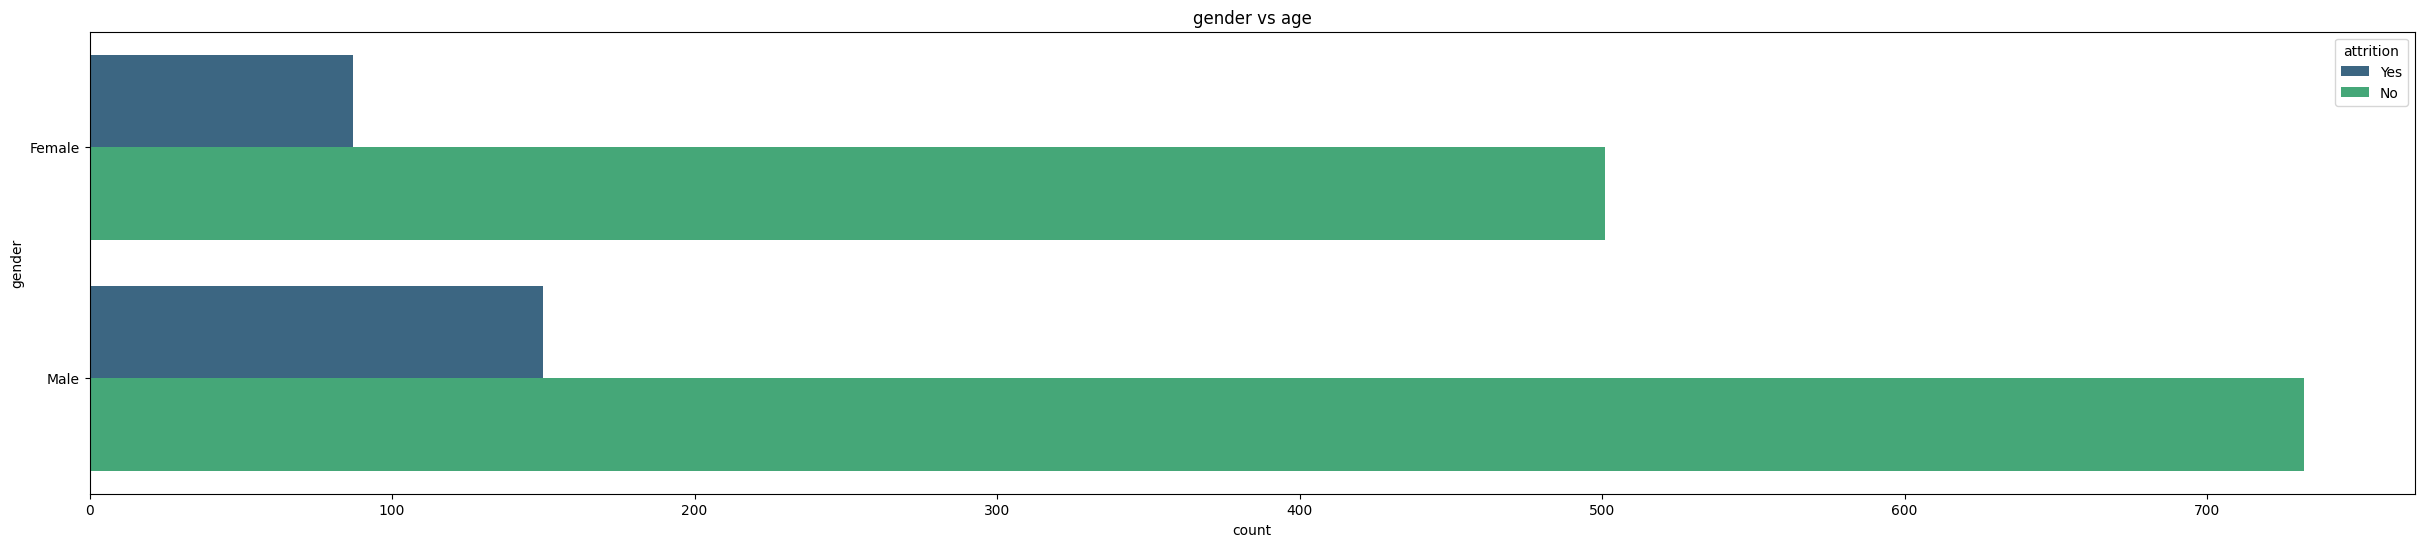

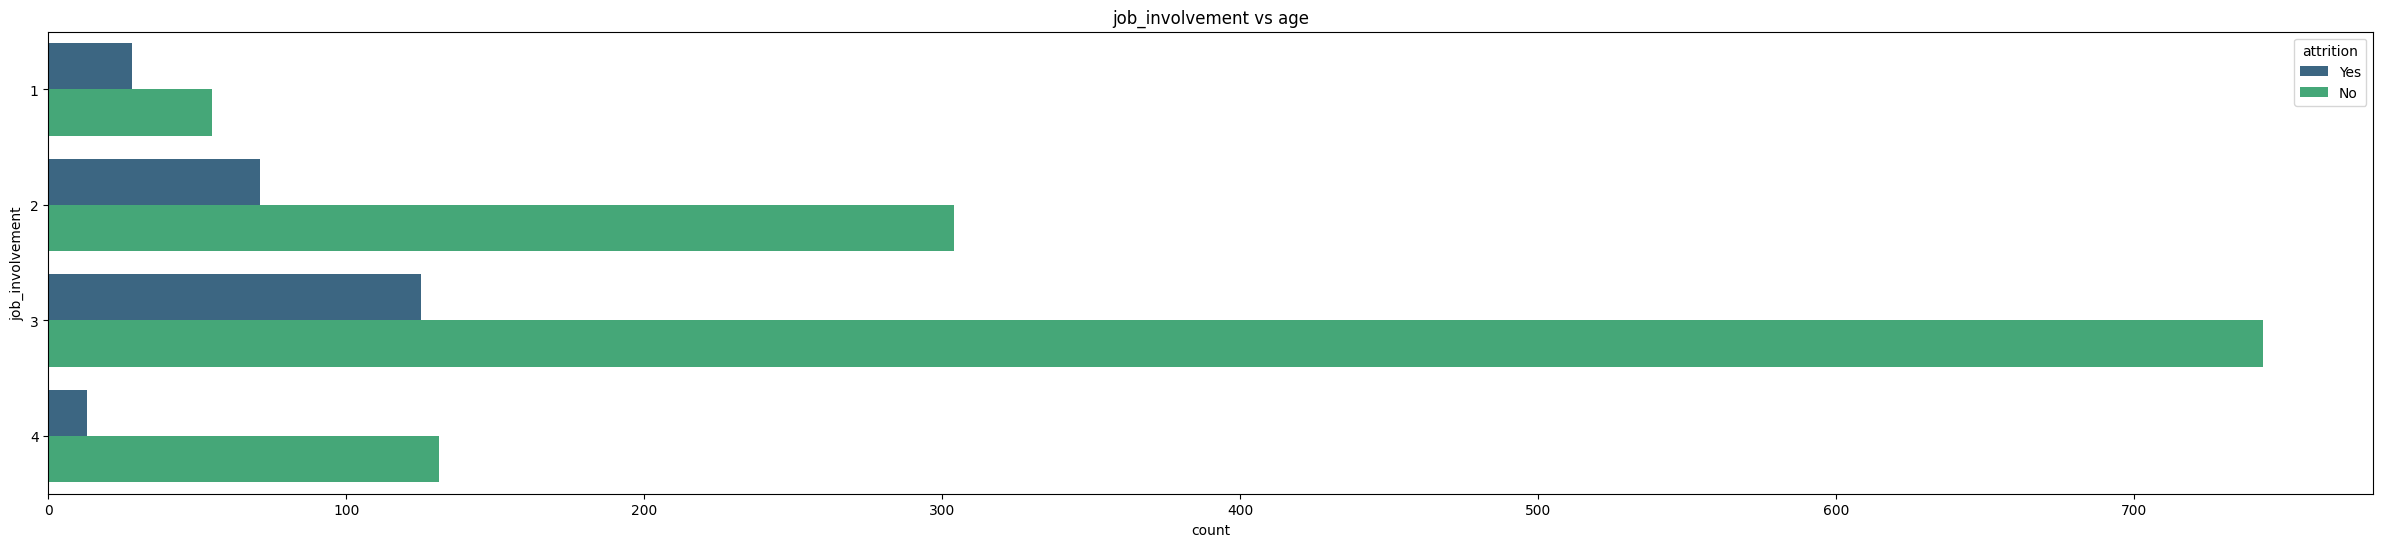

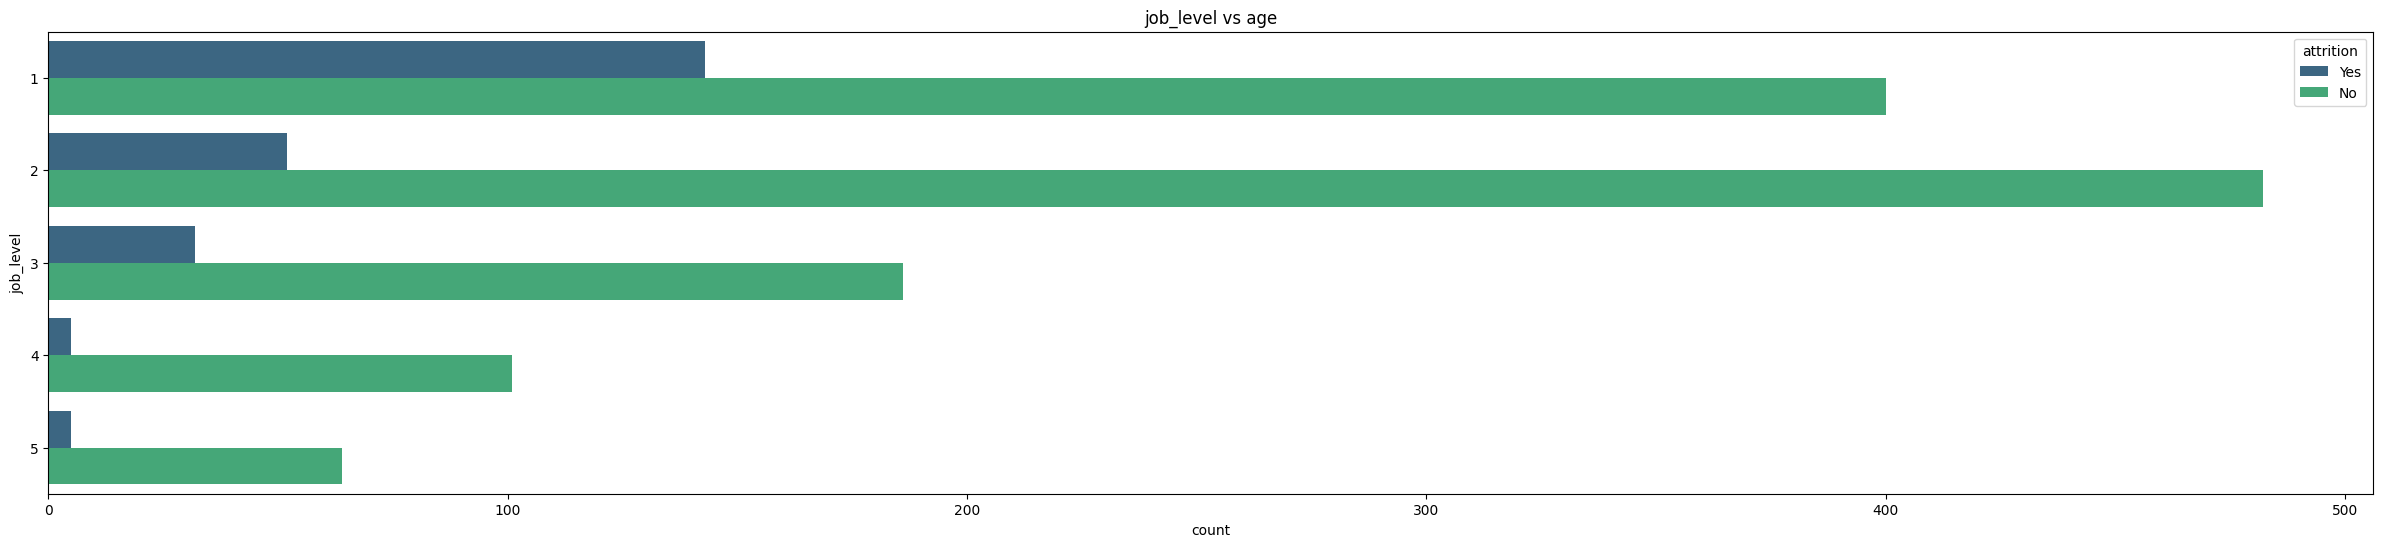

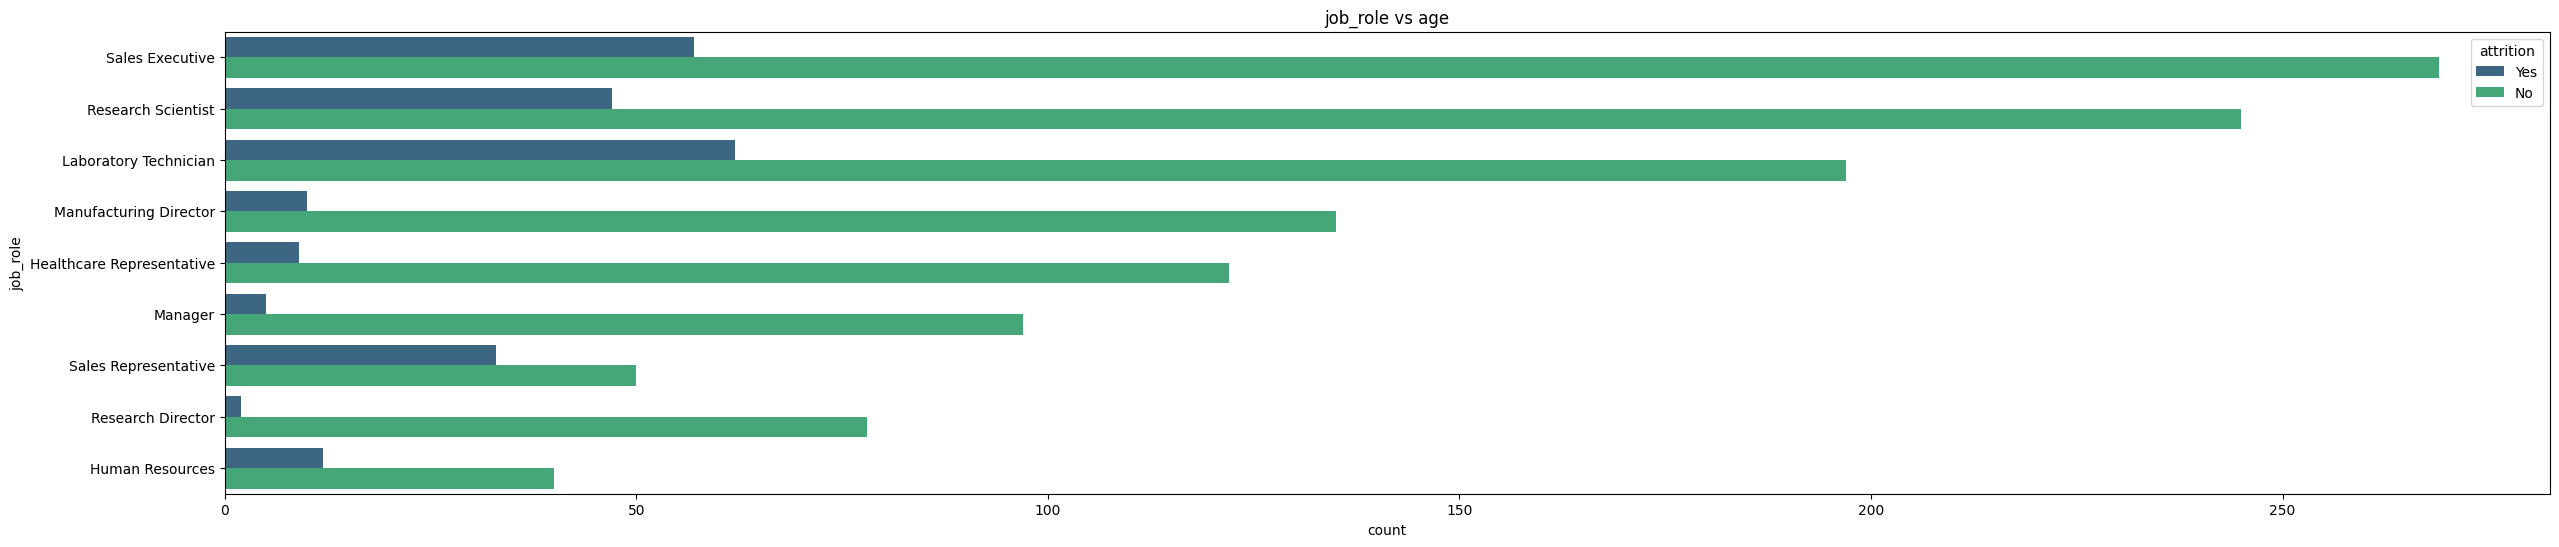

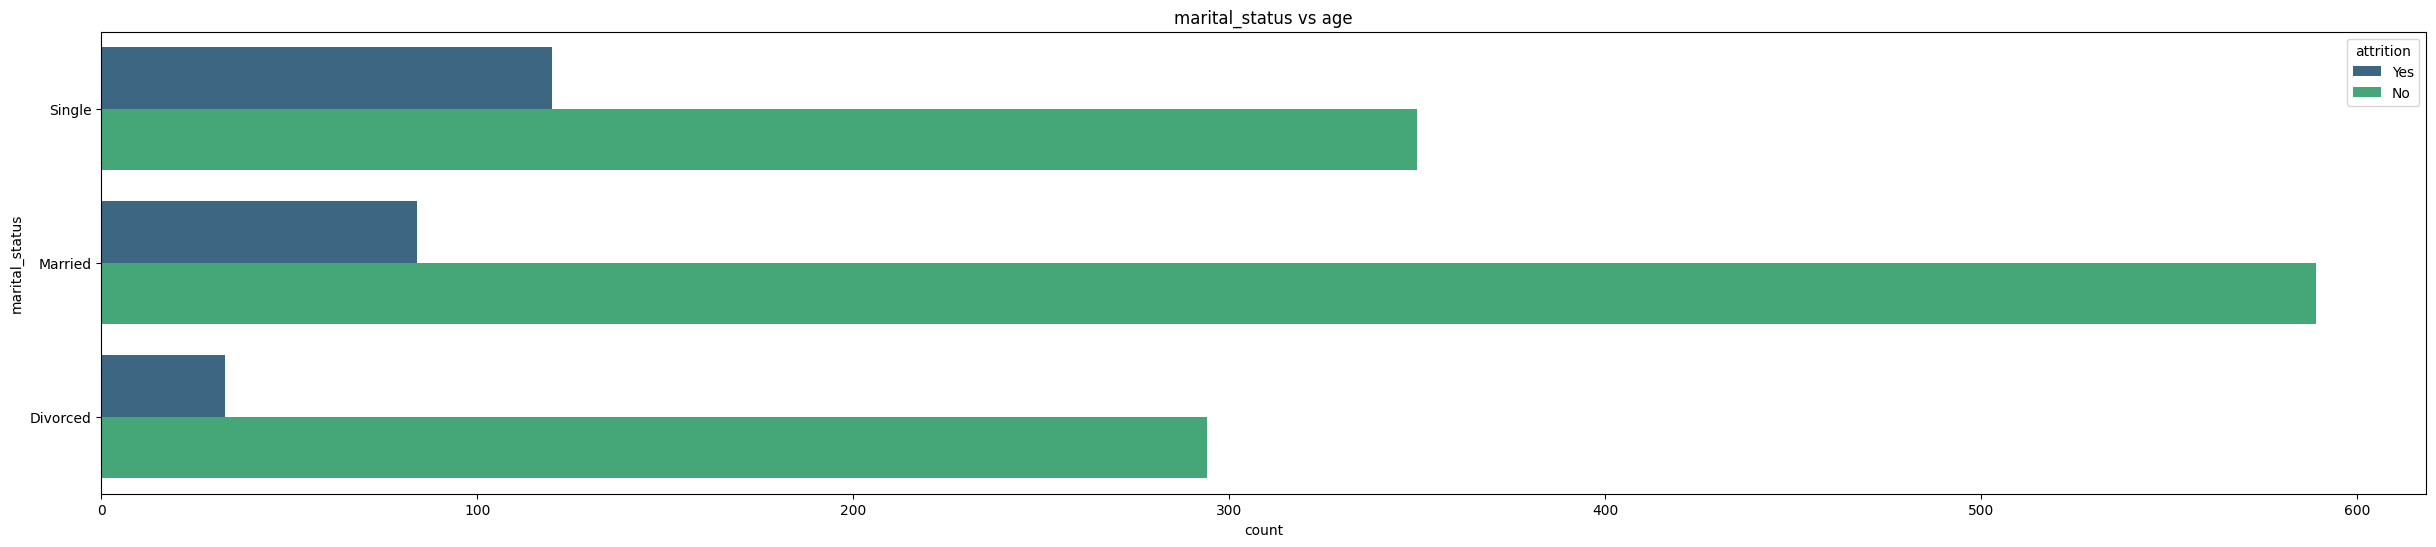

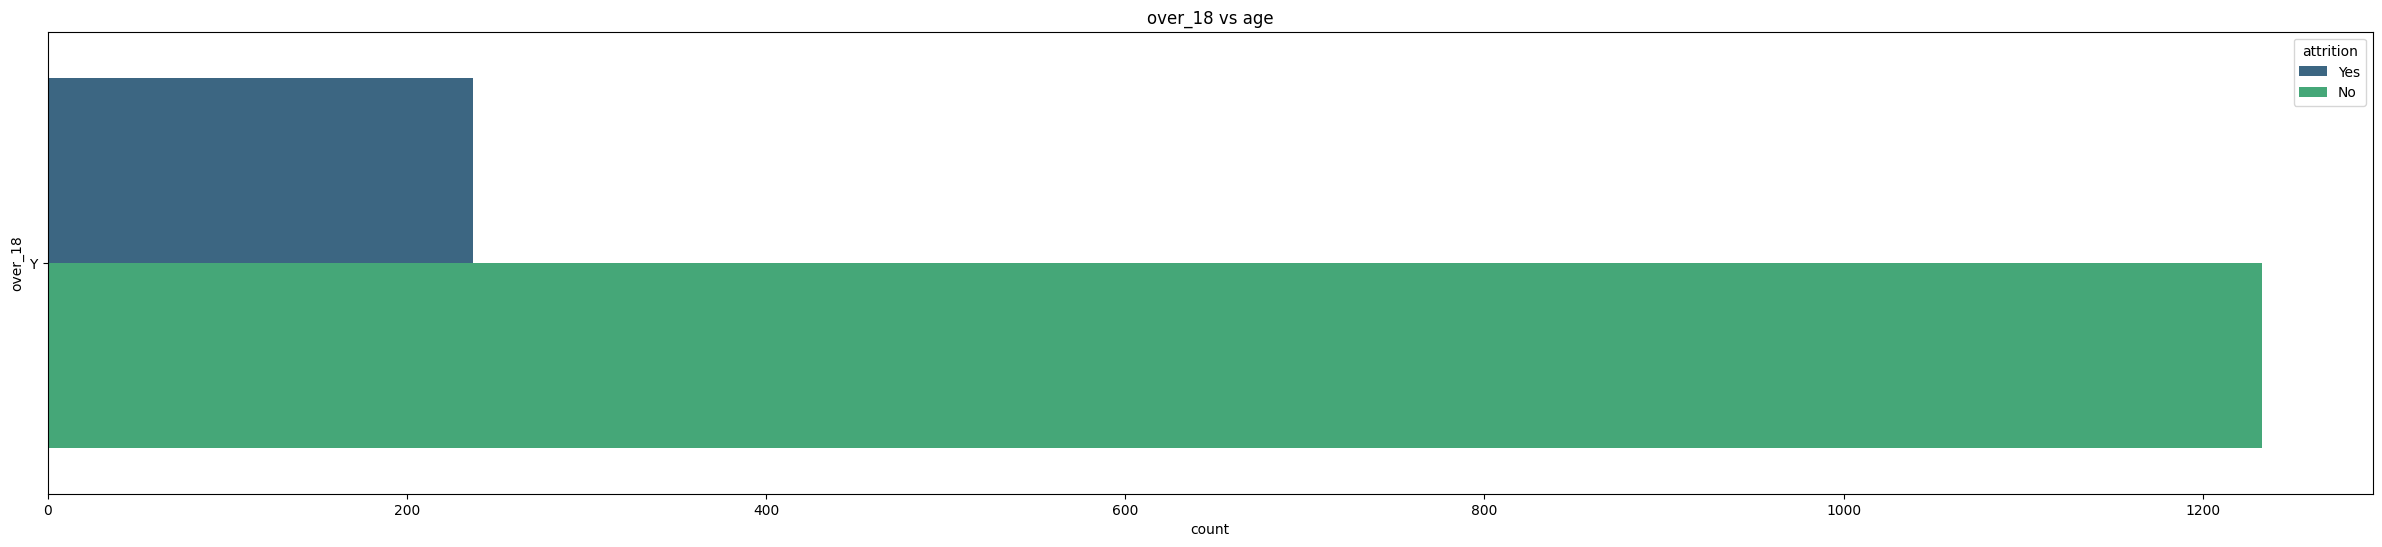

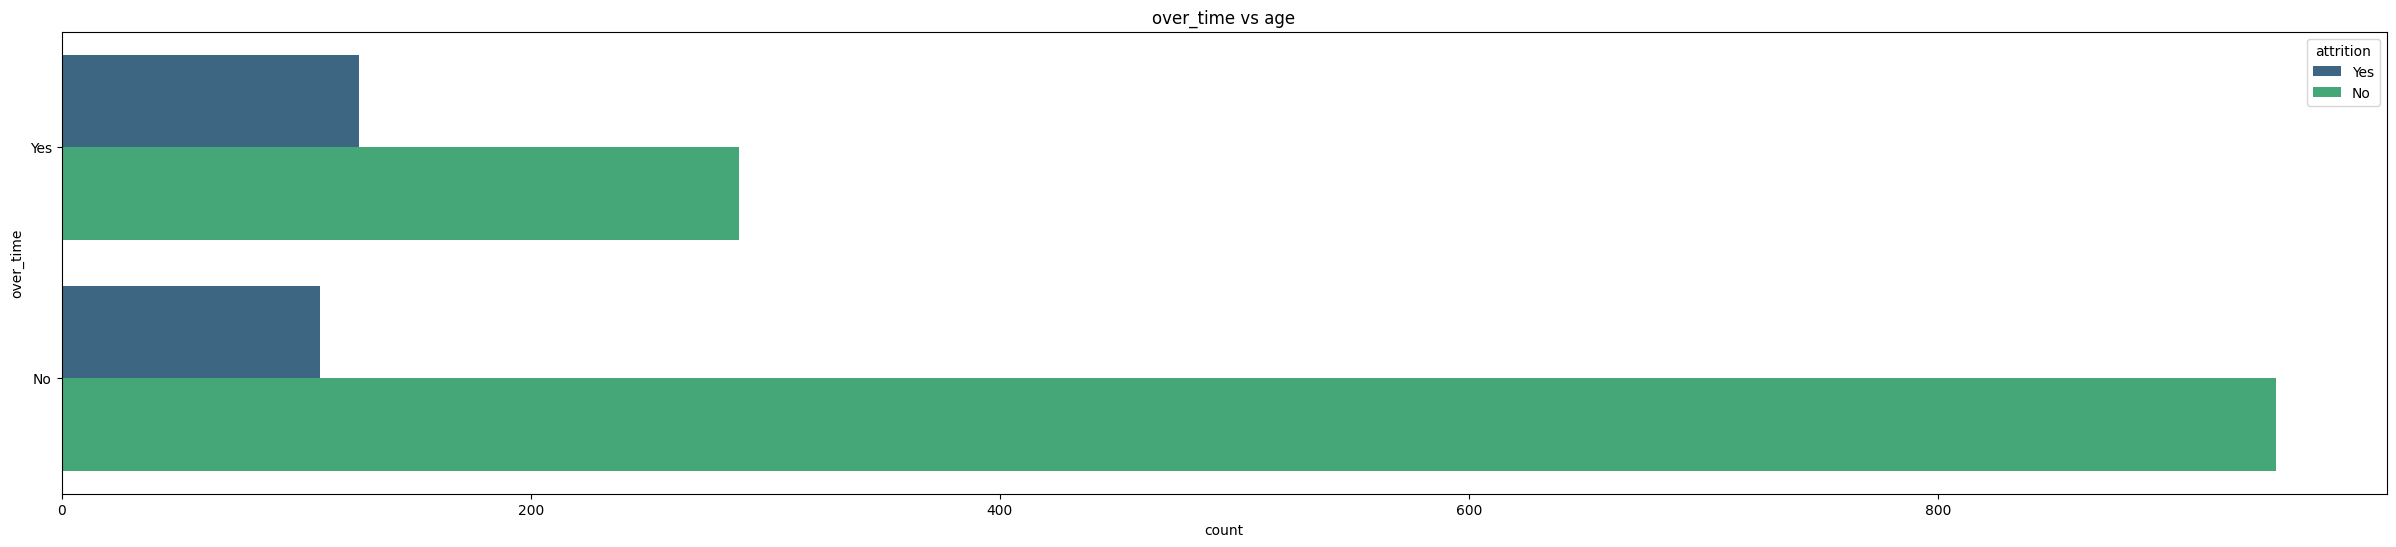

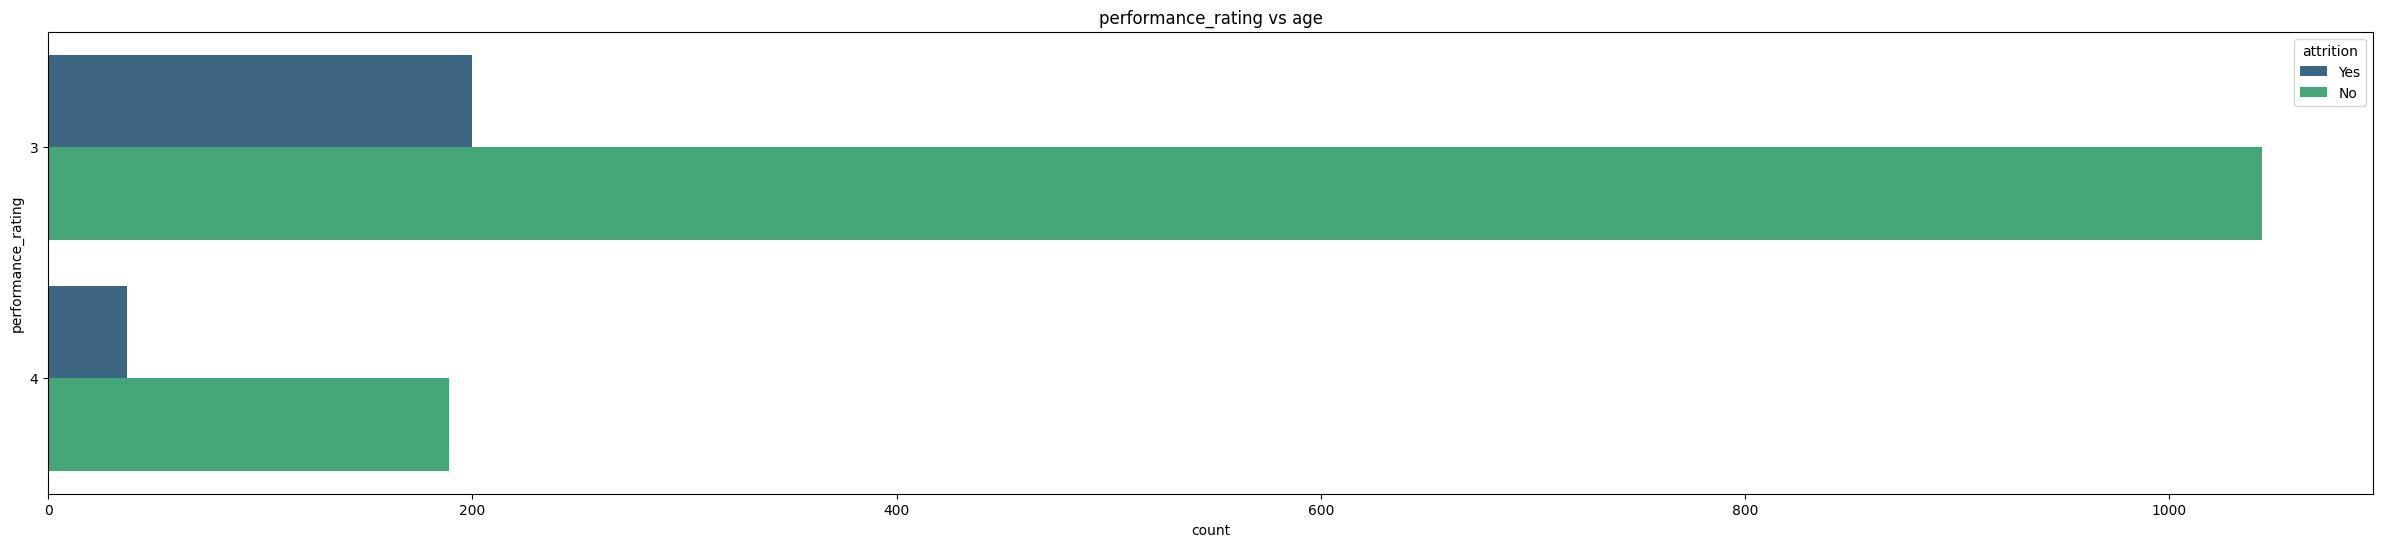

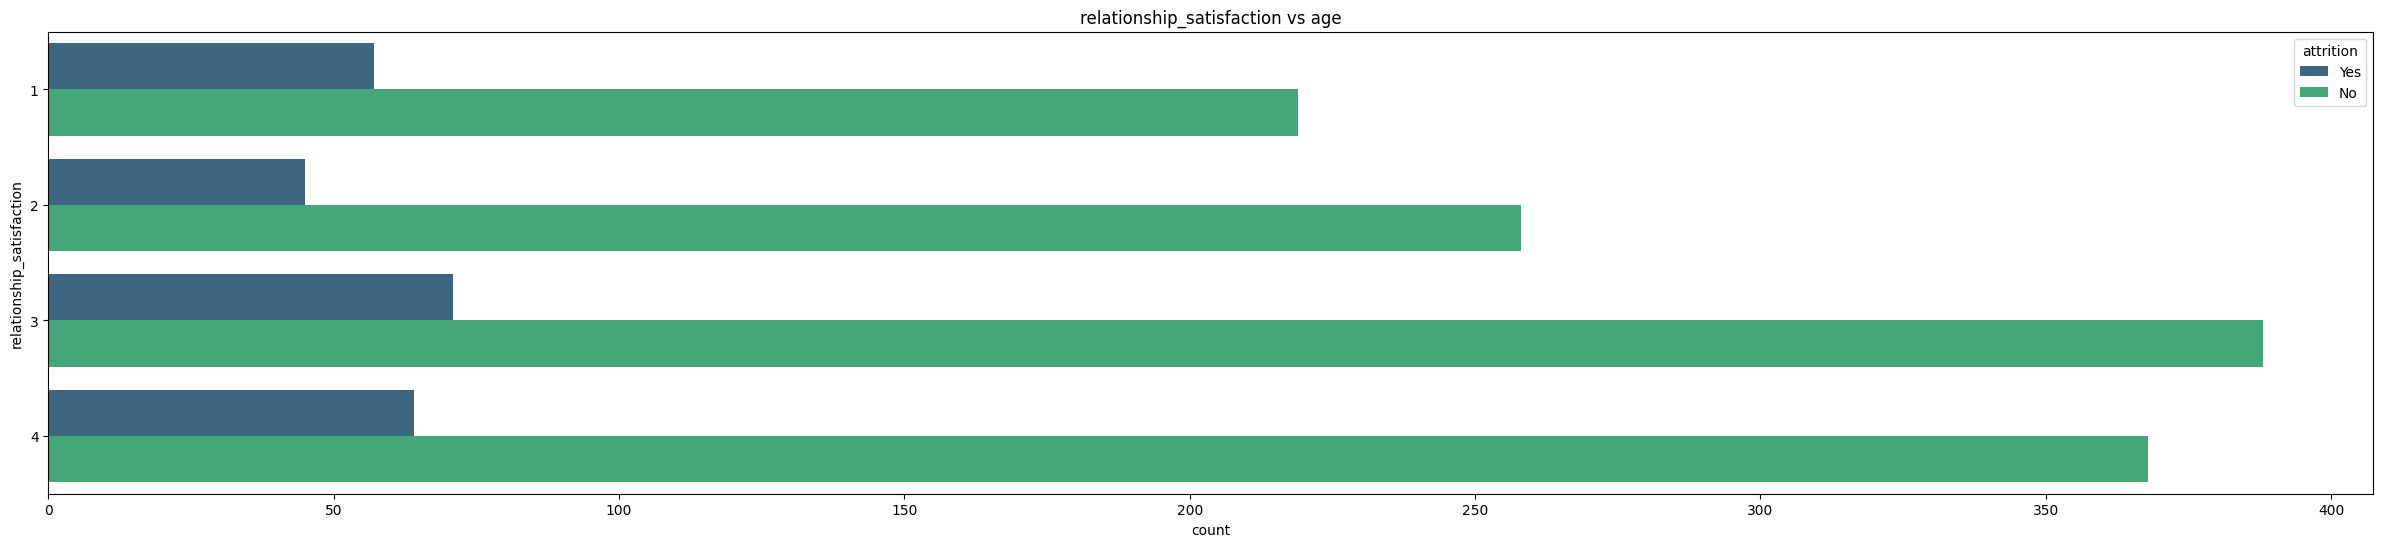

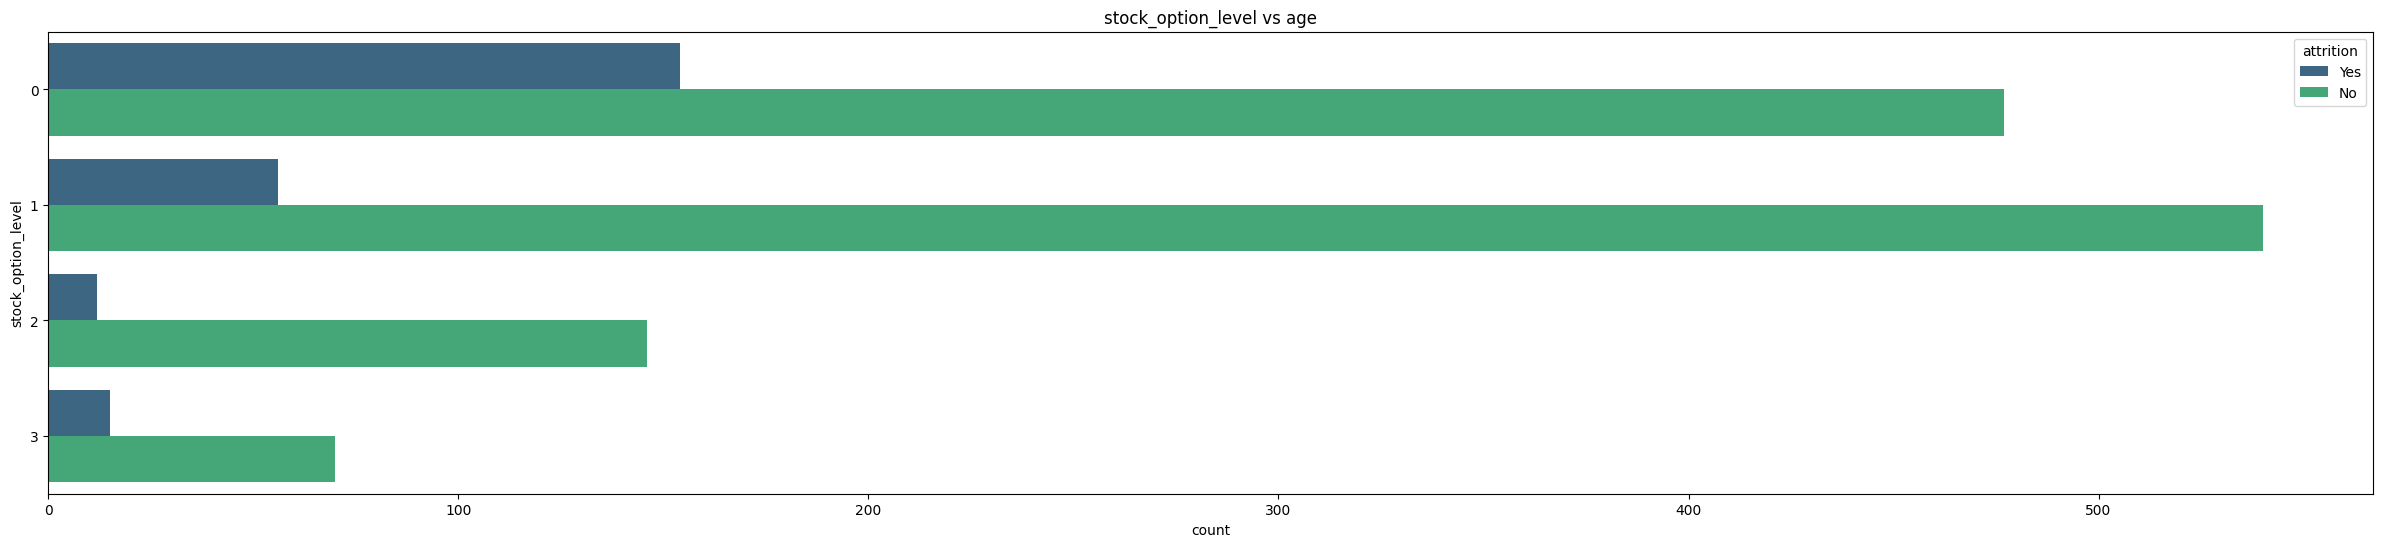

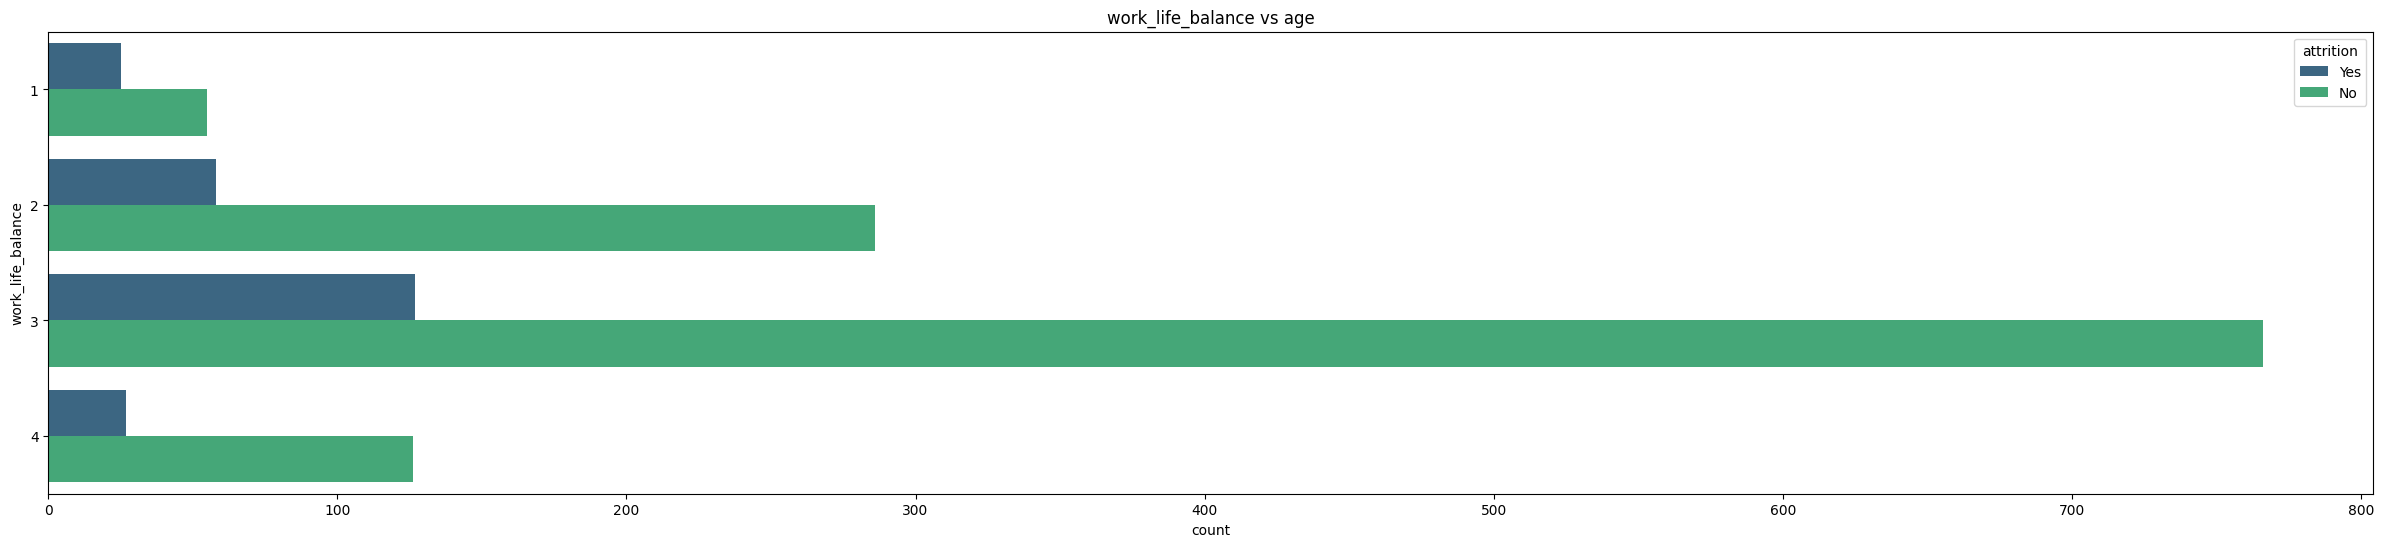

In [40]:
for c in category1:
    multivariate_analysis(data, c, 'age', 'attrition')

In [41]:
# Let's create pie charts for the categorical variables
def pie_chart(variable):
    var = data[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(10,10))
    plt.pie(varValue, labels=varValue.index, autopct='%1.1f%%')
    plt.title(variable)
    plt.show()
    print('{}: \n{}'.format(variable, varValue))

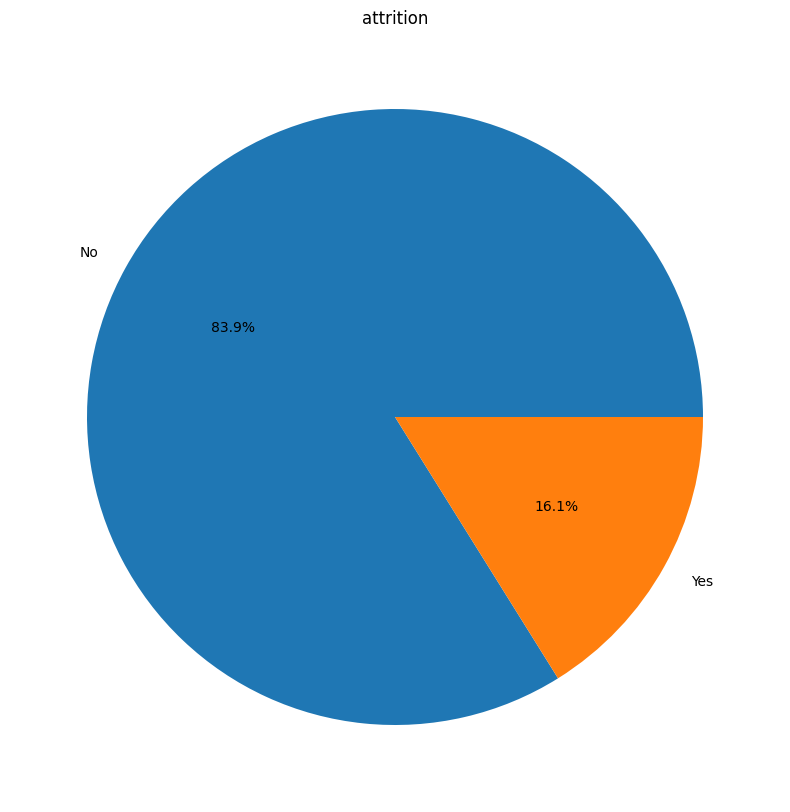

attrition: 
attrition
No     1233
Yes     237
Name: count, dtype: int64


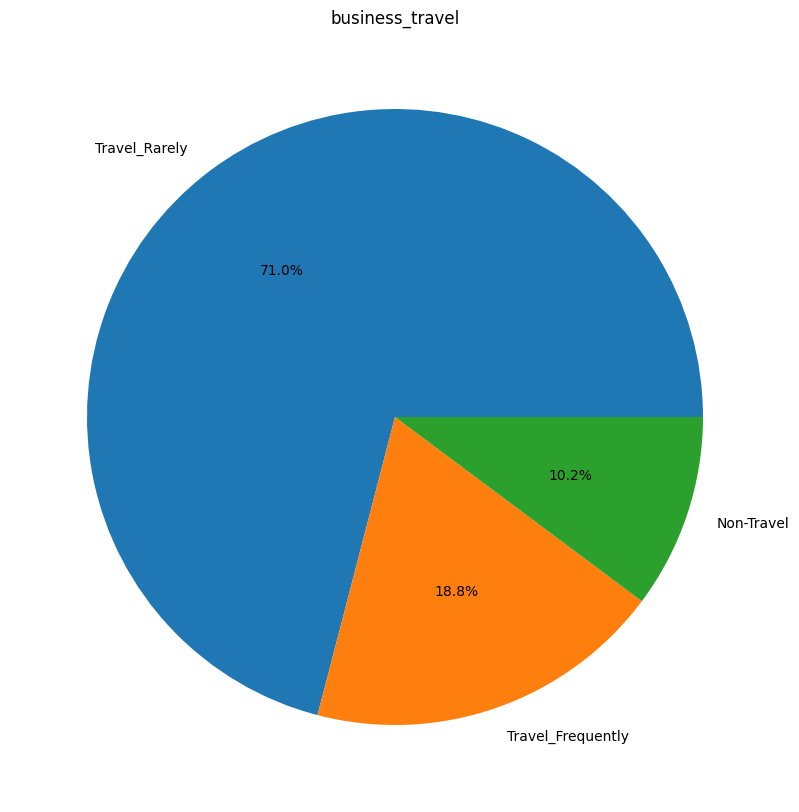

business_travel: 
business_travel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


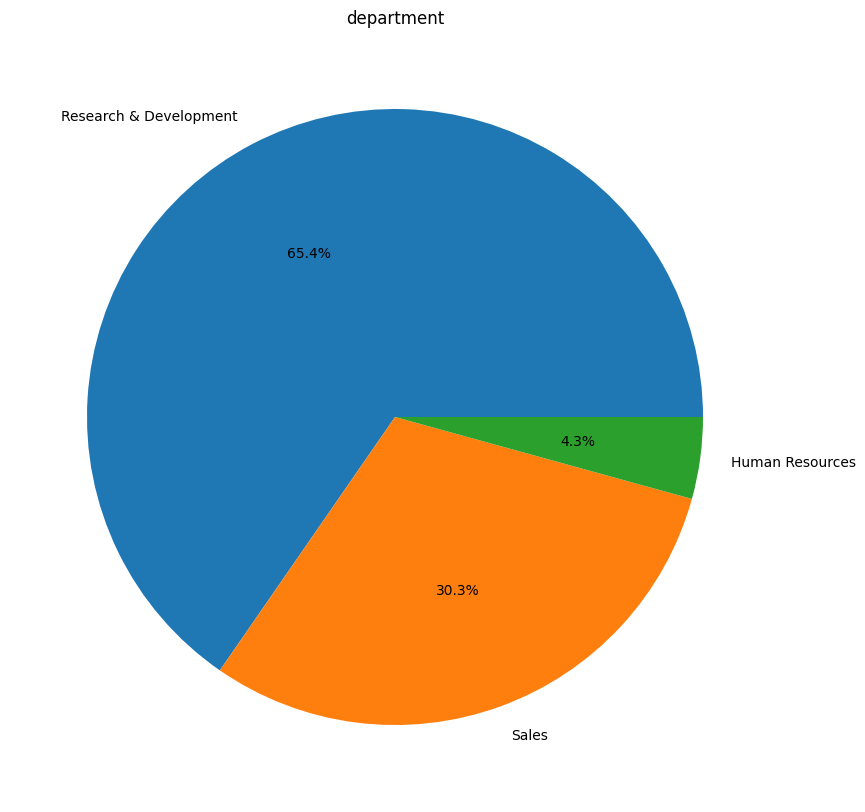

department: 
department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


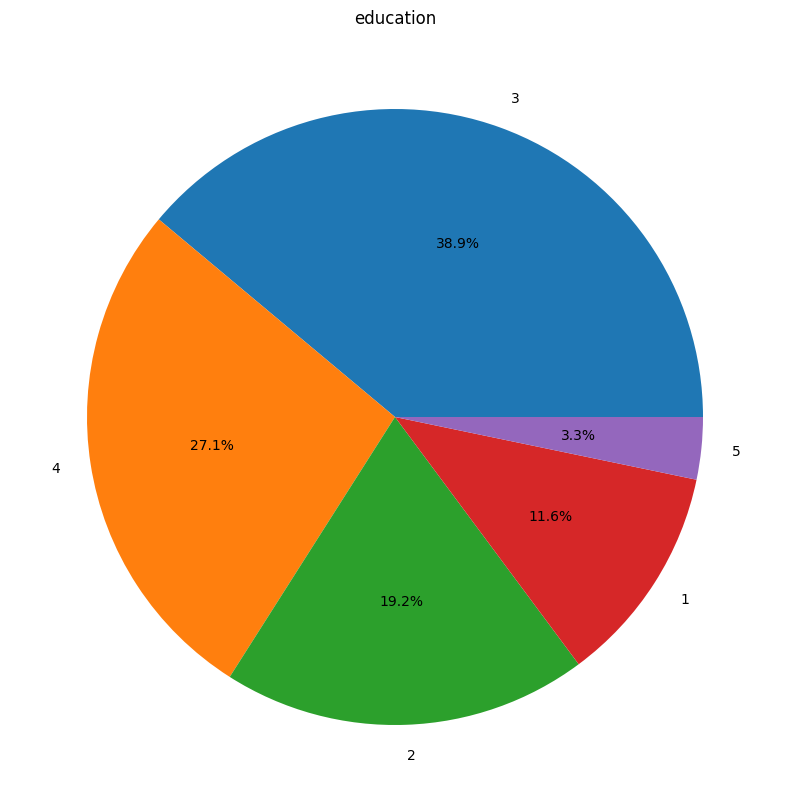

education: 
education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64


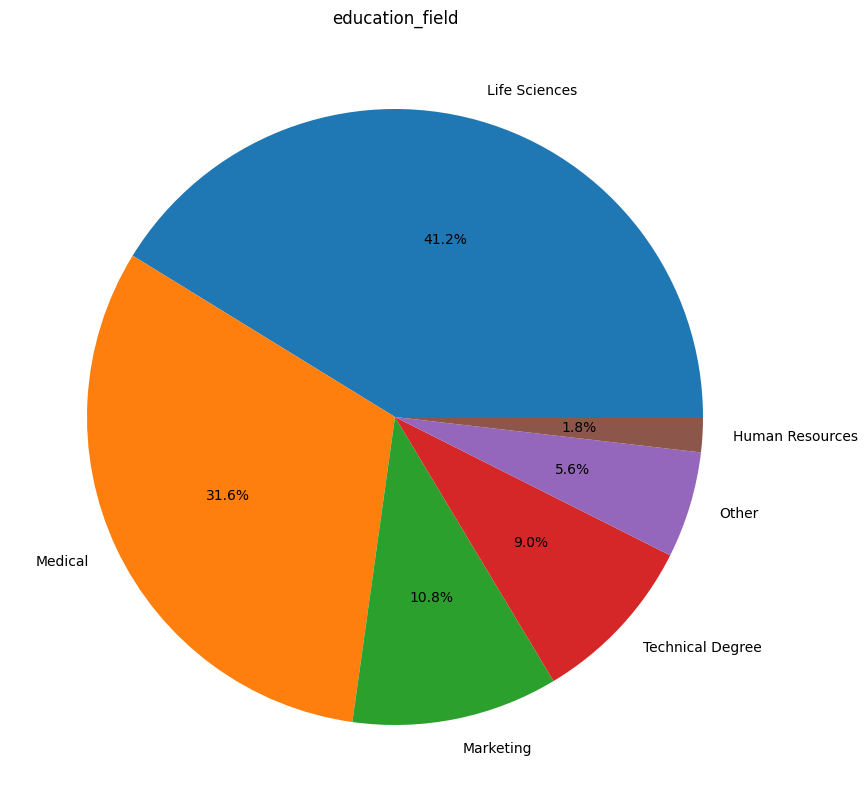

education_field: 
education_field
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


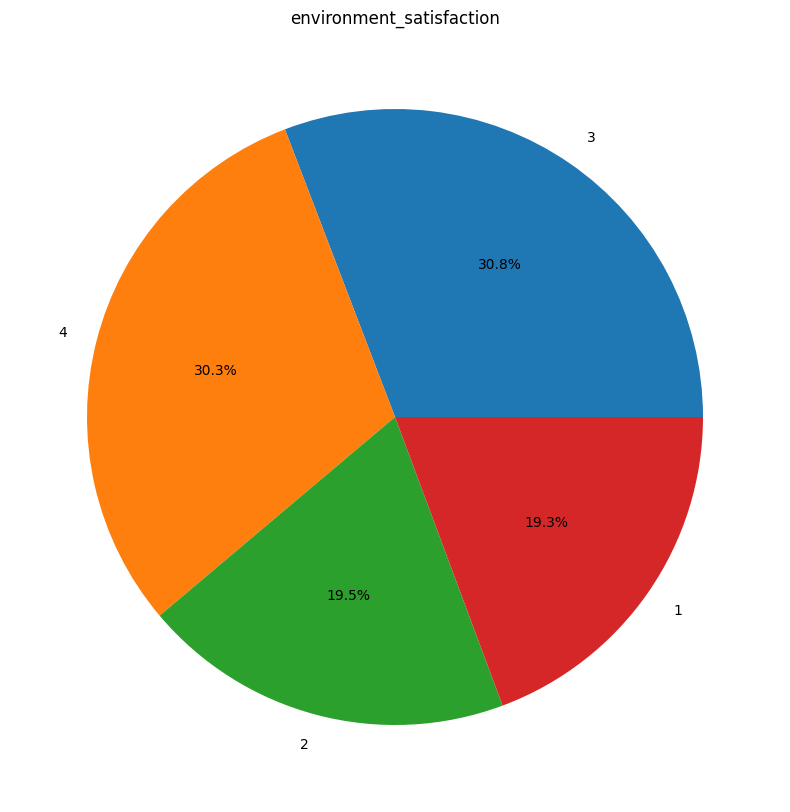

environment_satisfaction: 
environment_satisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64


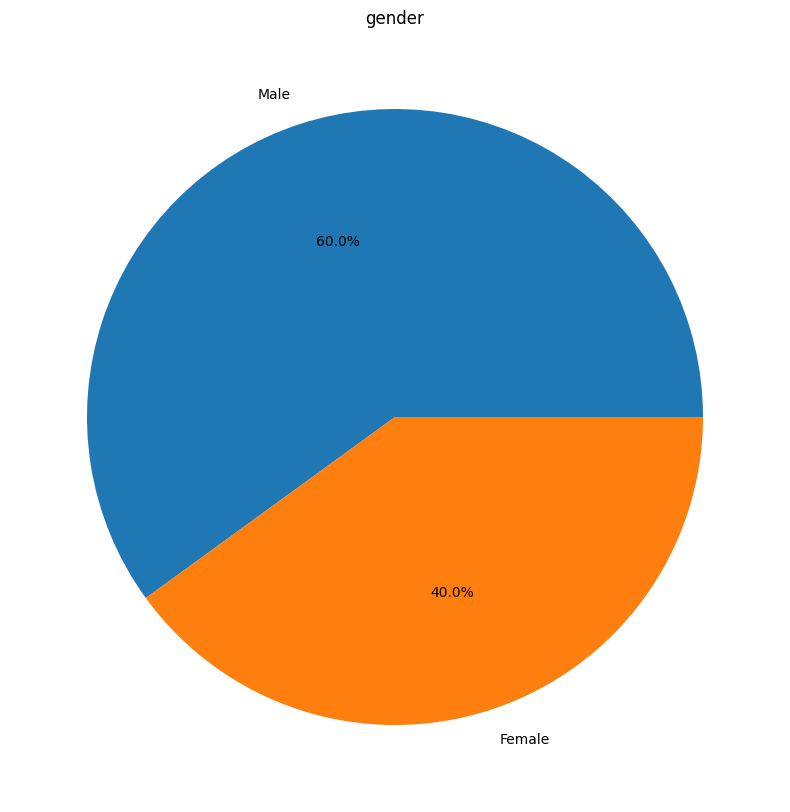

gender: 
gender
Male      882
Female    588
Name: count, dtype: int64


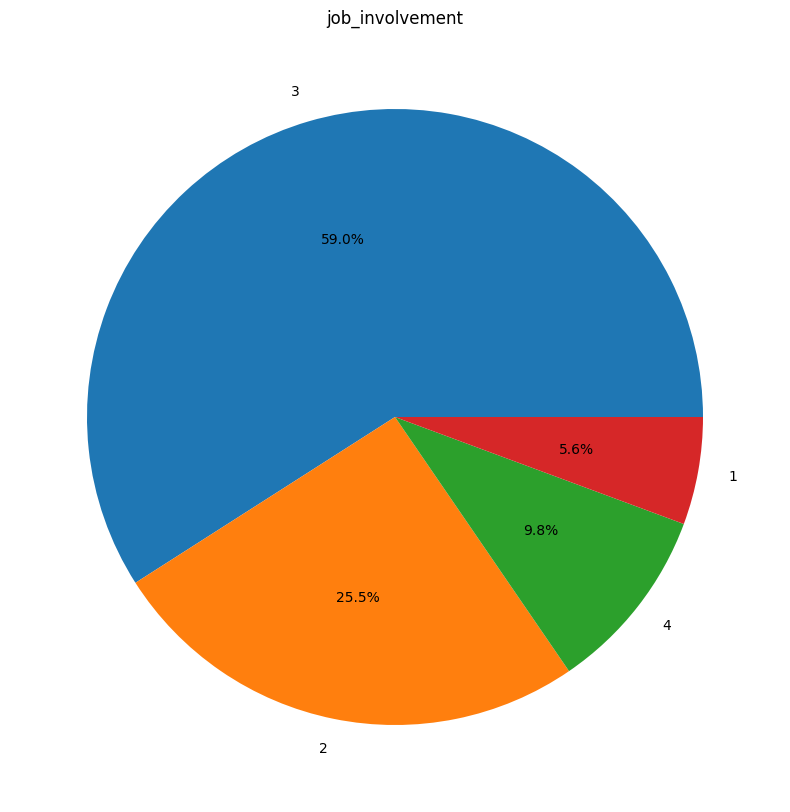

job_involvement: 
job_involvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64


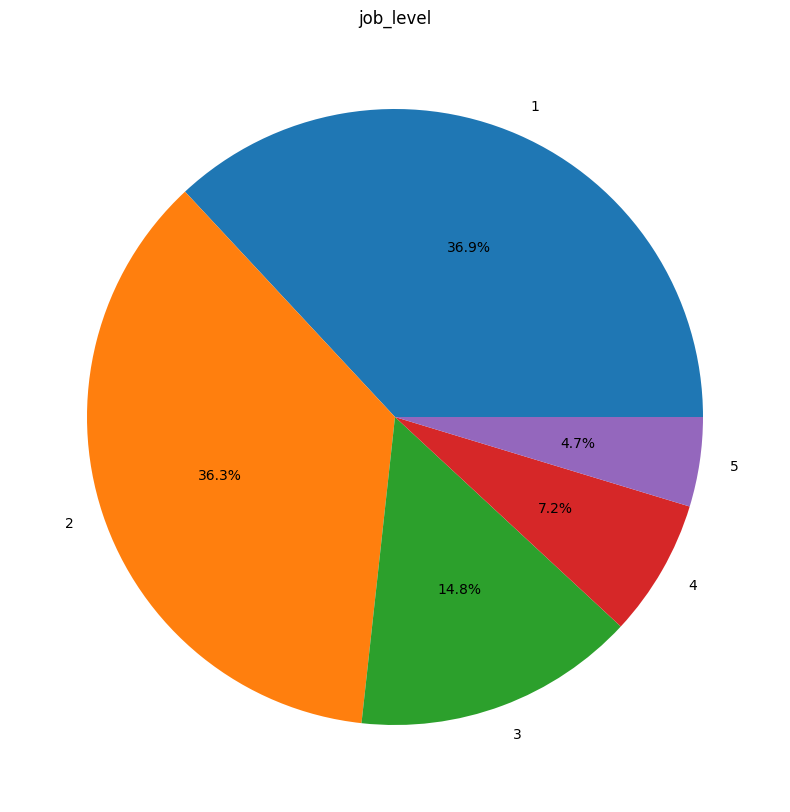

job_level: 
job_level
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64


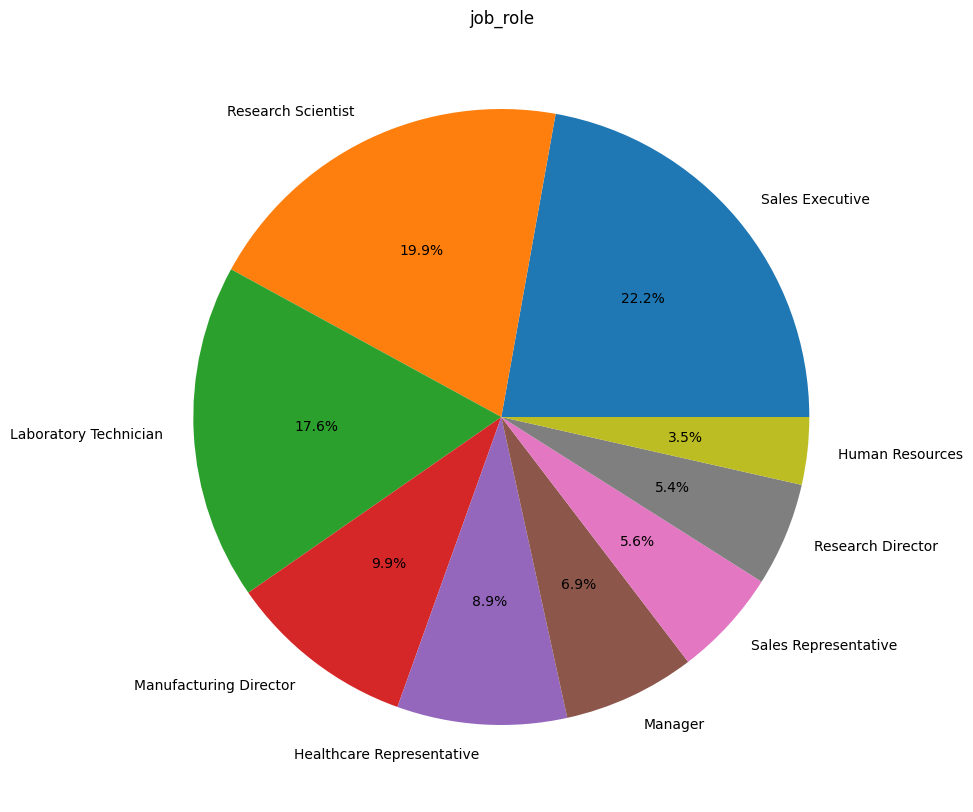

job_role: 
job_role
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


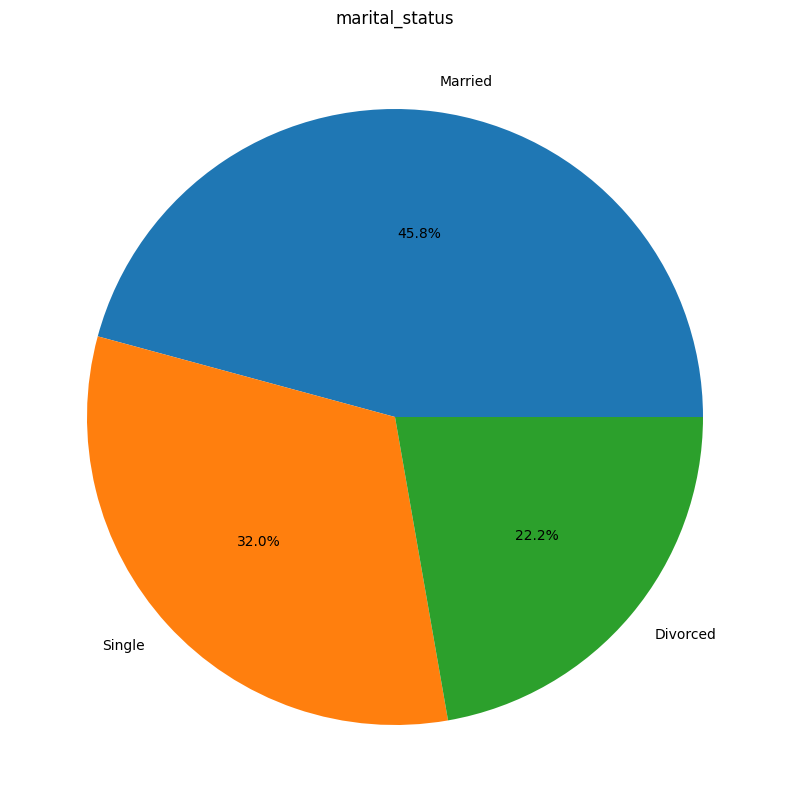

marital_status: 
marital_status
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


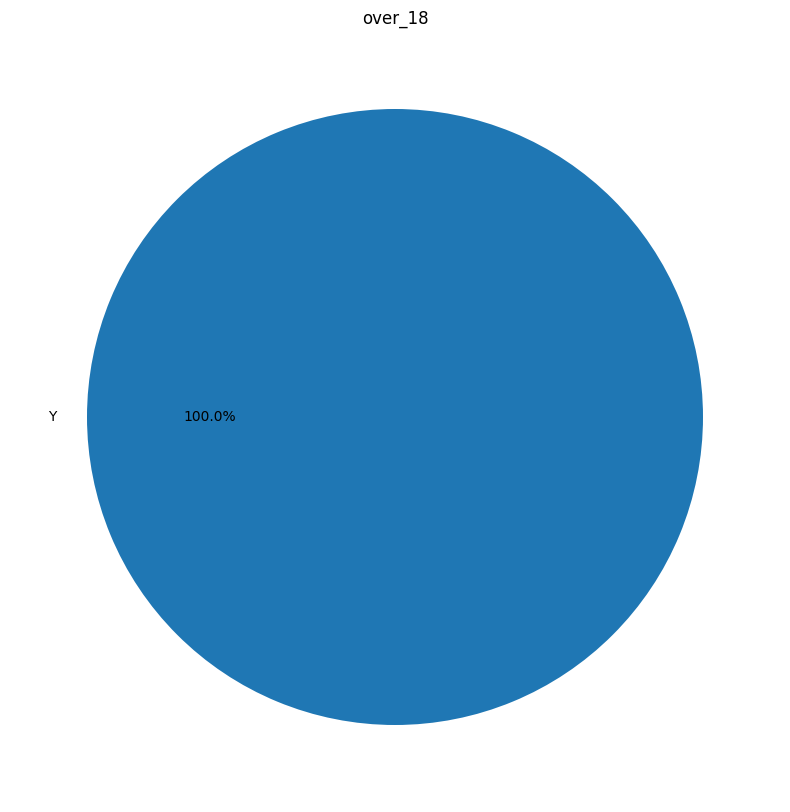

over_18: 
over_18
Y    1470
Name: count, dtype: int64


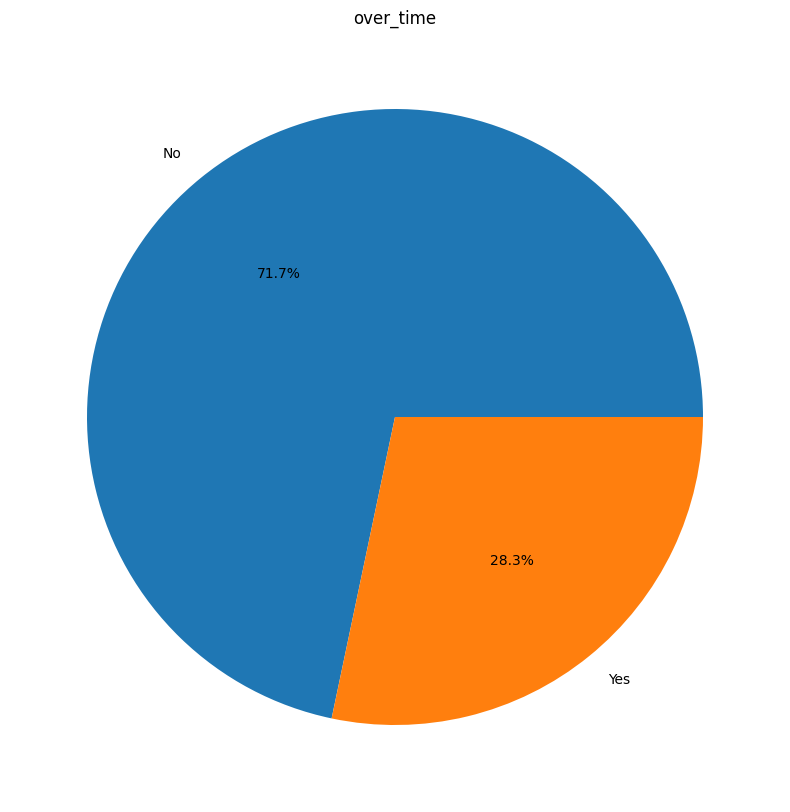

over_time: 
over_time
No     1054
Yes     416
Name: count, dtype: int64


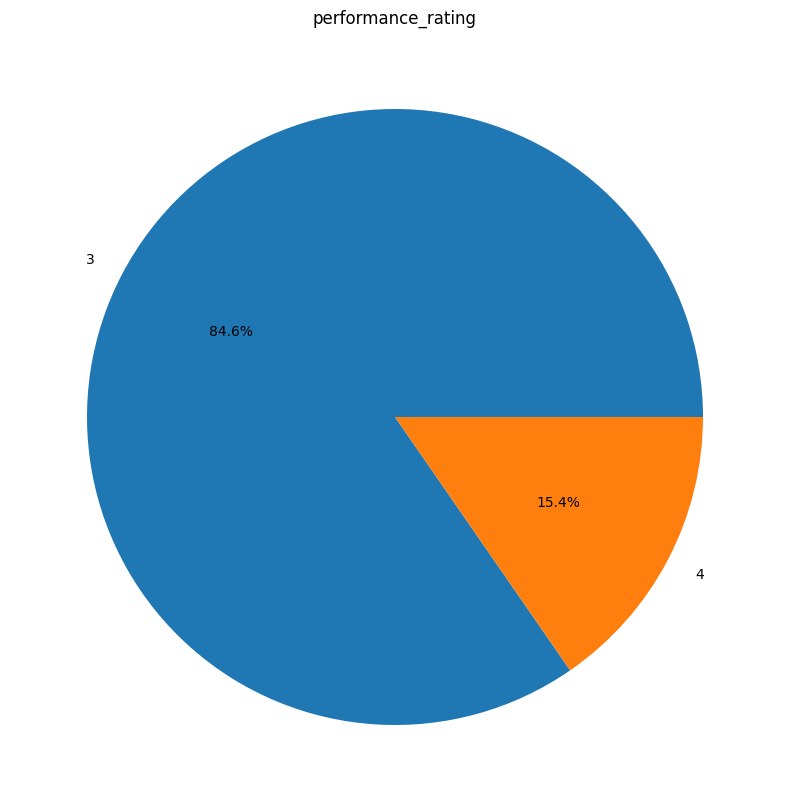

performance_rating: 
performance_rating
3    1244
4     226
Name: count, dtype: int64


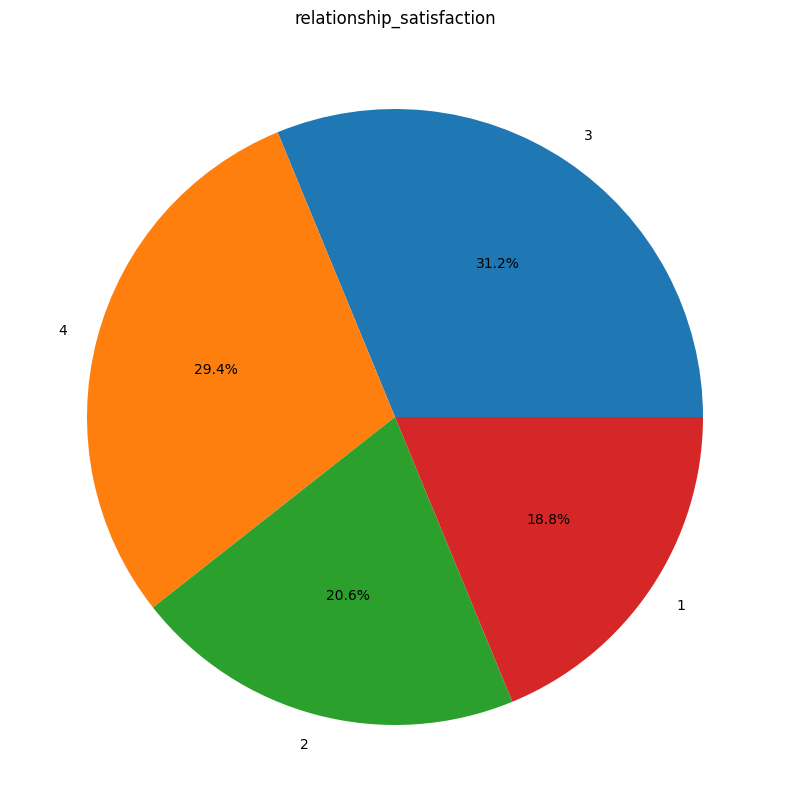

relationship_satisfaction: 
relationship_satisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64


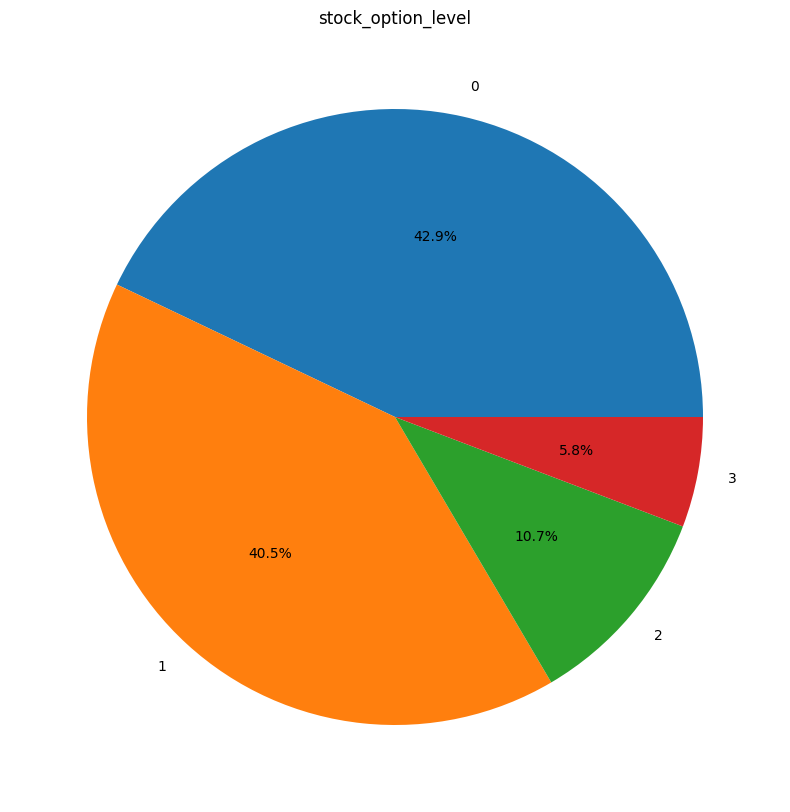

stock_option_level: 
stock_option_level
0    631
1    596
2    158
3     85
Name: count, dtype: int64


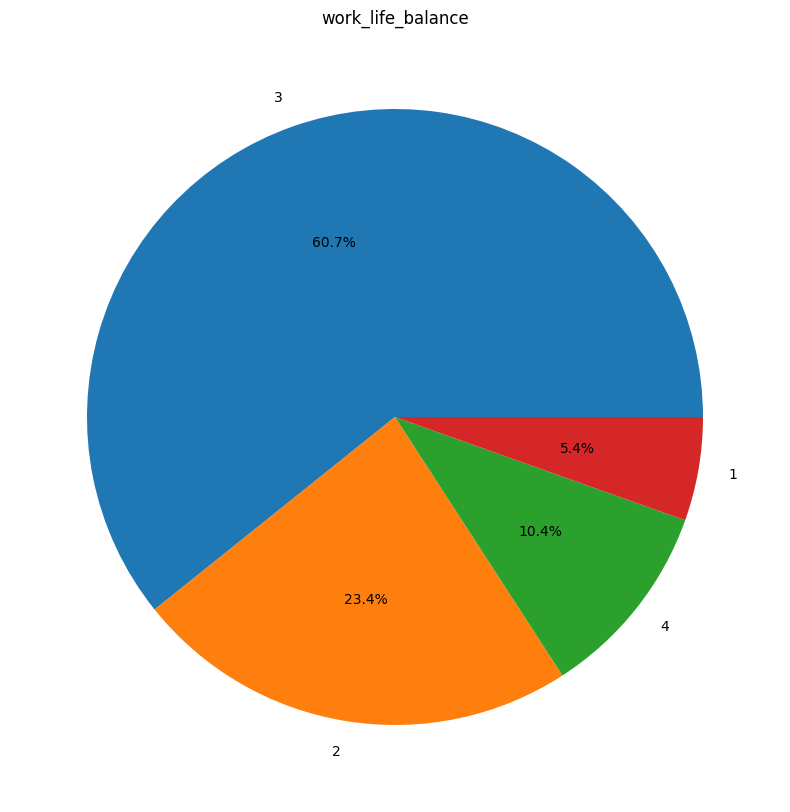

work_life_balance: 
work_life_balance
3    893
2    344
4    153
1     80
Name: count, dtype: int64


In [42]:
for c in category1:
    pie_chart(c)